In [1]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
import re
from adjustText import adjust_text
import anndata
import glob

from matplotlib import rc_context
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from pathlib import Path

import warnings


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in

In [2]:
plt.rcParams['figure.figsize']=(6, 6) # global figsize
plt.rcParams['axes.grid'] = False # turn down the grid globally
sc.settings.verbosity = 3
# sc.set_figure_params(figsize=(5, 5), dpi=200, dpi_save=300, facecolor="white")
sc.logging.print_versions()

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
adjustText                  1.3.0
anyio                       NA
appnope                     0.1.4
arrow                       1.3.0
asttokens                   NA
astunparse                  1.6.3
attr                        25.2.0
attrs                       25.2.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
cloudpickle                 3.1.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
cytoolz                     1.0.1
dask                        2025.5.1
dateutil                    2.9.0.post0
debugpy                     1.8.13
decorator                   5.2.1
defusedxml                  0.7.1
dill                        0.4.0
executing                   2.2.0
fastjsonschema     

/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


In [559]:
metadata_info = {
    'batch1': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M1'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M1'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M2'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M2'}
    },
    'batch2': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M3'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M3'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M4'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M4'}
    },
    'batch3': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M5'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M5'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M6'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M6'}
    },
    'batch4': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M7'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M7'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M8'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M8'}
    },
    'batch5': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M9'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M9'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M10'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M10'}
    },
    'batch6': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M11'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M11'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M12'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M12'}
    },
    'batch7': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M13'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M13'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M14'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M14'}
    },
    'batch8': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M15'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M15'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M16'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M16'}
    },
    'batch9': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M17'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M17'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M18'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M18'}
    },
    'batch10': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M19'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M19'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M20'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M20'}
    },
    'batch11': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M21'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M21'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M22'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M22'}
    },
    'batch12': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M23'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M23'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M24'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M24'}
    },
    'batch13': {
        'Hashtag_1': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M25'},
        'Hashtag_2': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M25'},
        'Hashtag_3': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M26'},
        'Hashtag_4': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M26'},
        'default': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'Unknown', 'gender': 'Female', 'sample': 'M25_26'}
    },
    'batch14': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M27'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M27'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'HP', 'gender': 'Male', 'sample': 'M28'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'LPS', 'brain_region': 'RSC', 'gender': 'Male', 'sample': 'M28'},
        'default': {'genotype': 'WT', 'treatment': 'Vehicle', 'brain_region': 'Unknown', 'gender': 'Female', 'sample': 'M27_28'}
    },
    'batch15': {
        'Hashtag_1': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M29'},
        'Hashtag_2': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M29'},
        'Hashtag_3': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'HP', 'gender': 'Female', 'sample': 'M30'},
        'Hashtag_4': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'RSC', 'gender': 'Female', 'sample': 'M30'},
        'default': {'genotype': '5XFAD', 'treatment': 'Vehicle', 'brain_region': 'Unknown', 'gender': 'Female', 'sample': 'M29_30'}
    }
}

# batch1

In [14]:
# batch1
batch1_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch1_result/filtered_feature_bc_matrix")
batch_name = "batch1"

adata_batch1 = sc.read_10x_mtx(
    batch1_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch1.obs['batches'] = 'batch1'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [15]:
adata_batch1

AnnData object with n_obs × n_vars = 5777 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [16]:
adata_batch1.var['feature_types'].tail()

ENSMUSG00000095742     Gene Expression
Hashtag_1             Antibody Capture
Hashtag_2             Antibody Capture
Hashtag_3             Antibody Capture
Hashtag_4             Antibody Capture
Name: feature_types, dtype: object

In [17]:
# add in Hashtag labels into .obs
feature_path = os.path.join(batch1_path, 'features.tsv.gz')
if not os.path.exists(feature_path):
    raise FileNotFoundError(f"Features file not found for {batch_name}")

features = pd.read_csv(feature_path, sep='\t', header=None)
features.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features['feature_type'].str.contains('Antibody Capture', case=False) | \
           features['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch1.var_names]

print(f"Hashtags found in {batch_name}: {HTO_tags}")

if HTO_tags:
    adata_batch1.obs[HTO_tags] = pd.DataFrame(adata_batch1[:, HTO_tags].X.toarray(), index=adata_batch1.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch1, cell_hashing_columns=HTO_tags)
    adata_batch1 = adata_batch1[:, ~adata_batch1.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch1.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch1.obs["Classification"] = "Unknown"


Hashtags found in batch1: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [18]:
adata_batch1

AnnData object with n_obs × n_vars = 5777 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [19]:
adata_batch1.obs['Classification'].value_counts()

Classification
Hashtag_2    2277
Hashtag_1    1928
Doublet       659
Hashtag_4     494
Hashtag_3     419
Name: count, dtype: int64

In [20]:
print(adata_batch1.obs_names.is_unique) 
print(adata_batch1.var_names.is_unique) 

True
True


In [21]:
# count hashtage percentage
classification_a1 = adata_batch1.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a1.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 39.41%
Hashtag_1: 33.37%
Doublet: 11.41%
Hashtag_4: 8.55%
Hashtag_3: 7.25%


In [22]:
# delete doublets
adata_batch1 = adata_batch1[adata_batch1.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch1.shape}")

Cells retained: (5118, 33989)


In [23]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch1.obs[key] = adata_batch1.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [24]:
adata_batch1

AnnData object with n_obs × n_vars = 5118 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [25]:
print(adata_batch1.obs['genotype'].value_counts())
print(adata_batch1.obs['treatment'].value_counts())
print(adata_batch1.obs['gender'].value_counts())
print(adata_batch1.obs['brain_region'].value_counts())
print(adata_batch1.obs['sample'].value_counts())

genotype
WT    5118
Name: count, dtype: int64
treatment
LPS    5118
Name: count, dtype: int64
gender
Male    5118
Name: count, dtype: int64
brain_region
HP     2771
RSC    2347
Name: count, dtype: int64
sample
M1    4205
M2     913
Name: count, dtype: int64


In [26]:
# create 'geno_treat' column : like WT_LPS
adata_batch1.obs["geno_treat"] = adata_batch1.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch1.obs["geno_treat_sex"] = adata_batch1.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [27]:
adata_batch1.var['ribo'] = adata_batch1.var_names.str.startswith('Rps') | adata_batch1.var_names.str.startswith('Rpl')
adata_batch1.var['mt'] = adata_batch1.var_names.str.startswith('mt-')

In [28]:
sc.pp.calculate_qc_metrics(adata_batch1, qc_vars=['mt', 'ribo'], inplace=True)

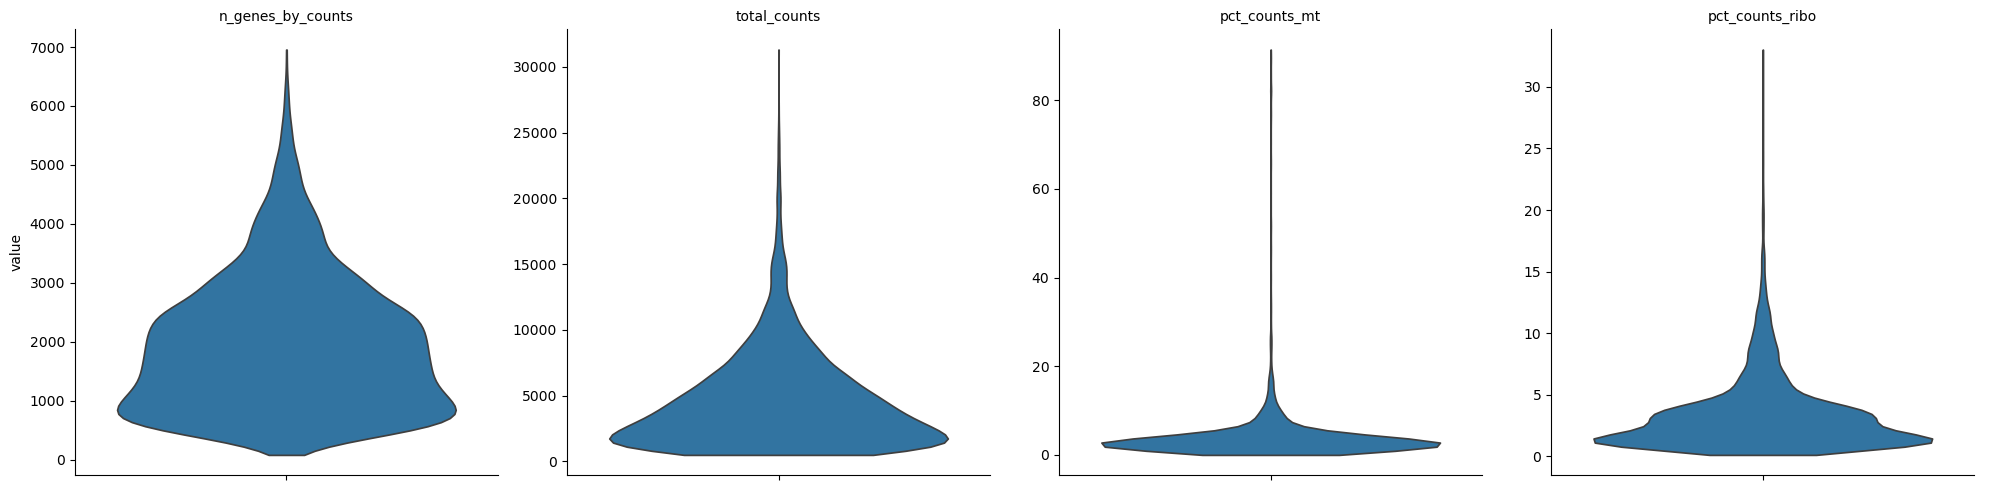

In [29]:
sc.pl.violin(
    adata_batch1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

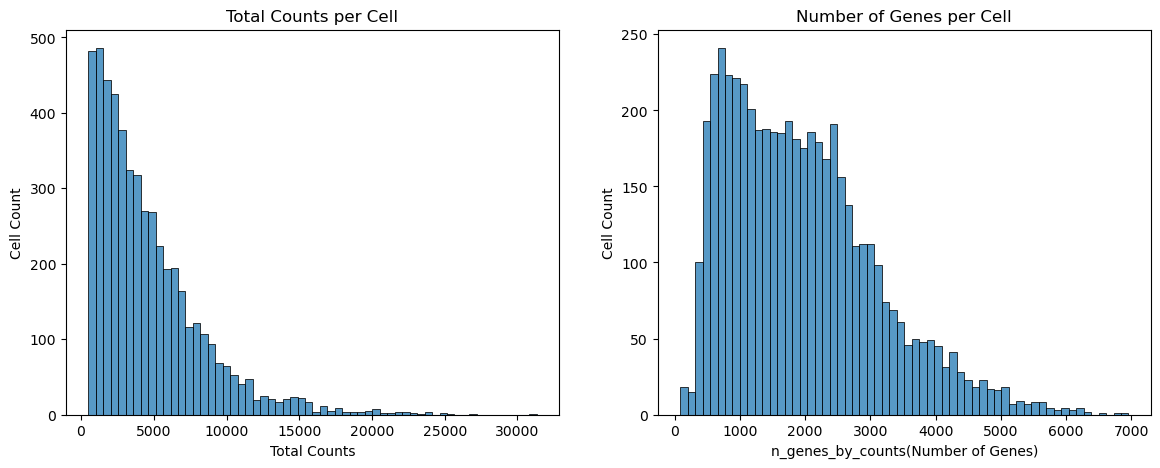

In [30]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch1.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch1.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

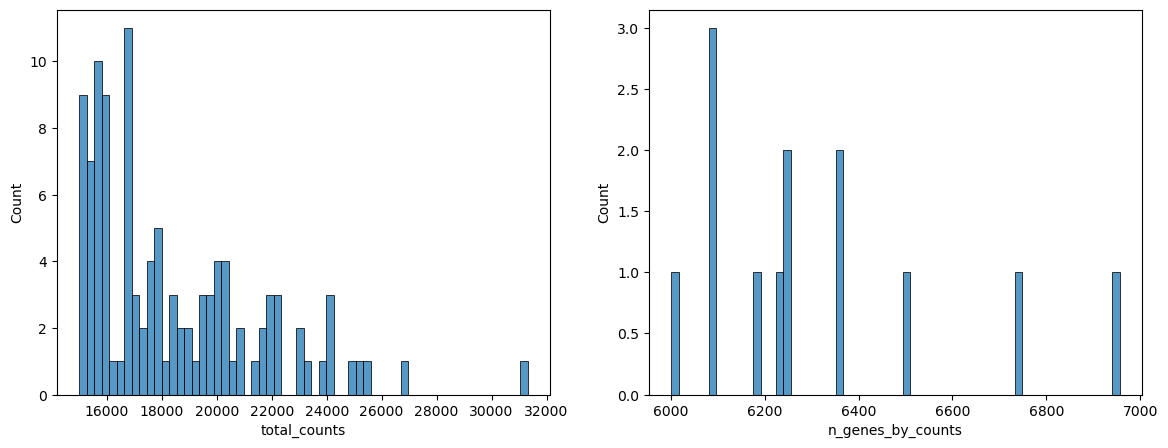

In [31]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch1.obs['total_counts'][adata_batch1.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch1.obs['n_genes_by_counts'][adata_batch1.obs['n_genes_by_counts'] > 6000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

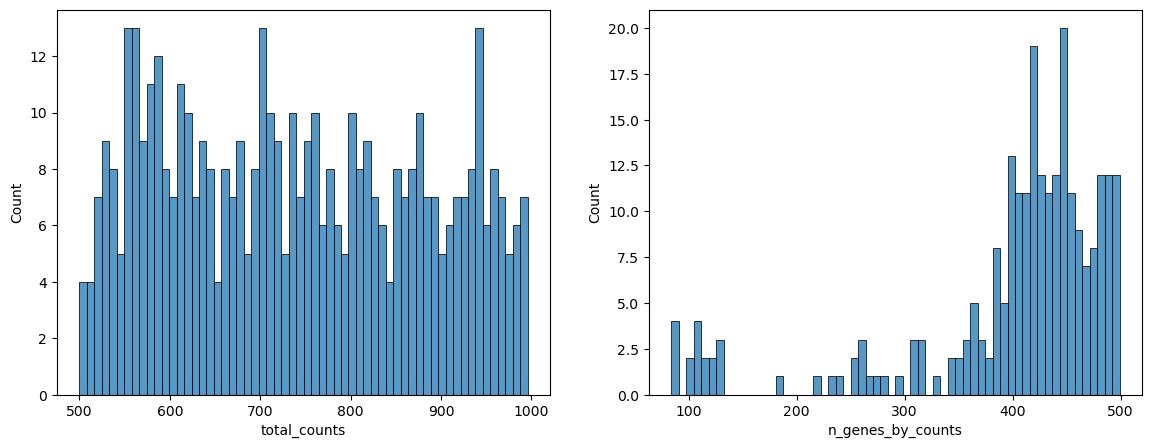

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch1.obs['total_counts'][adata_batch1.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch1.obs['n_genes_by_counts'][adata_batch1.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

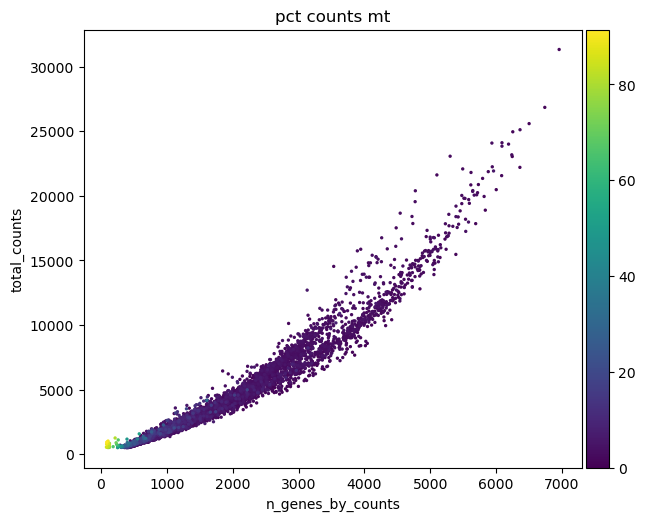

In [33]:
sc.pl.scatter(adata_batch1, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [34]:
print('Total number of cells: {:d}'.format(adata_batch1.n_obs))
# print('')
sc.pp.filter_cells(adata_batch1, max_counts=20000)
print('Number of cells after max count filter: {:d}'.format(adata_batch1.n_obs))
print('')
sc.pp.filter_cells(adata_batch1, max_genes=6000)
sc.pp.filter_cells(adata_batch1, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch1.n_obs))

adata_batch1 = adata_batch1[adata_batch1.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch1.n_obs))

Total number of cells: 5118
filtered out 31 cells that have more than 20000 counts
Number of cells after max count filter: 5087

filtered out 77 cells that have less than 400 genes expressed
Number of cells after gene filter: 5010
Number of cells after MT filter: 4799


In [35]:
print('Total number of genes: {:d}'.format(adata_batch1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch1, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch1.n_vars))

Total number of genes: 33989
filtered out 15024 genes that are detected in less than 5 cells
Number of genes after cell filter: 18965


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [36]:
sc.pp.calculate_qc_metrics(adata_batch1, qc_vars=['mt', 'ribo'], inplace=True)

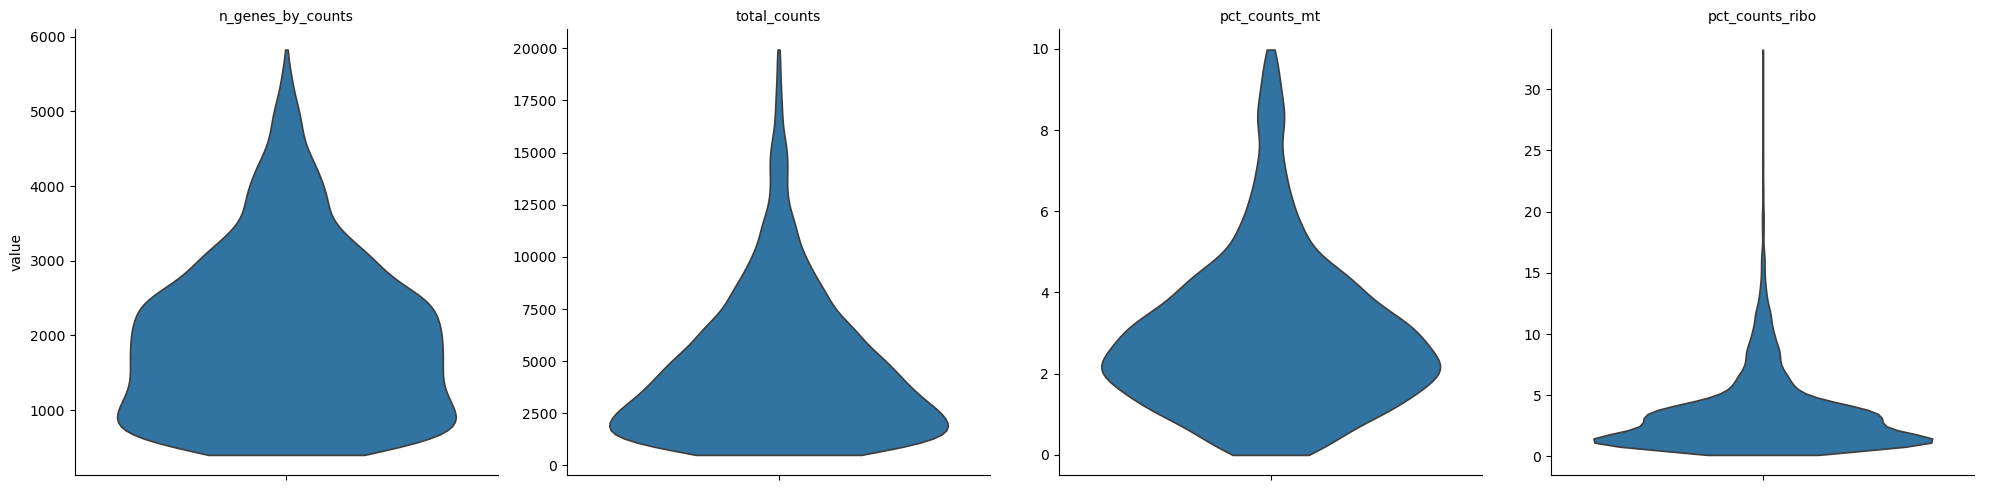

In [37]:
sc.pl.violin(
    adata_batch1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [38]:
adata_batch1

AnnData object with n_obs × n_vars = 4799 × 18965
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch2

In [122]:
# batch1
batch2_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch2_result/filtered_feature_bc_matrix")
batch2_name = "batch2"

adata_batch2 = sc.read_10x_mtx(
    batch2_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch2.obs['batches'] = 'batch2'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [123]:
adata_batch2

AnnData object with n_obs × n_vars = 6714 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [124]:
adata_batch2.var['feature_types'].tail()

ENSMUSG00000095742     Gene Expression
Hashtag_1             Antibody Capture
Hashtag_2             Antibody Capture
Hashtag_3             Antibody Capture
Hashtag_4             Antibody Capture
Name: feature_types, dtype: object

In [125]:
# add in Hashtag labels into .obs
feature2_path = os.path.join(batch2_path, 'features.tsv.gz')
if not os.path.exists(feature2_path):
    raise FileNotFoundError(f"Features file not found for {batch2_name}")

features2 = pd.read_csv(feature2_path, sep='\t', header=None)
features2.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask2 = features2['feature_type'].str.contains('Antibody Capture', case=False) | \
           features2['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags2 = features2.loc[hto_mask2, 'gene_name'].tolist()
HTO_tags2 = [gene for gene in HTO_tags2 if gene in adata_batch2.var_names]

print(f"Hashtags found in {batch2_name}: {HTO_tags2}")

if HTO_tags2:
    adata_batch2.obs[HTO_tags2] = pd.DataFrame(adata_batch2[:, HTO_tags2].X.toarray(), index=adata_batch2.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch2, cell_hashing_columns=HTO_tags2)
    adata_batch2 = adata_batch2[:, ~adata_batch2.var_names.isin(HTO_tags2)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch2.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch2.obs["Classification"] = "Unknown"


Hashtags found in batch2: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [126]:
adata_batch2

AnnData object with n_obs × n_vars = 6714 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [127]:
adata_batch2.obs['Classification'].value_counts()

Classification
Hashtag_4    2528
Hashtag_3    1591
Hashtag_2    1442
Hashtag_1     903
Doublet       250
Name: count, dtype: int64

In [128]:
print(adata_batch2.obs_names.is_unique) 
print(adata_batch2.var_names.is_unique) 

True
True


In [129]:
# count hashtage percentage
classification_a2 = adata_batch2.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a2.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_4: 37.65%
Hashtag_3: 23.70%
Hashtag_2: 21.48%
Hashtag_1: 13.45%
Doublet: 3.72%


In [130]:
# delete doublets
adata_batch2 = adata_batch2[adata_batch2.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch2.shape}")

Cells retained: (6464, 33989)


In [131]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch2.obs[key] = adata_batch2.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [132]:
adata_batch2

AnnData object with n_obs × n_vars = 6464 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [133]:
print(adata_batch2.obs['genotype'].value_counts())
print(adata_batch2.obs['treatment'].value_counts())
print(adata_batch2.obs['gender'].value_counts())
print(adata_batch2.obs['brain_region'].value_counts())
print(adata_batch2.obs['sample'].value_counts())

genotype
5XFAD    6464
Name: count, dtype: int64
treatment
LPS    6464
Name: count, dtype: int64
gender
Male      4119
Female    2345
Name: count, dtype: int64
brain_region
HP     3970
RSC    2494
Name: count, dtype: int64
sample
M4    4119
M3    2345
Name: count, dtype: int64


In [134]:
# create 'geno_treat' column : like WT_LPS
adata_batch2.obs["geno_treat"] = adata_batch2.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch2.obs["geno_treat_sex"] = adata_batch2.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [135]:
adata_batch2.var['ribo'] = adata_batch2.var_names.str.startswith('Rps') | adata_batch2.var_names.str.startswith('Rpl')
adata_batch2.var['mt'] = adata_batch2.var_names.str.startswith('mt-')

In [136]:
sc.pp.calculate_qc_metrics(adata_batch2, qc_vars=['mt', 'ribo'], inplace=True)

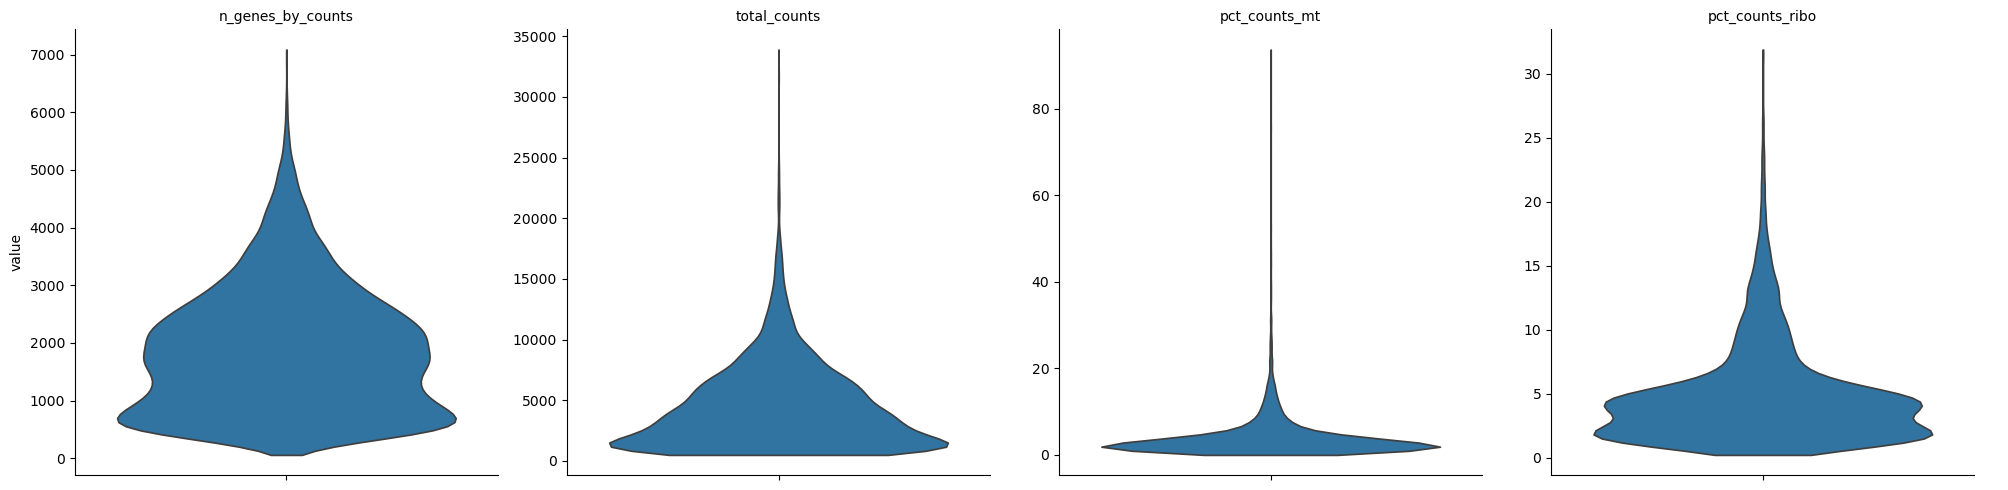

In [137]:
sc.pl.violin(
    adata_batch2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

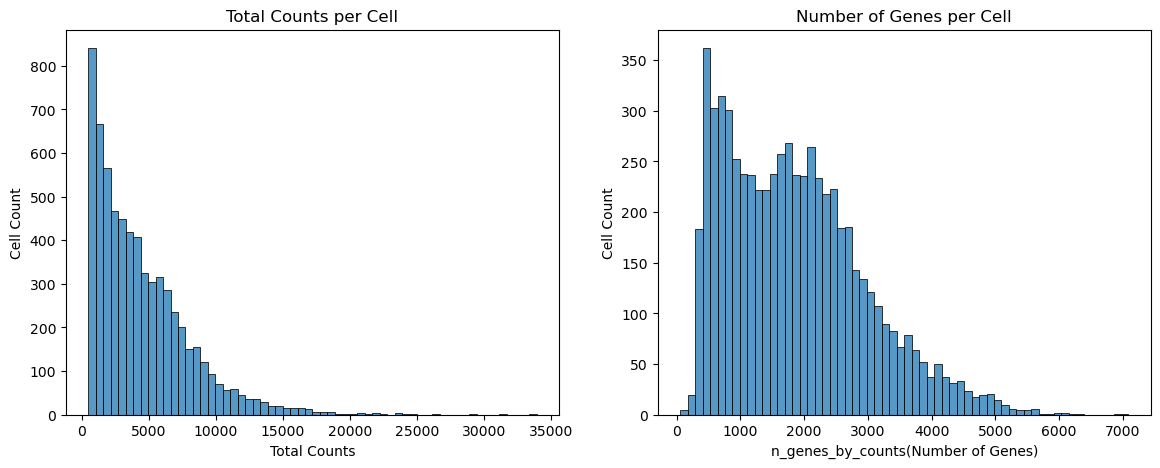

In [138]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch2.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch2.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

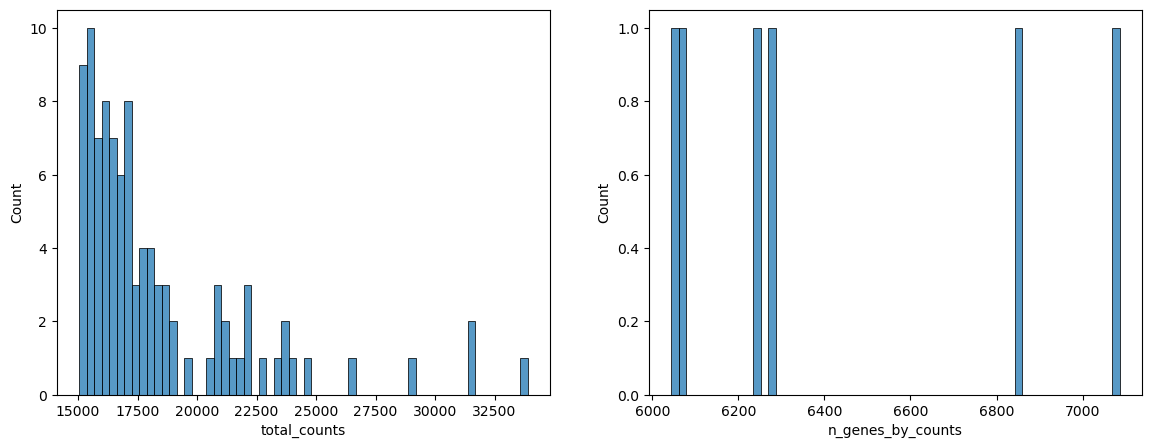

In [139]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch2.obs['total_counts'][adata_batch2.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch2.obs['n_genes_by_counts'][adata_batch2.obs['n_genes_by_counts'] > 6000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

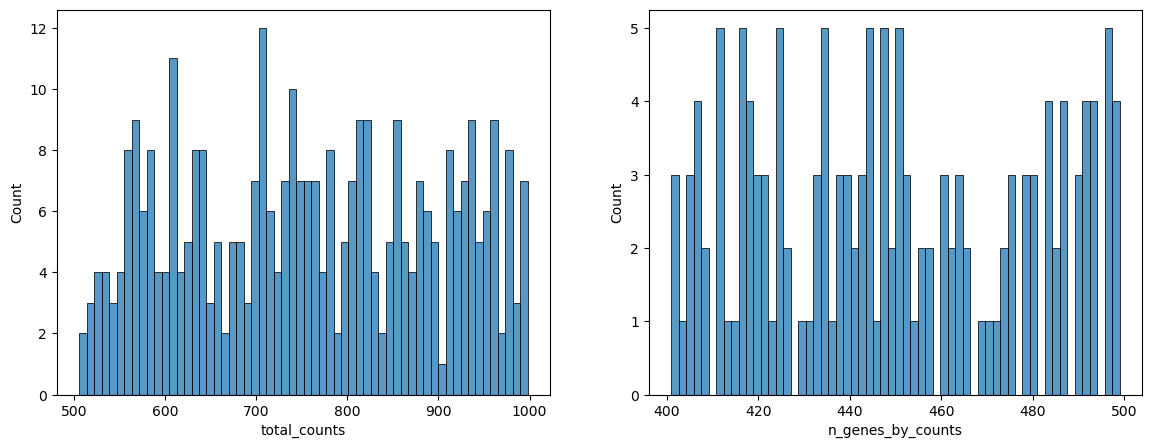

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch1.obs['total_counts'][adata_batch1.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch1.obs['n_genes_by_counts'][adata_batch1.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

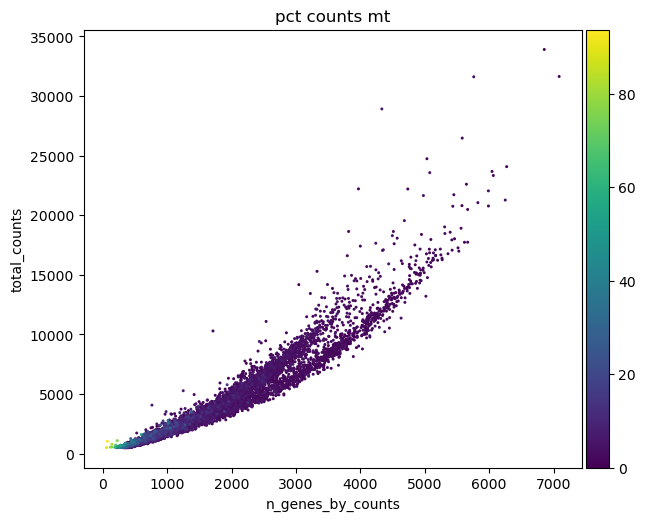

In [141]:
sc.pl.scatter(adata_batch2, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [142]:
print('Total number of cells: {:d}'.format(adata_batch2.n_obs))
# print('')
sc.pp.filter_cells(adata_batch2, max_counts=20000)
print('Number of cells after max count filter: {:d}'.format(adata_batch2.n_obs))
print('')
sc.pp.filter_cells(adata_batch2, max_genes=6000)
sc.pp.filter_cells(adata_batch2, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch2.n_obs))

adata_batch2 = adata_batch2[adata_batch2.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch2.n_obs))

Total number of cells: 6464
filtered out 22 cells that have more than 20000 counts
Number of cells after max count filter: 6442

filtered out 178 cells that have less than 400 genes expressed
Number of cells after gene filter: 6264
Number of cells after MT filter: 5848


In [143]:
print('Total number of genes: {:d}'.format(adata_batch2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch2, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch2.n_vars))

Total number of genes: 33989
filtered out 15112 genes that are detected in less than 5 cells
Number of genes after cell filter: 18877


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [144]:
sc.pp.calculate_qc_metrics(adata_batch2, qc_vars=['mt', 'ribo'], inplace=True)

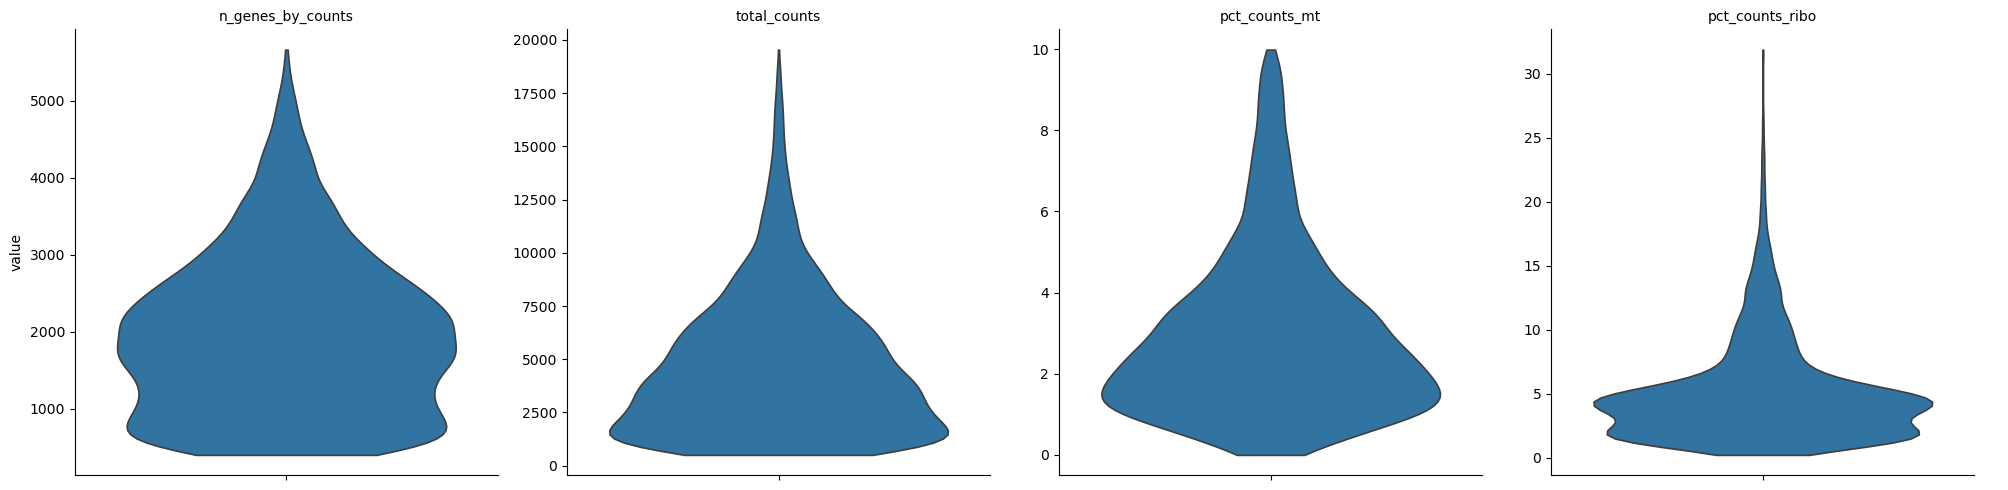

In [145]:
sc.pl.violin(
    adata_batch2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [146]:
adata_batch2

AnnData object with n_obs × n_vars = 5848 × 18877
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch3

In [147]:
# batch1
batch3_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch3_result/filtered_feature_bc_matrix")
batch3_name = "batch3"

adata_batch3 = sc.read_10x_mtx(
    batch3_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch3.obs['batches'] = 'batch3'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [148]:
adata_batch3

AnnData object with n_obs × n_vars = 6247 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [149]:
# add in Hashtag labels into .obs
feature3_path = os.path.join(batch3_path, 'features.tsv.gz')
if not os.path.exists(feature3_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features3 = pd.read_csv(feature3_path, sep='\t', header=None)
features3.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask3 = features3['feature_type'].str.contains('Antibody Capture', case=False) | \
           features3['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags3 = features3.loc[hto_mask3, 'gene_name'].tolist()
HTO_tags3 = [gene for gene in HTO_tags3 if gene in adata_batch3.var_names]

print(f"Hashtags found in {batch3_name}: {HTO_tags3}")

if HTO_tags3:
    adata_batch3.obs[HTO_tags3] = pd.DataFrame(adata_batch3[:, HTO_tags3].X.toarray(), index=adata_batch3.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch3, cell_hashing_columns=HTO_tags3)
    adata_batch3 = adata_batch3[:, ~adata_batch3.var_names.isin(HTO_tags3)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch3.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch3.obs["Classification"] = "Unknown"

Hashtags found in batch3: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [150]:
adata_batch3

AnnData object with n_obs × n_vars = 6247 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [151]:
adata_batch3.obs['Classification'].value_counts()

Classification
Hashtag_2    3353
Hashtag_1    1605
Hashtag_3     596
Hashtag_4     435
Doublet       258
Name: count, dtype: int64

In [152]:
print(adata_batch3.obs_names.is_unique) 
print(adata_batch3.var_names.is_unique) 

True
True


In [153]:
# count hashtage percentage
classification_a3 = adata_batch3.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a3.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 53.67%
Hashtag_1: 25.69%
Hashtag_3: 9.54%
Hashtag_4: 6.96%
Doublet: 4.13%


In [154]:
# delete doublets
adata_batch3 = adata_batch3[adata_batch3.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch3.shape}")

Cells retained: (5989, 33989)


In [155]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch3.obs[key] = adata_batch3.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [156]:
adata_batch3

AnnData object with n_obs × n_vars = 5989 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [157]:
print(adata_batch3.obs['genotype'].value_counts())
print(adata_batch3.obs['treatment'].value_counts())
print(adata_batch3.obs['gender'].value_counts())
print(adata_batch3.obs['brain_region'].value_counts())
print(adata_batch3.obs['sample'].value_counts())

genotype
WT    5989
Name: count, dtype: int64
treatment
LPS    5989
Name: count, dtype: int64
gender
Female    5989
Name: count, dtype: int64
brain_region
HP     3788
RSC    2201
Name: count, dtype: int64
sample
M5    4958
M6    1031
Name: count, dtype: int64


In [158]:
# create 'geno_treat' column : like WT_LPS
adata_batch3.obs["geno_treat"] = adata_batch3.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch3.obs["geno_treat_sex"] = adata_batch3.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [159]:
adata_batch3.var['ribo'] = adata_batch3.var_names.str.startswith('Rps') | adata_batch3.var_names.str.startswith('Rpl')
adata_batch3.var['mt'] = adata_batch3.var_names.str.startswith('mt-')

In [160]:
sc.pp.calculate_qc_metrics(adata_batch3, qc_vars=['mt', 'ribo'], inplace=True)

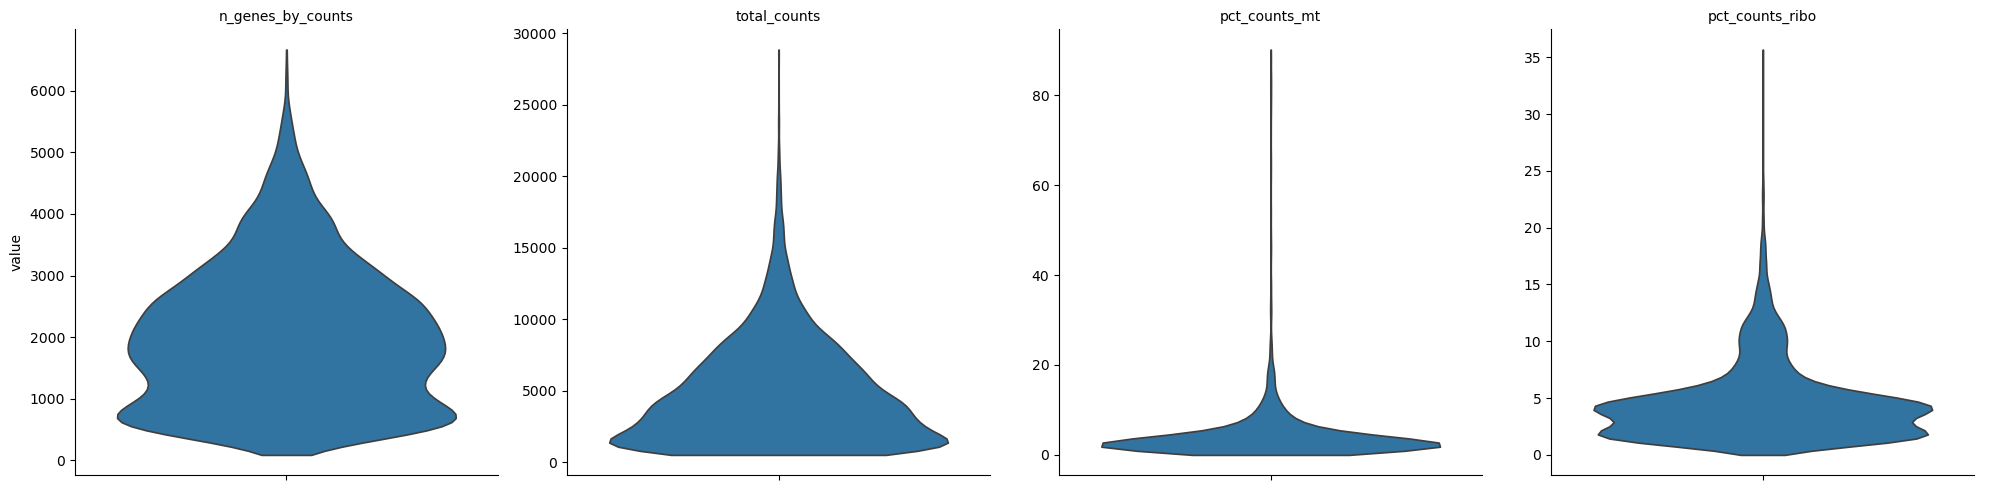

In [161]:
sc.pl.violin(
    adata_batch3,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

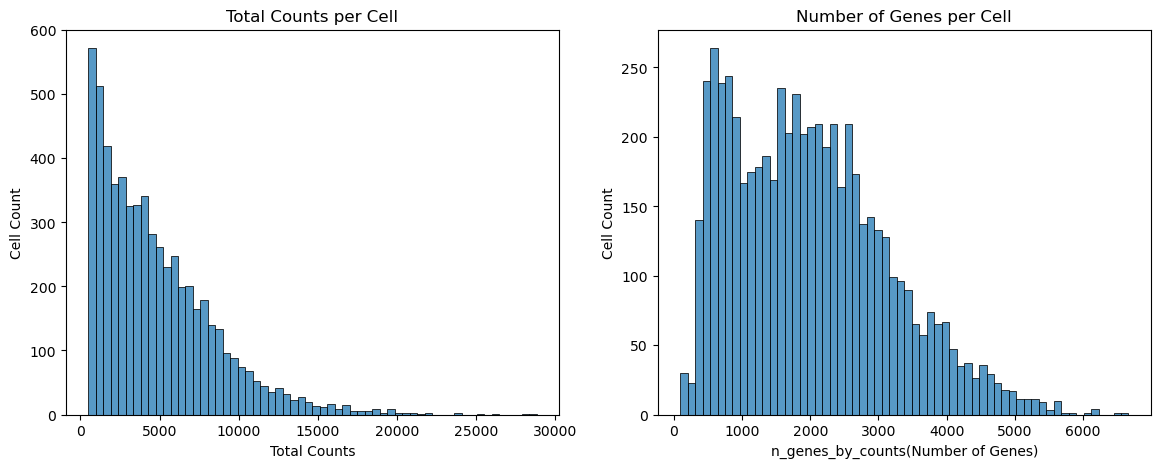

In [162]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch3.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch3.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

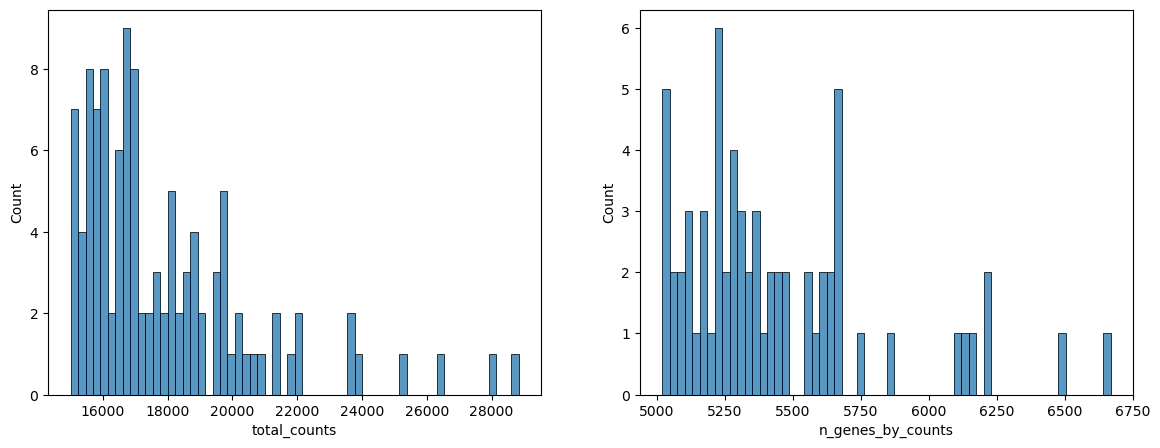

In [163]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch3.obs['total_counts'][adata_batch3.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch3.obs['n_genes_by_counts'][adata_batch3.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

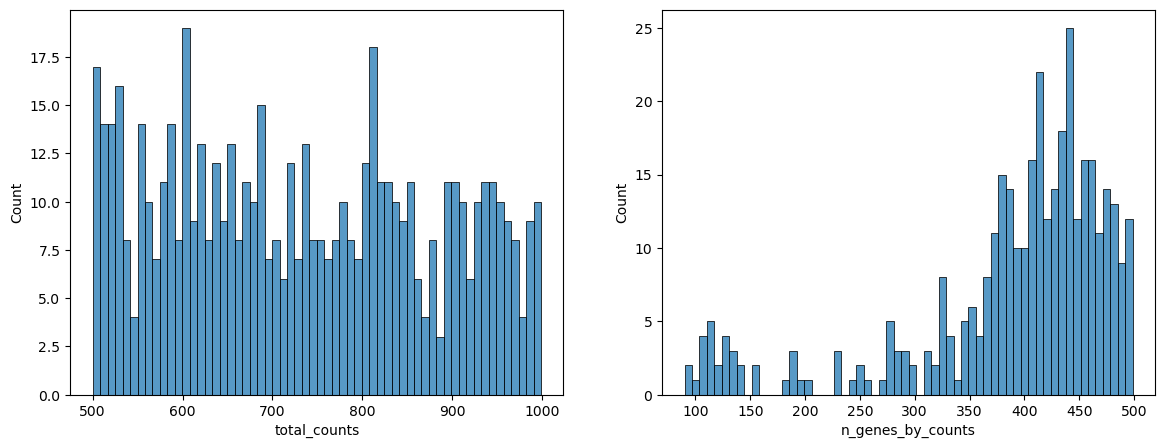

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch3.obs['total_counts'][adata_batch3.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch3.obs['n_genes_by_counts'][adata_batch3.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

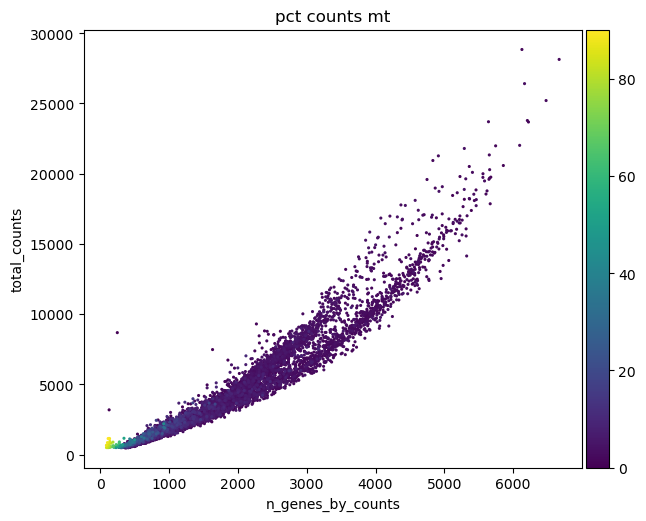

In [165]:
sc.pl.scatter(adata_batch3, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [166]:
print('Total number of cells: {:d}'.format(adata_batch3.n_obs))
# print('')
sc.pp.filter_cells(adata_batch3, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch3.n_obs))
print('')
sc.pp.filter_cells(adata_batch3, max_genes=5000)
# sc.pp.filter_cells(adata_batch1, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch3.n_obs))

adata_batch3 = adata_batch3[adata_batch3.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch3.n_obs))

Total number of cells: 5989
filtered out 110 cells that have more than 15000 counts
Number of cells after max count filter: 5879

filtered out 3 cells that have more than 5000 genes expressed
Number of cells after gene filter: 5876
Number of cells after MT filter: 5416


In [167]:
print('Total number of genes: {:d}'.format(adata_batch3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch3, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch3.n_vars))

Total number of genes: 33989
filtered out 15223 genes that are detected in less than 5 cells
Number of genes after cell filter: 18766


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [168]:
sc.pp.calculate_qc_metrics(adata_batch3, qc_vars=['mt', 'ribo'], inplace=True)

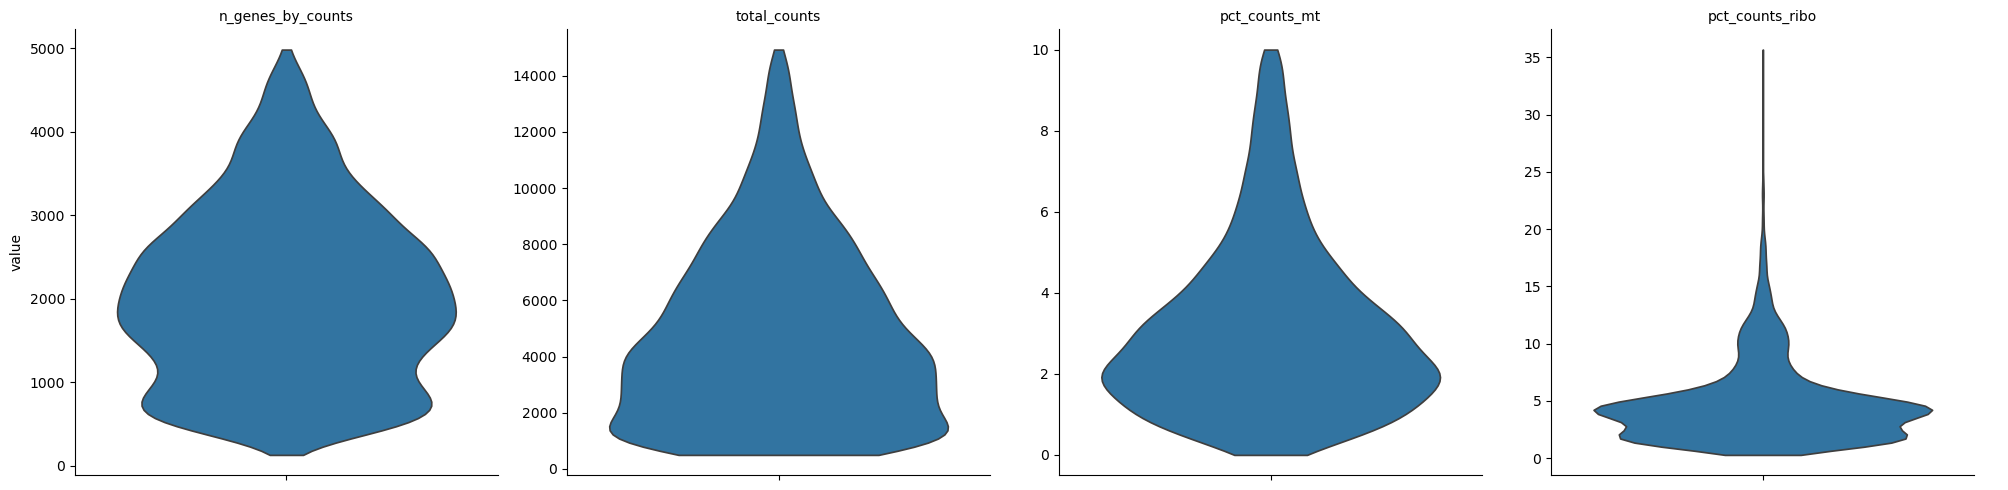

In [169]:
sc.pl.violin(
    adata_batch3,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [170]:
adata_batch3

AnnData object with n_obs × n_vars = 5416 × 18766
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch4

In [90]:
# batch4
batch4_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch4_result/filtered_feature_bc_matrix")
batch4_name = "batch4"

adata_batch4 = sc.read_10x_mtx(
    batch4_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch4.obs['batches'] = 'batch4'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [91]:
adata_batch4

AnnData object with n_obs × n_vars = 5678 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [92]:
# add in Hashtag labels into .obs
feature4_path = os.path.join(batch4_path, 'features.tsv.gz')
if not os.path.exists(feature4_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features4 = pd.read_csv(feature4_path, sep='\t', header=None)
features4.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features4['feature_type'].str.contains('Antibody Capture', case=False) | \
           features4['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features4.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch4.var_names]

print(f"Hashtags found in {batch4_name}: {HTO_tags}")

if HTO_tags:
    adata_batch4.obs[HTO_tags] = pd.DataFrame(adata_batch4[:, HTO_tags].X.toarray(), index=adata_batch4.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch4, cell_hashing_columns=HTO_tags)
    adata_batch4 = adata_batch4[:, ~adata_batch4.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch4.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch4.obs["Classification"] = "Unknown"

Hashtags found in batch4: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [93]:
adata_batch4

AnnData object with n_obs × n_vars = 5678 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [94]:
adata_batch4.obs['Classification'].value_counts()

Classification
Hashtag_2    4015
Hashtag_1     492
Hashtag_4     428
Doublet       419
Hashtag_3     324
Name: count, dtype: int64

In [95]:
print(adata_batch4.obs_names.is_unique) 
print(adata_batch4.var_names.is_unique) 

True
True


In [96]:
# count hashtage percentage
classification_a4 = adata_batch4.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a4.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 70.71%
Hashtag_1: 8.67%
Hashtag_4: 7.54%
Doublet: 7.38%
Hashtag_3: 5.71%


In [97]:
# delete doublets
adata_batch4 = adata_batch4[adata_batch4.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch4.shape}")

Cells retained: (5259, 33989)


In [98]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch4.obs[key] = adata_batch4.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [99]:
adata_batch4

AnnData object with n_obs × n_vars = 5259 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [100]:
print(adata_batch4.obs['genotype'].value_counts())
print(adata_batch4.obs['treatment'].value_counts())
print(adata_batch4.obs['gender'].value_counts())
print(adata_batch4.obs['brain_region'].value_counts())

genotype
5XFAD    5259
Name: count, dtype: int64
treatment
Vehicle    5259
Name: count, dtype: int64
gender
Male    5259
Name: count, dtype: int64
brain_region
HP     4443
RSC     816
Name: count, dtype: int64


In [101]:
# create 'geno_treat' column : like WT_LPS
adata_batch4.obs["geno_treat"] = adata_batch4.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch4.obs["geno_treat_sex"] = adata_batch4.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [102]:
adata_batch4.var['ribo'] = adata_batch4.var_names.str.startswith('Rps') | adata_batch4.var_names.str.startswith('Rpl')
adata_batch4.var['mt'] = adata_batch4.var_names.str.startswith('mt-')

In [103]:
sc.pp.calculate_qc_metrics(adata_batch4, qc_vars=['mt', 'ribo'], inplace=True)

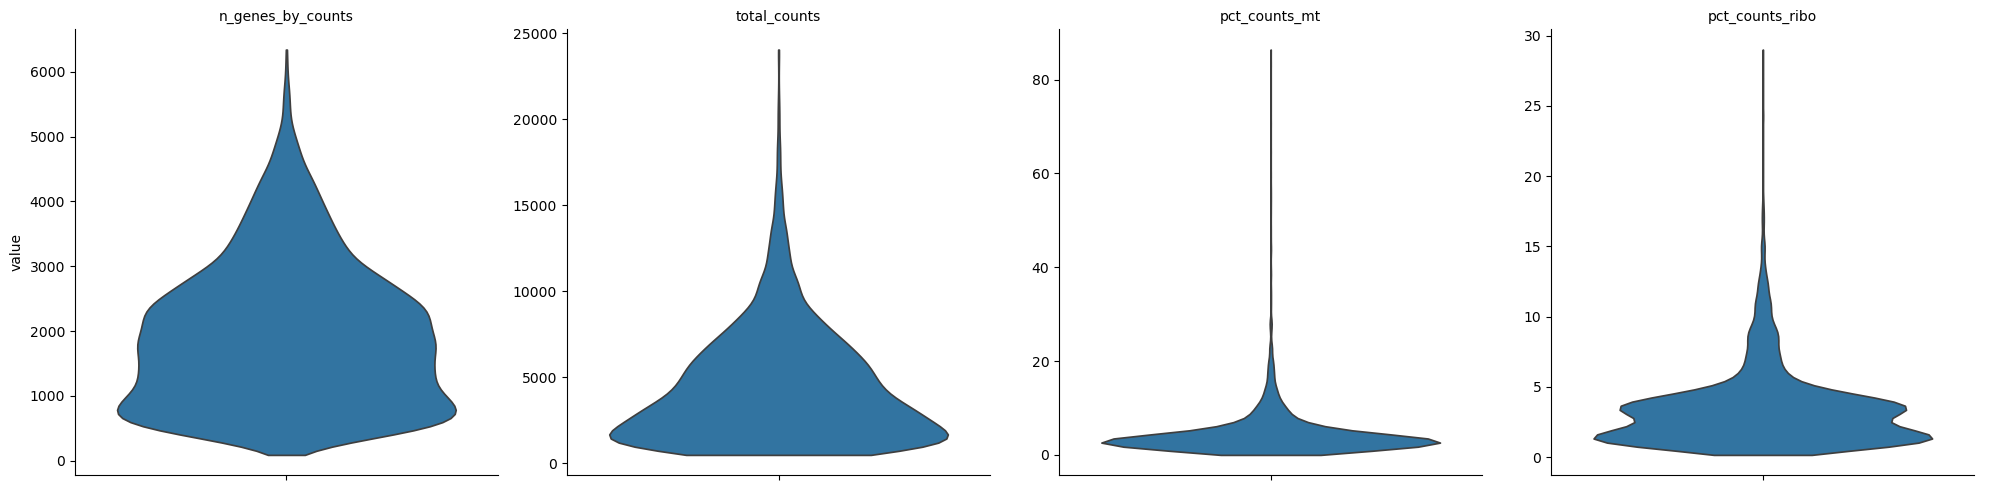

In [104]:
sc.pl.violin(
    adata_batch4,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

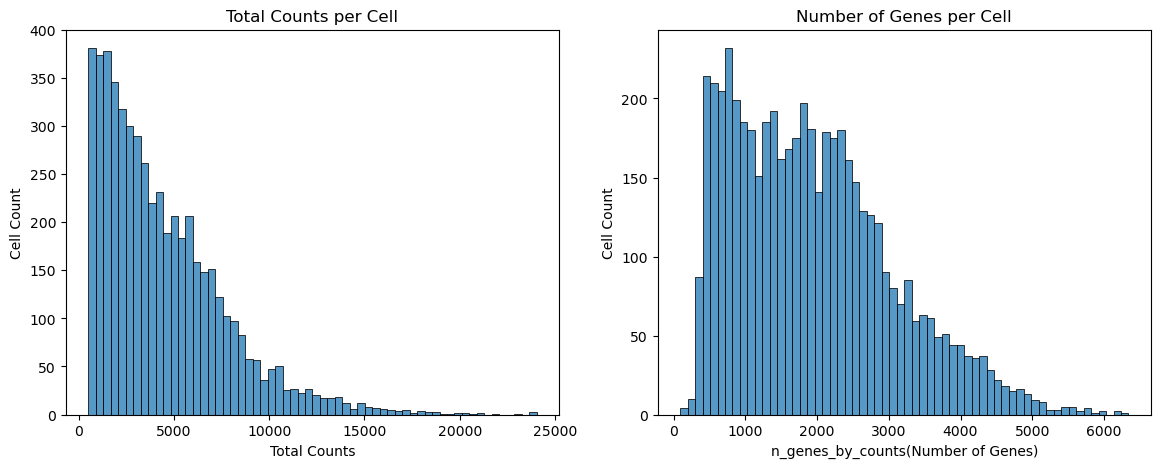

In [105]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch4.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch4.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

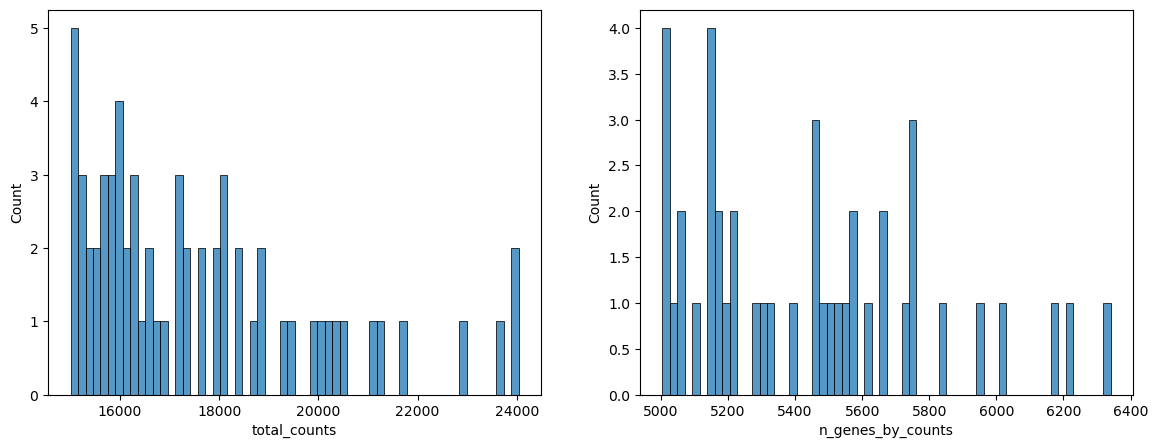

In [106]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch4.obs['total_counts'][adata_batch4.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch4.obs['n_genes_by_counts'][adata_batch4.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

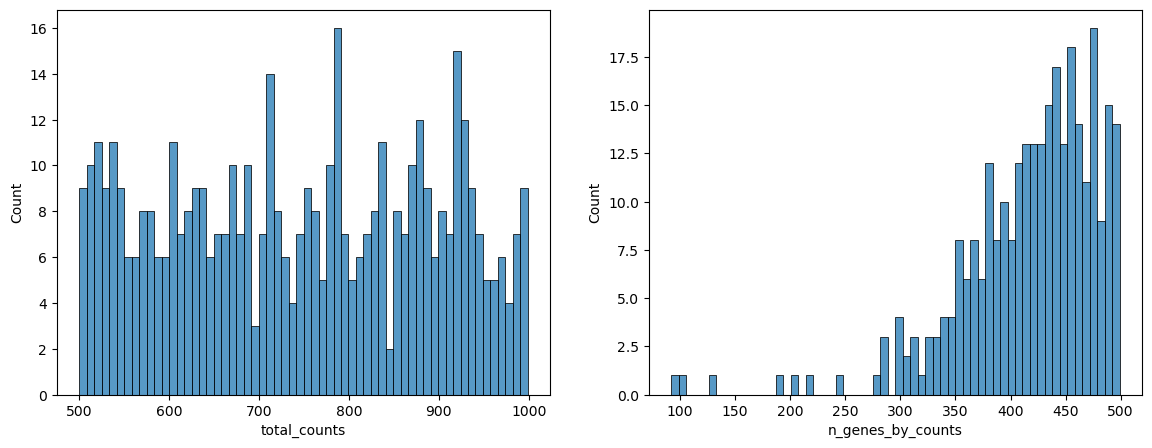

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch4.obs['total_counts'][adata_batch4.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch4.obs['n_genes_by_counts'][adata_batch4.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

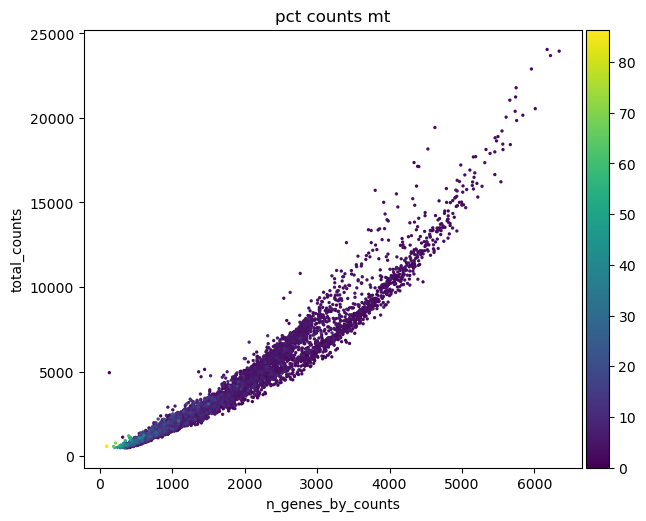

In [108]:
sc.pl.scatter(adata_batch4, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [109]:
print('Total number of cells: {:d}'.format(adata_batch4.n_obs))
# print('')
sc.pp.filter_cells(adata_batch4, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch4.n_obs))
print('')
sc.pp.filter_cells(adata_batch4, max_genes=5000)
sc.pp.filter_cells(adata_batch4, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch4.n_obs))

adata_batch4 = adata_batch4[adata_batch4.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch4.n_obs))

Total number of cells: 5259
filtered out 63 cells that have more than 15000 counts
Number of cells after max count filter: 5196

filtered out 3 cells that have more than 5000 genes expressed
filtered out 35 cells that have less than 350 genes expressed
Number of cells after gene filter: 5158
Number of cells after MT filter: 4761


In [110]:
print('Total number of genes: {:d}'.format(adata_batch4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch4, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch4.n_vars))

Total number of genes: 33989
filtered out 15680 genes that are detected in less than 5 cells
Number of genes after cell filter: 18309


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [111]:
sc.pp.calculate_qc_metrics(adata_batch4, qc_vars=['mt', 'ribo'], inplace=True)

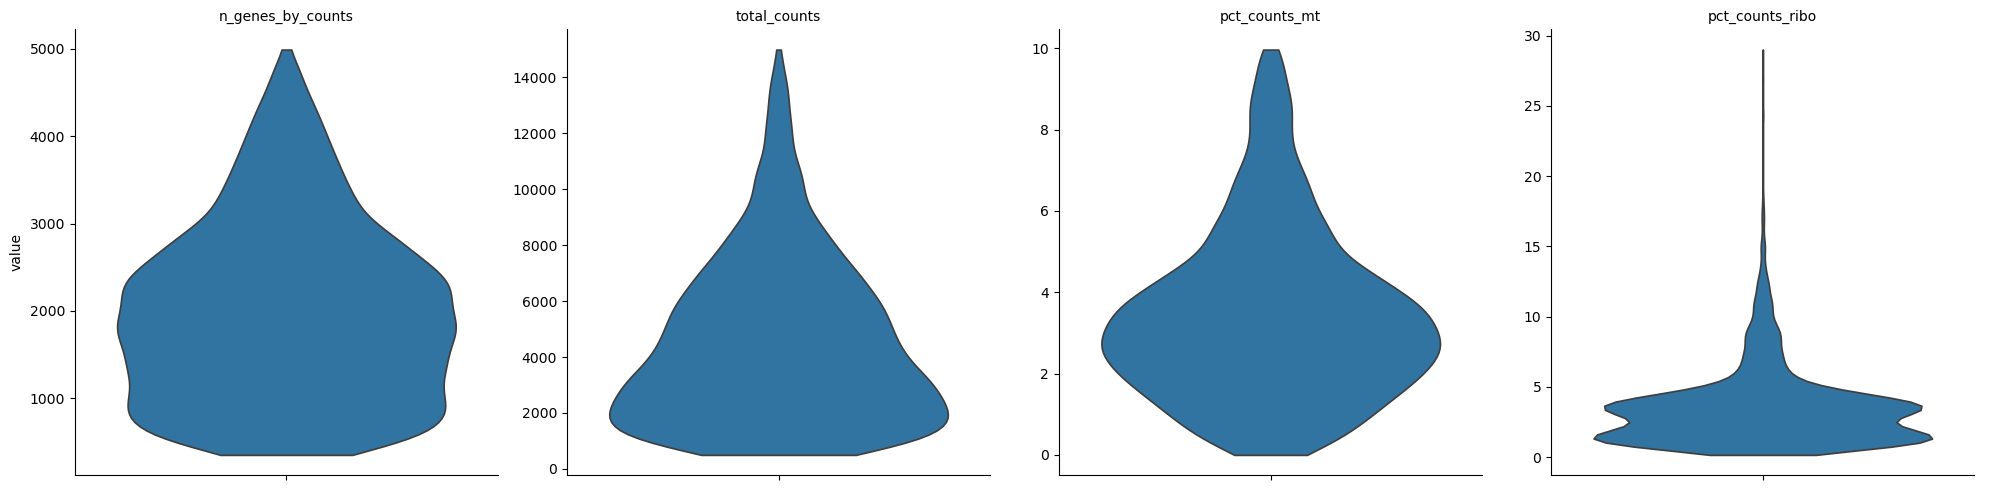

In [112]:
sc.pl.violin(
    adata_batch4,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [113]:
adata_batch4

AnnData object with n_obs × n_vars = 4761 × 18309
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch5

In [171]:
# batch4
batch5_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch5_result/filtered_feature_bc_matrix")
batch5_name = "batch5"

adata_batch5 = sc.read_10x_mtx(
    batch5_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch5.obs['batches'] = 'batch5'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [172]:
adata_batch5

AnnData object with n_obs × n_vars = 6193 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [173]:
# add in Hashtag labels into .obs
feature5_path = os.path.join(batch5_path, 'features.tsv.gz')
if not os.path.exists(feature5_path):
    raise FileNotFoundError(f"Features file not found for {batch5_name}")

features5 = pd.read_csv(feature5_path, sep='\t', header=None)
features5.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask5 = features5['feature_type'].str.contains('Antibody Capture', case=False) | \
           features5['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags5 = features5.loc[hto_mask5, 'gene_name'].tolist()
HTO_tags5 = [gene for gene in HTO_tags5 if gene in adata_batch5.var_names]

print(f"Hashtags found in {batch5_name}: {HTO_tags}")

if HTO_tags5:
    adata_batch5.obs[HTO_tags5] = pd.DataFrame(adata_batch5[:, HTO_tags5].X.toarray(), index=adata_batch5.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch5, cell_hashing_columns=HTO_tags5)
    adata_batch5 = adata_batch5[:, ~adata_batch5.var_names.isin(HTO_tags5)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch5.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch5.obs["Classification"] = "Unknown"

Hashtags found in batch5: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [174]:
adata_batch5

AnnData object with n_obs × n_vars = 6193 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [175]:
adata_batch5.obs['Classification'].value_counts()

Classification
Hashtag_1    4252
Hashtag_2     854
Hashtag_4     506
Doublet       290
Hashtag_3     290
Negative        1
Name: count, dtype: int64

In [176]:
print(adata_batch5.obs_names.is_unique) 
print(adata_batch5.var_names.is_unique) 

True
True


In [177]:
# count hashtage percentage
classification_a5 = adata_batch5.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a5.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_1: 68.66%
Hashtag_2: 13.79%
Hashtag_4: 8.17%
Doublet: 4.68%
Hashtag_3: 4.68%
Negative: 0.02%


In [178]:
# delete doublets
adata_batch5 = adata_batch5[adata_batch5.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4'])].copy()
print(f"Cells retained: {adata_batch5.shape}")

Cells retained: (5902, 33989)


In [179]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch5.obs[key] = adata_batch5.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [180]:
adata_batch5

AnnData object with n_obs × n_vars = 5902 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [181]:
print(adata_batch5.obs['genotype'].value_counts())
print(adata_batch5.obs['treatment'].value_counts())
print(adata_batch5.obs['gender'].value_counts())
print(adata_batch5.obs['brain_region'].value_counts())
print(adata_batch5.obs['sample'].value_counts())

genotype
WT    5902
Name: count, dtype: int64
treatment
Vehicle    5106
LPS         796
Name: count, dtype: int64
gender
Male    5902
Name: count, dtype: int64
brain_region
RSC    4542
HP     1360
Name: count, dtype: int64
sample
M9     5106
M10     796
Name: count, dtype: int64


In [182]:
# create 'geno_treat' column : like WT_LPS
adata_batch5.obs["geno_treat"] = adata_batch5.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch5.obs["geno_treat_sex"] = adata_batch5.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [183]:
adata_batch5.var['ribo'] = adata_batch5.var_names.str.startswith('Rps') | adata_batch5.var_names.str.startswith('Rpl')
adata_batch5.var['mt'] = adata_batch5.var_names.str.startswith('mt-')

In [184]:
sc.pp.calculate_qc_metrics(adata_batch5, qc_vars=['mt', 'ribo'], inplace=True)

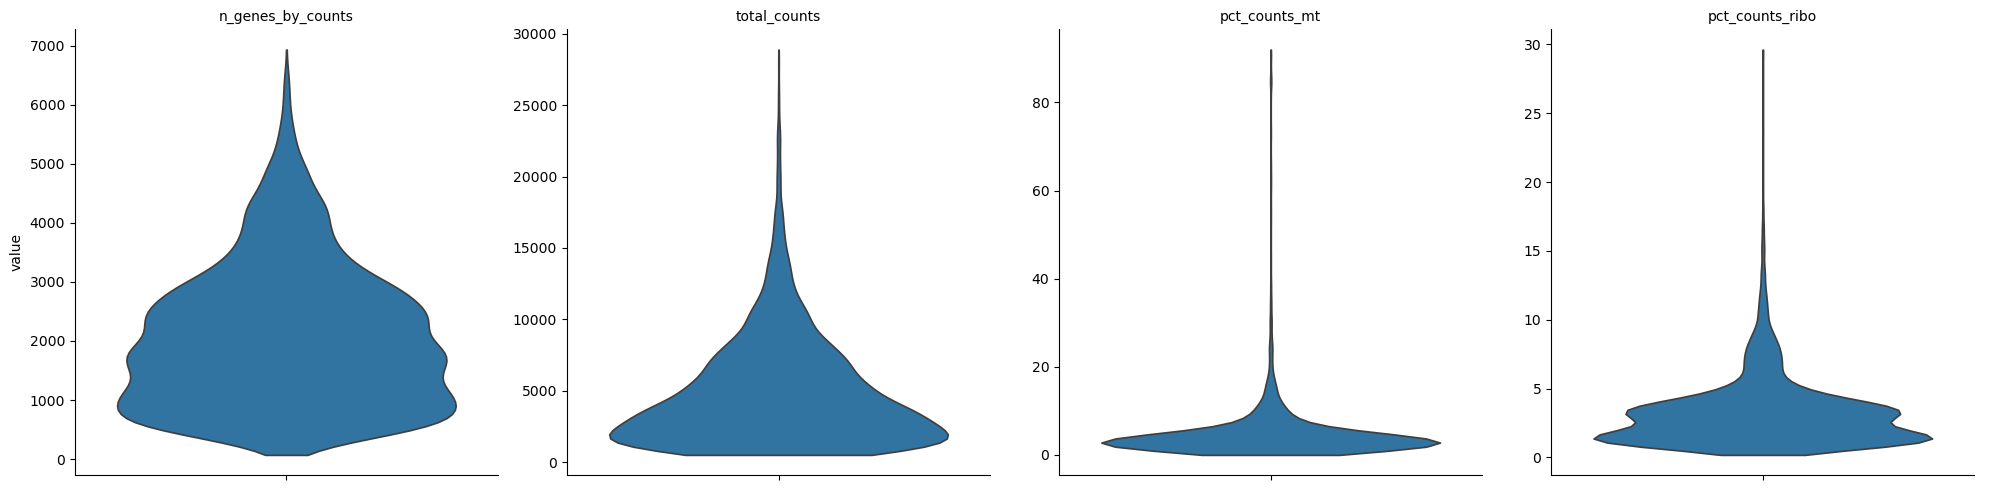

In [185]:
sc.pl.violin(
    adata_batch5,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

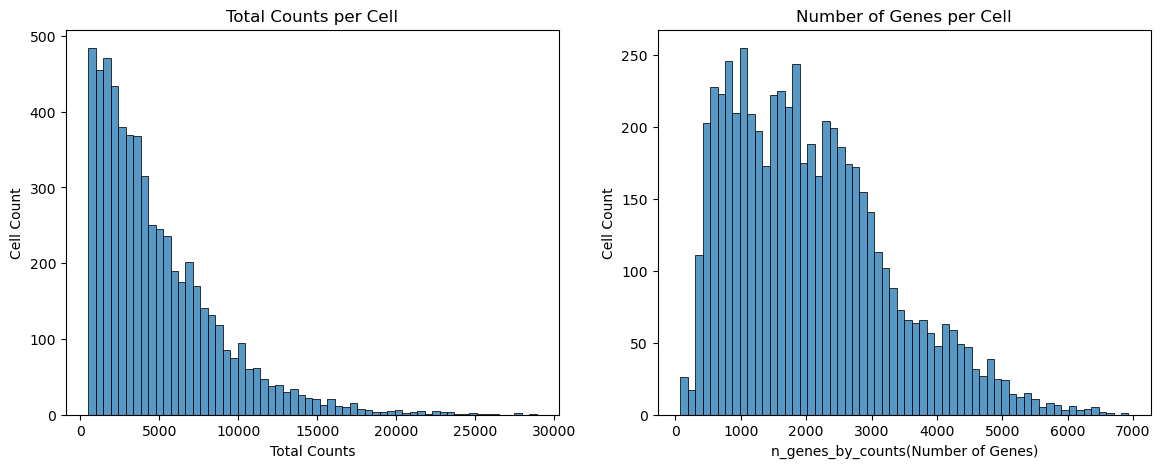

In [186]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch5.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch5.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

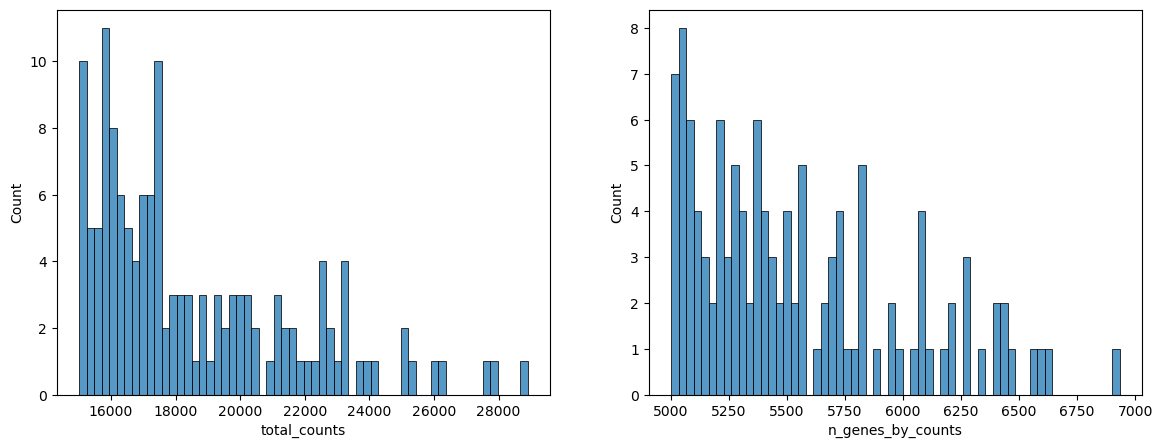

In [187]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch5.obs['total_counts'][adata_batch5.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch5.obs['n_genes_by_counts'][adata_batch5.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

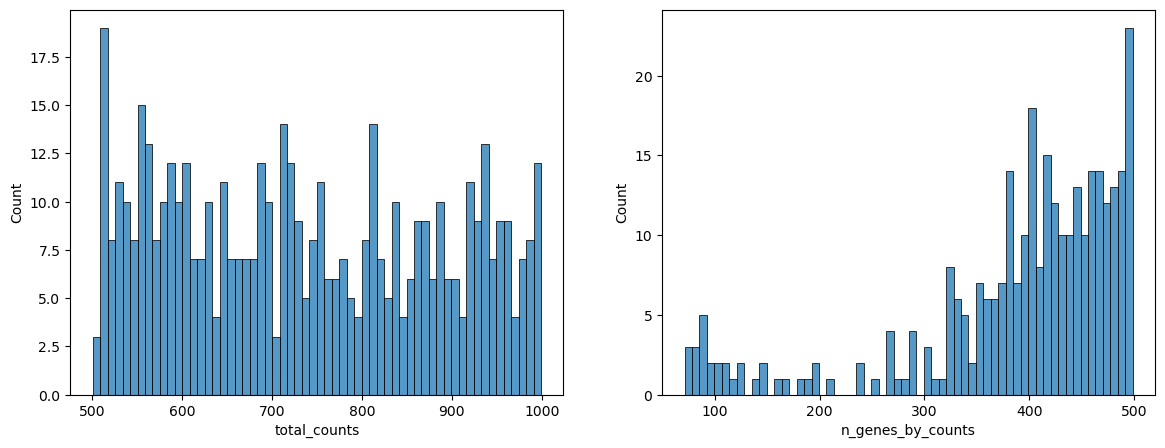

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch5.obs['total_counts'][adata_batch5.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch5.obs['n_genes_by_counts'][adata_batch5.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

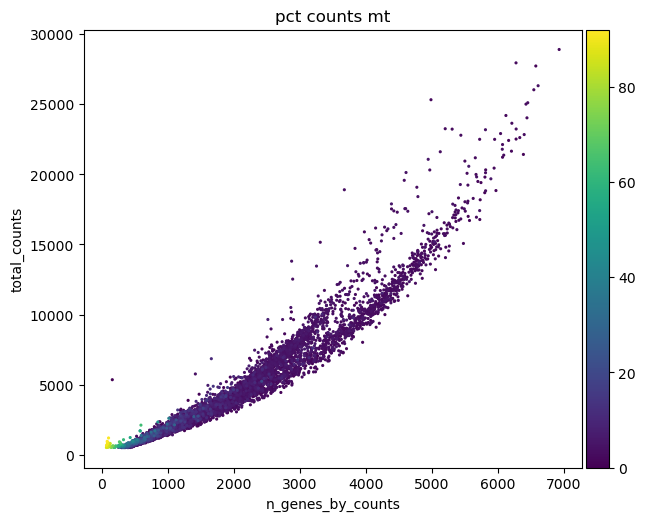

In [189]:
sc.pl.scatter(adata_batch5, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [190]:
print('Total number of cells: {:d}'.format(adata_batch5.n_obs))
# print('')
sc.pp.filter_cells(adata_batch5, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch5.n_obs))
print('')
sc.pp.filter_cells(adata_batch5, max_genes=5000)
sc.pp.filter_cells(adata_batch5, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch5.n_obs))

adata_batch5 = adata_batch5[adata_batch5.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch5.n_obs))

Total number of cells: 5902
filtered out 141 cells that have more than 15000 counts
Number of cells after max count filter: 5761

filtered out 15 cells that have more than 5000 genes expressed
filtered out 69 cells that have less than 350 genes expressed
Number of cells after gene filter: 5677
Number of cells after MT filter: 5220


In [191]:
print('Total number of genes: {:d}'.format(adata_batch5.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch5, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch5.n_vars))

Total number of genes: 33989
filtered out 15077 genes that are detected in less than 5 cells
Number of genes after cell filter: 18912


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [192]:
sc.pp.calculate_qc_metrics(adata_batch5, qc_vars=['mt', 'ribo'], inplace=True)

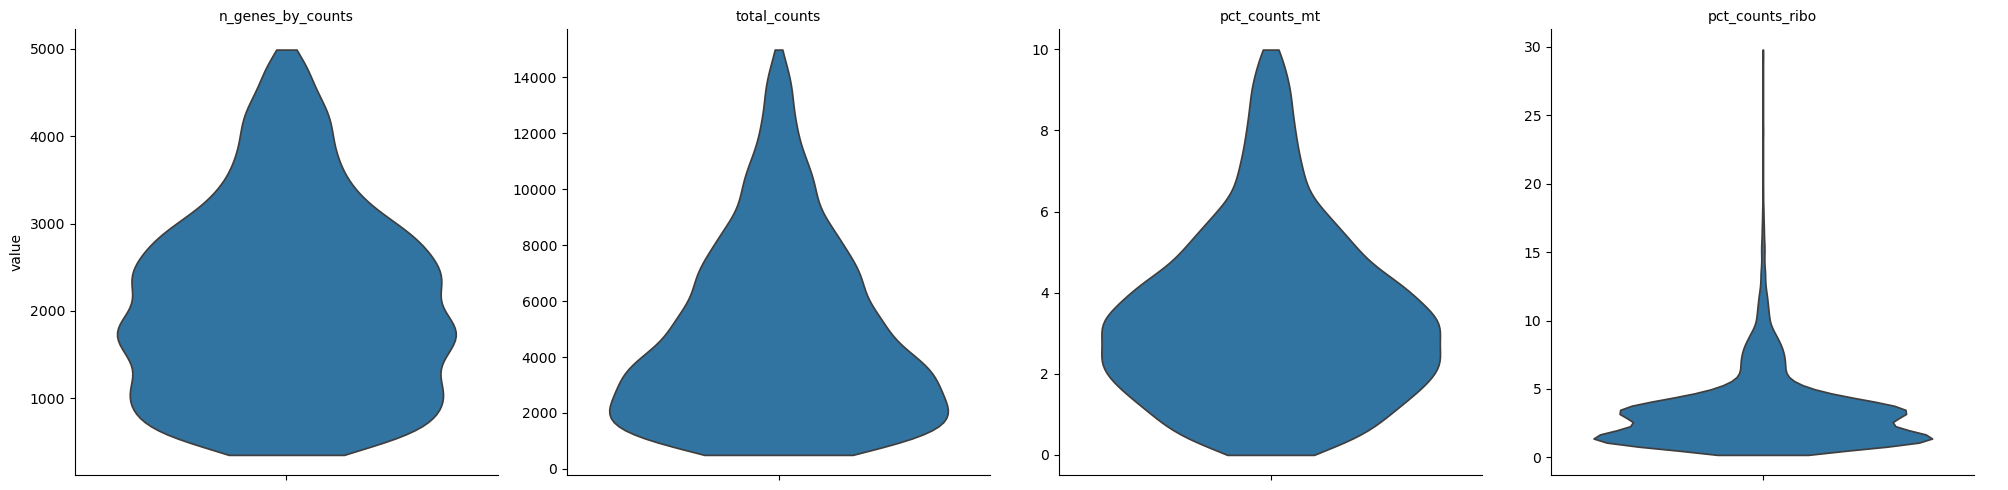

In [193]:
sc.pl.violin(
    adata_batch5,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [194]:
adata_batch5

AnnData object with n_obs × n_vars = 5220 × 18912
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch6

In [239]:
# batch4
batch6_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch6_result/filtered_feature_bc_matrix")
batch6_name = "batch6"

adata_batch6 = sc.read_10x_mtx(
    batch6_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch6.obs['batches'] = 'batch6'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [240]:
adata_batch6

AnnData object with n_obs × n_vars = 3773 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [241]:
# add in Hashtag labels into .obs
feature6_path = os.path.join(batch6_path, 'features.tsv.gz')
if not os.path.exists(feature6_path):
    raise FileNotFoundError(f"Features file not found for {batch6_name}")

features6 = pd.read_csv(feature6_path, sep='\t', header=None)
features6.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask6 = features6['feature_type'].str.contains('Antibody Capture', case=False) | \
           features6['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags6 = features6.loc[hto_mask6, 'gene_name'].tolist()
HTO_tags6 = [gene for gene in HTO_tags6 if gene in adata_batch6.var_names]

print(f"Hashtags found in {batch6_name}: {HTO_tags6}")

if HTO_tags6:
    adata_batch6.obs[HTO_tags6] = pd.DataFrame(adata_batch6[:, HTO_tags6].X.toarray(), index=adata_batch6.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch6, cell_hashing_columns=HTO_tags6)
    adata_batch6 = adata_batch6[:, ~adata_batch6.var_names.isin(HTO_tags6)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch6.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch6.obs["Classification"] = "Unknown"

Hashtags found in batch6: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [242]:
adata_batch6

AnnData object with n_obs × n_vars = 3773 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [243]:
adata_batch6.obs['Classification'].value_counts()

Classification
Hashtag_2    2929
Hashtag_3     278
Doublet       242
Hashtag_4     179
Hashtag_1     145
Name: count, dtype: int64

In [244]:
print(adata_batch6.obs_names.is_unique) 
print(adata_batch6.var_names.is_unique) 

True
True


In [245]:
# count hashtage percentage
classification_a6 = adata_batch6.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a6.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 77.63%
Hashtag_3: 7.37%
Doublet: 6.41%
Hashtag_4: 4.74%
Hashtag_1: 3.84%


In [246]:
# delete doublets
adata_batch6 = adata_batch6[adata_batch6.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4'])].copy()
print(f"Cells retained: {adata_batch6.shape}")

Cells retained: (3531, 33989)


In [247]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch6.obs[key] = adata_batch6.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [248]:
adata_batch6

AnnData object with n_obs × n_vars = 3531 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [249]:
print(adata_batch6.obs['genotype'].value_counts())
print(adata_batch6.obs['treatment'].value_counts())
print(adata_batch6.obs['gender'].value_counts())
print(adata_batch6.obs['brain_region'].value_counts())

genotype
5XFAD    3531
Name: count, dtype: int64
treatment
Vehicle    3531
Name: count, dtype: int64
gender
Female    3074
Male       457
Name: count, dtype: int64
brain_region
RSC    3108
HP      423
Name: count, dtype: int64


In [250]:
# create 'geno_treat' column : like WT_LPS
adata_batch6.obs["geno_treat"] = adata_batch6.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch6.obs["geno_treat_sex"] = adata_batch6.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [251]:
adata_batch6.var['ribo'] = adata_batch6.var_names.str.startswith('Rps') | adata_batch6.var_names.str.startswith('Rpl')
adata_batch6.var['mt'] = adata_batch6.var_names.str.startswith('mt-')

In [252]:
sc.pp.calculate_qc_metrics(adata_batch6, qc_vars=['mt', 'ribo'], inplace=True)

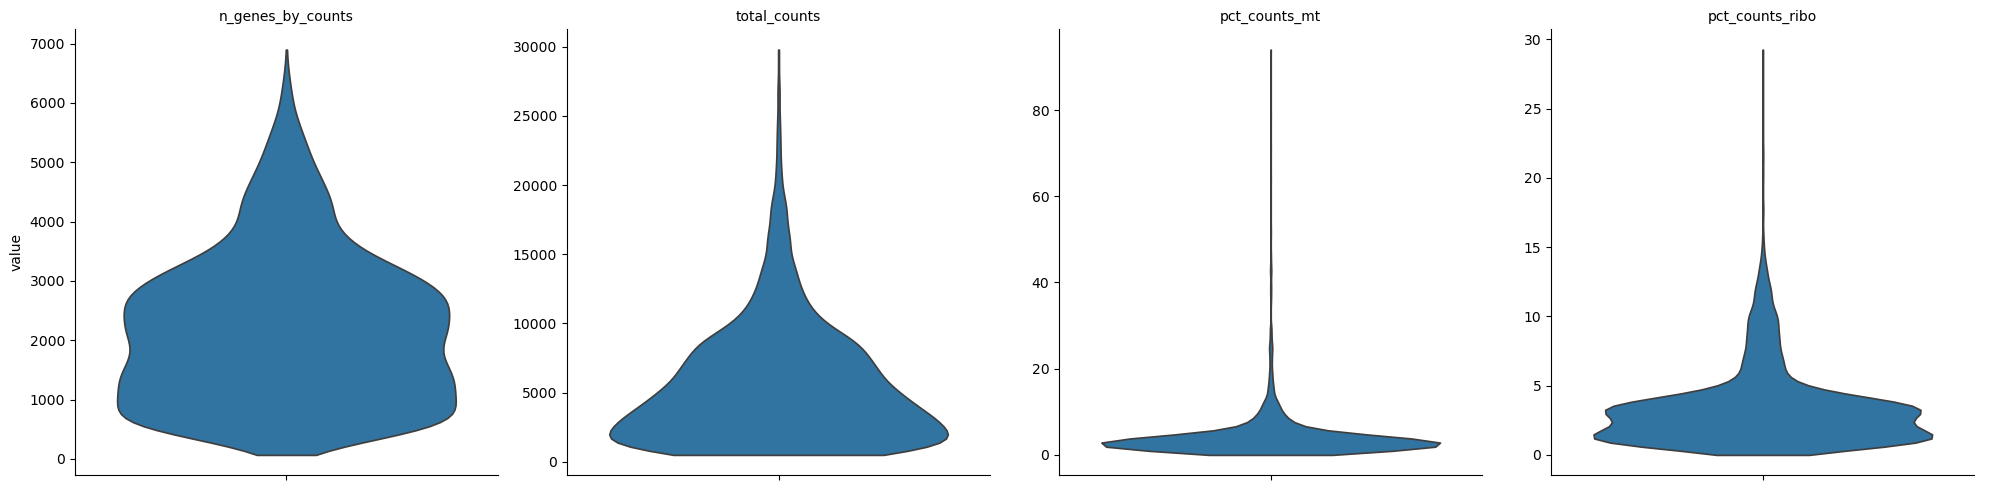

In [253]:
sc.pl.violin(
    adata_batch6,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

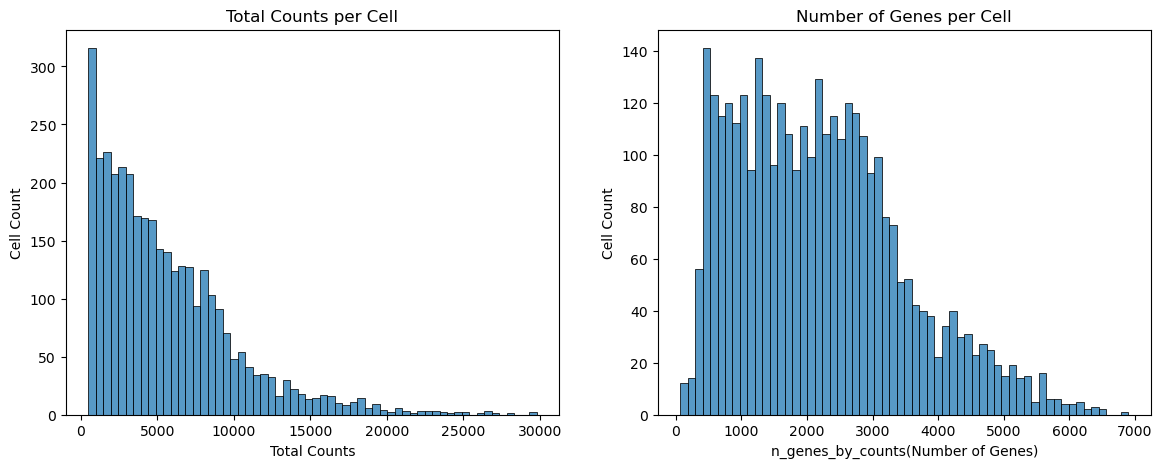

In [254]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch6.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch6.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

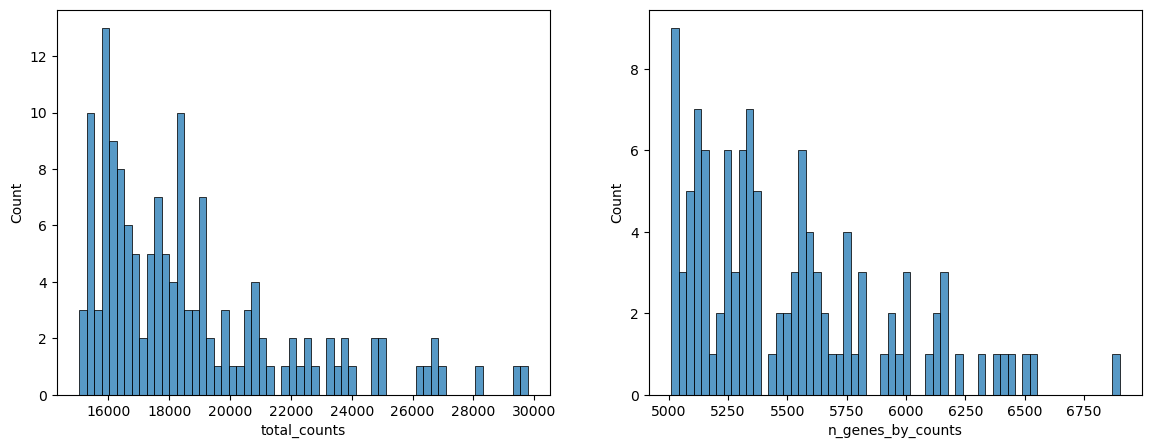

In [255]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch6.obs['total_counts'][adata_batch6.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch6.obs['n_genes_by_counts'][adata_batch6.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

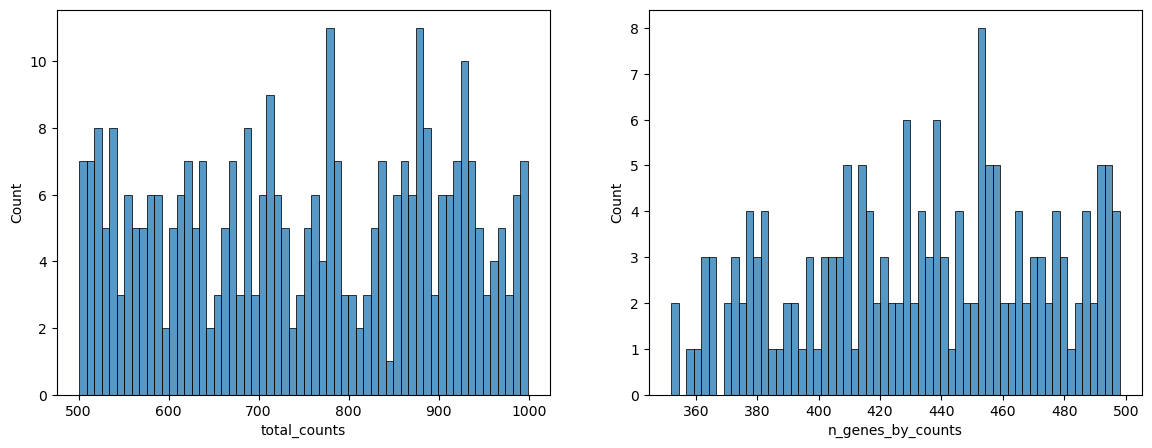

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch4.obs['total_counts'][adata_batch4.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch4.obs['n_genes_by_counts'][adata_batch4.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

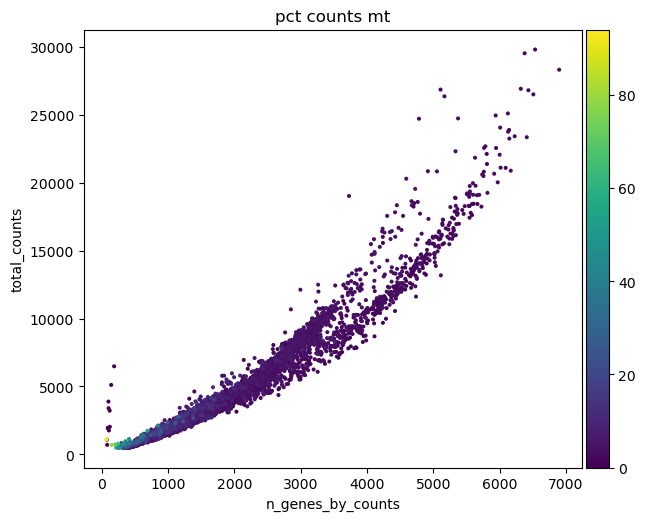

In [257]:
sc.pl.scatter(adata_batch6, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [258]:
print('Total number of cells: {:d}'.format(adata_batch6.n_obs))
# print('')
sc.pp.filter_cells(adata_batch6, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch6.n_obs))
print('')
sc.pp.filter_cells(adata_batch6, max_genes=5000)
sc.pp.filter_cells(adata_batch6, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch6.n_obs))

adata_batch6 = adata_batch6[adata_batch6.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch6.n_obs))

Total number of cells: 3531
filtered out 146 cells that have more than 15000 counts
Number of cells after max count filter: 3385

filtered out 8 cells that have more than 5000 genes expressed
filtered out 40 cells that have less than 350 genes expressed
Number of cells after gene filter: 3337
Number of cells after MT filter: 3131


In [259]:
print('Total number of genes: {:d}'.format(adata_batch6.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch6, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch6.n_vars))

Total number of genes: 33989
filtered out 15973 genes that are detected in less than 5 cells
Number of genes after cell filter: 18016


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [260]:
sc.pp.calculate_qc_metrics(adata_batch6, qc_vars=['mt', 'ribo'], inplace=True)

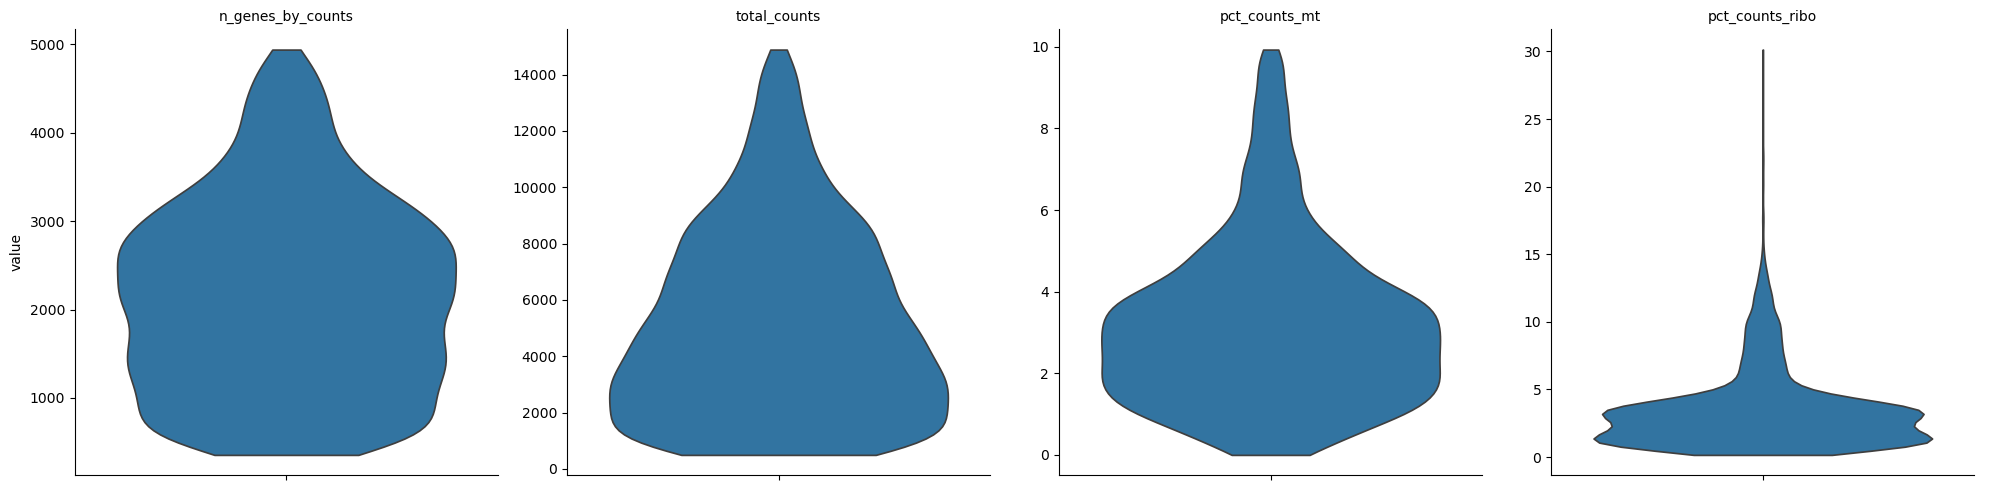

In [261]:
sc.pl.violin(
    adata_batch6,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [262]:
adata_batch6

AnnData object with n_obs × n_vars = 3131 × 18016
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch7

In [263]:
# batch7
batch7_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch7_result/filtered_feature_bc_matrix")
batch7_name = "batch7"

adata_batch7 = sc.read_10x_mtx(
    batch7_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch7.obs['batches'] = 'batch7'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [264]:
adata_batch7

AnnData object with n_obs × n_vars = 6180 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [265]:
# add in Hashtag labels into .obs
feature7_path = os.path.join(batch7_path, 'features.tsv.gz')
if not os.path.exists(feature7_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features7 = pd.read_csv(feature7_path, sep='\t', header=None)
features7.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask7 = features7['feature_type'].str.contains('Antibody Capture', case=False) | \
           features7['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags7 = features7.loc[hto_mask7, 'gene_name'].tolist()
HTO_tags7 = [gene for gene in HTO_tags7 if gene in adata_batch7.var_names]

print(f"Hashtags found in {batch7_name}: {HTO_tags7}")

if HTO_tags7:
    adata_batch7.obs[HTO_tags] = pd.DataFrame(adata_batch7[:, HTO_tags7].X.toarray(), index=adata_batch7.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch7, cell_hashing_columns=HTO_tags)
    adata_batch7 = adata_batch7[:, ~adata_batch7.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch7.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch7.obs["Classification"] = "Unknown"

Hashtags found in batch7: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [266]:
adata_batch7

AnnData object with n_obs × n_vars = 6180 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [267]:
adata_batch7.obs['Classification'].value_counts()

Classification
Hashtag_2    2183
Hashtag_4    1785
Hashtag_1    1634
Hashtag_3     335
Doublet       243
Name: count, dtype: int64

In [268]:
print(adata_batch7.obs_names.is_unique) 
print(adata_batch7.var_names.is_unique) 

True
True


In [269]:
# count hashtage percentage
classification_a7 = adata_batch7.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a7.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 35.32%
Hashtag_4: 28.88%
Hashtag_1: 26.44%
Hashtag_3: 5.42%
Doublet: 3.93%


In [270]:
# delete doublets
adata_batch7 = adata_batch7[adata_batch7.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch7.shape}")

Cells retained: (5937, 33989)


In [271]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch7.obs[key] = adata_batch7.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [272]:
adata_batch7

AnnData object with n_obs × n_vars = 5937 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [273]:
print(adata_batch7.obs['genotype'].value_counts())
print(adata_batch7.obs['treatment'].value_counts())
print(adata_batch7.obs['gender'].value_counts())
print(adata_batch7.obs['brain_region'].value_counts())

genotype
WT    5937
Name: count, dtype: int64
treatment
Vehicle    5937
Name: count, dtype: int64
gender
Female    5937
Name: count, dtype: int64
brain_region
RSC    3968
HP     1969
Name: count, dtype: int64


In [274]:
# create 'geno_treat' column : like WT_LPS
adata_batch7.obs["geno_treat"] = adata_batch7.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch7.obs["geno_treat_sex"] = adata_batch7.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [275]:
adata_batch7.var['ribo'] = adata_batch7.var_names.str.startswith('Rps') | adata_batch7.var_names.str.startswith('Rpl')
adata_batch7.var['mt'] = adata_batch7.var_names.str.startswith('mt-')

In [276]:
sc.pp.calculate_qc_metrics(adata_batch7, qc_vars=['mt', 'ribo'], inplace=True)

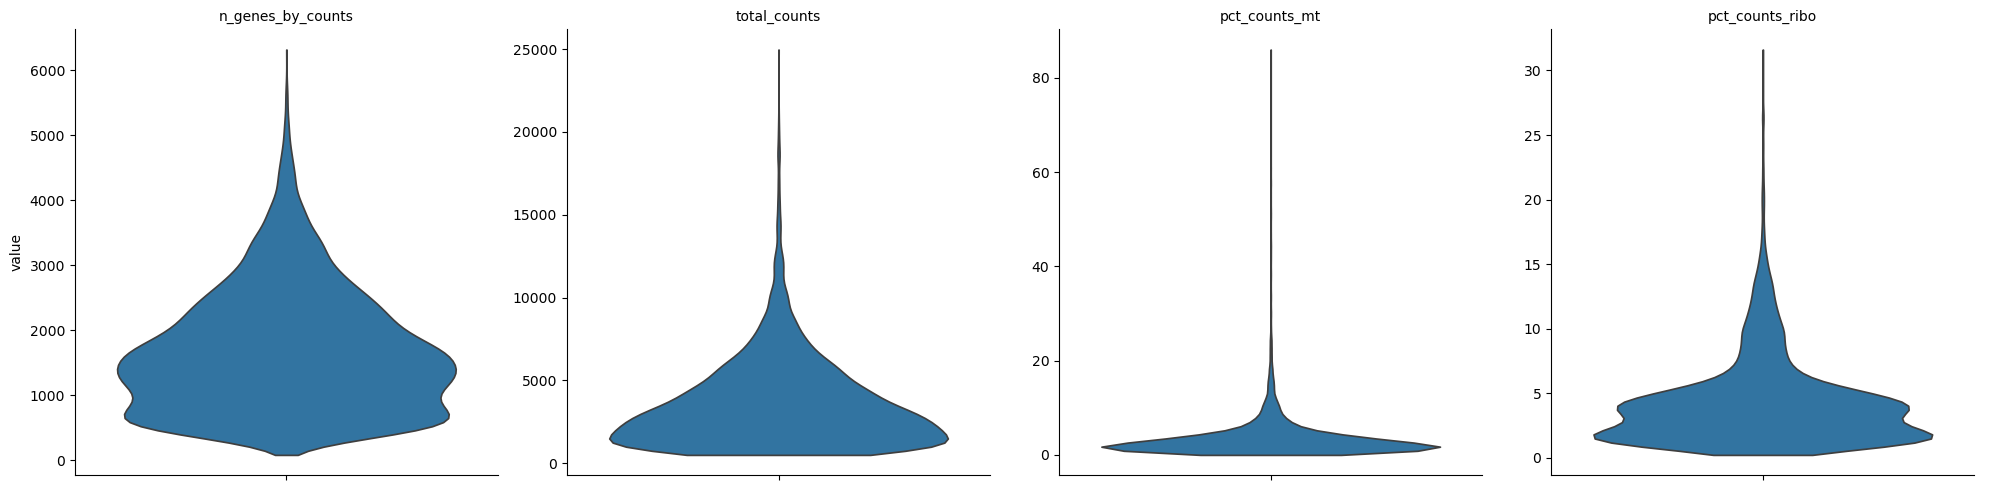

In [277]:
sc.pl.violin(
    adata_batch7,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

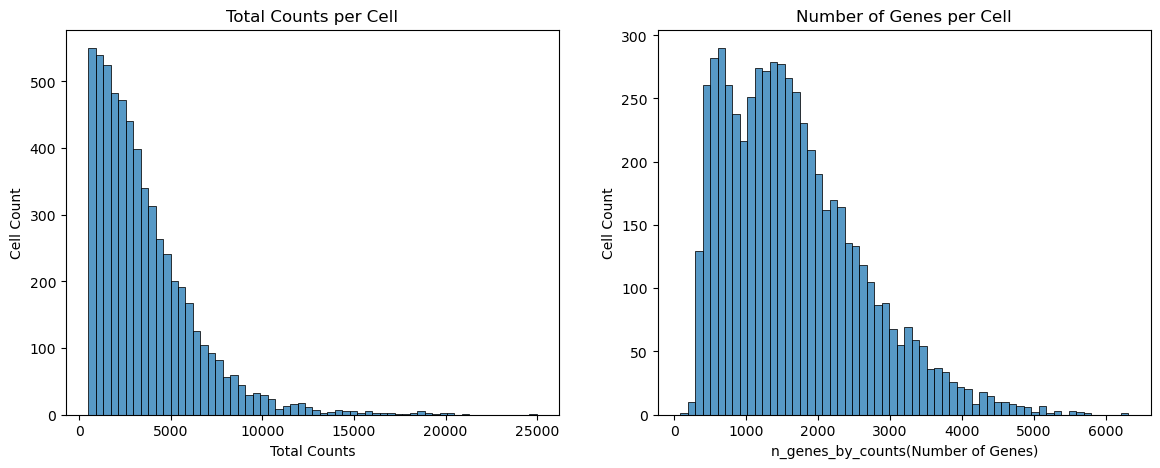

In [278]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch7.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch7.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

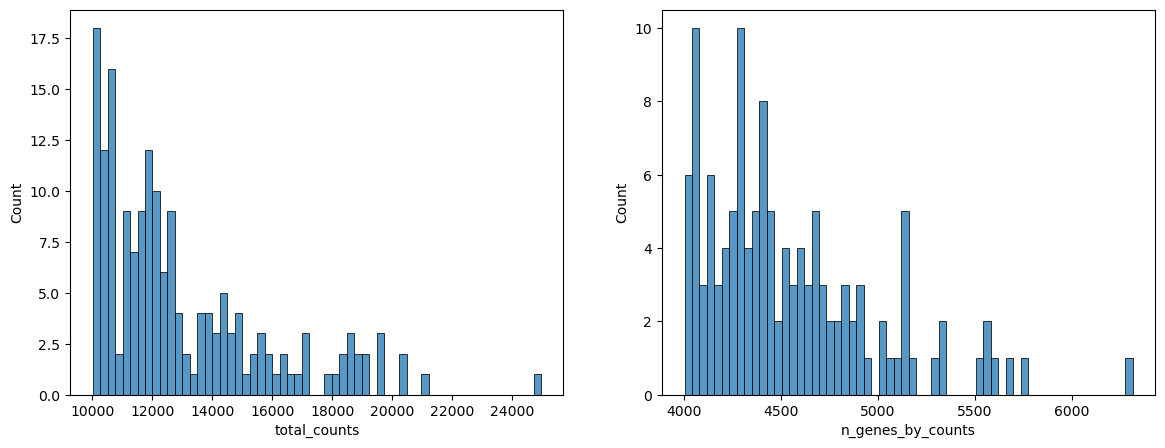

In [279]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch7.obs['total_counts'][adata_batch7.obs['total_counts'] > 10000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch7.obs['n_genes_by_counts'][adata_batch7.obs['n_genes_by_counts'] > 4000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

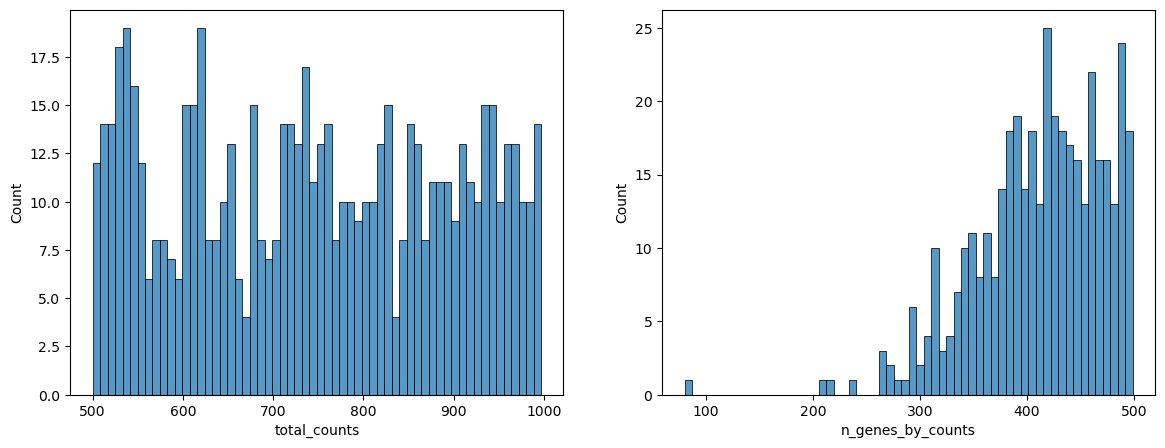

In [280]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch7.obs['total_counts'][adata_batch7.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch7.obs['n_genes_by_counts'][adata_batch7.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

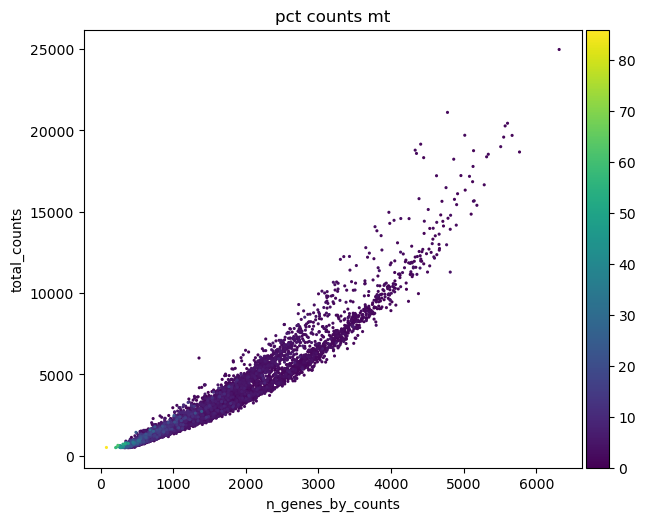

In [281]:
sc.pl.scatter(adata_batch7, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [282]:
print('Total number of cells: {:d}'.format(adata_batch7.n_obs))
# print('')
sc.pp.filter_cells(adata_batch7, max_counts=12000)
print('Number of cells after max count filter: {:d}'.format(adata_batch4.n_obs))
print('')
sc.pp.filter_cells(adata_batch7, max_genes=5000)
sc.pp.filter_cells(adata_batch7, min_genes=300)
print('Number of cells after gene filter: {:d}'.format(adata_batch4.n_obs))

adata_batch7 = adata_batch7[adata_batch7.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch4.n_obs))

Total number of cells: 5937
filtered out 89 cells that have more than 12000 counts
Number of cells after max count filter: 4761

filtered out 18 cells that have less than 300 genes expressed
Number of cells after gene filter: 4761
Number of cells after MT filter: 4761


In [283]:
print('Total number of genes: {:d}'.format(adata_batch7.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch7, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch7.n_vars))

Total number of genes: 33989
filtered out 15810 genes that are detected in less than 5 cells
Number of genes after cell filter: 18179


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [284]:
sc.pp.calculate_qc_metrics(adata_batch7, qc_vars=['mt', 'ribo'], inplace=True)

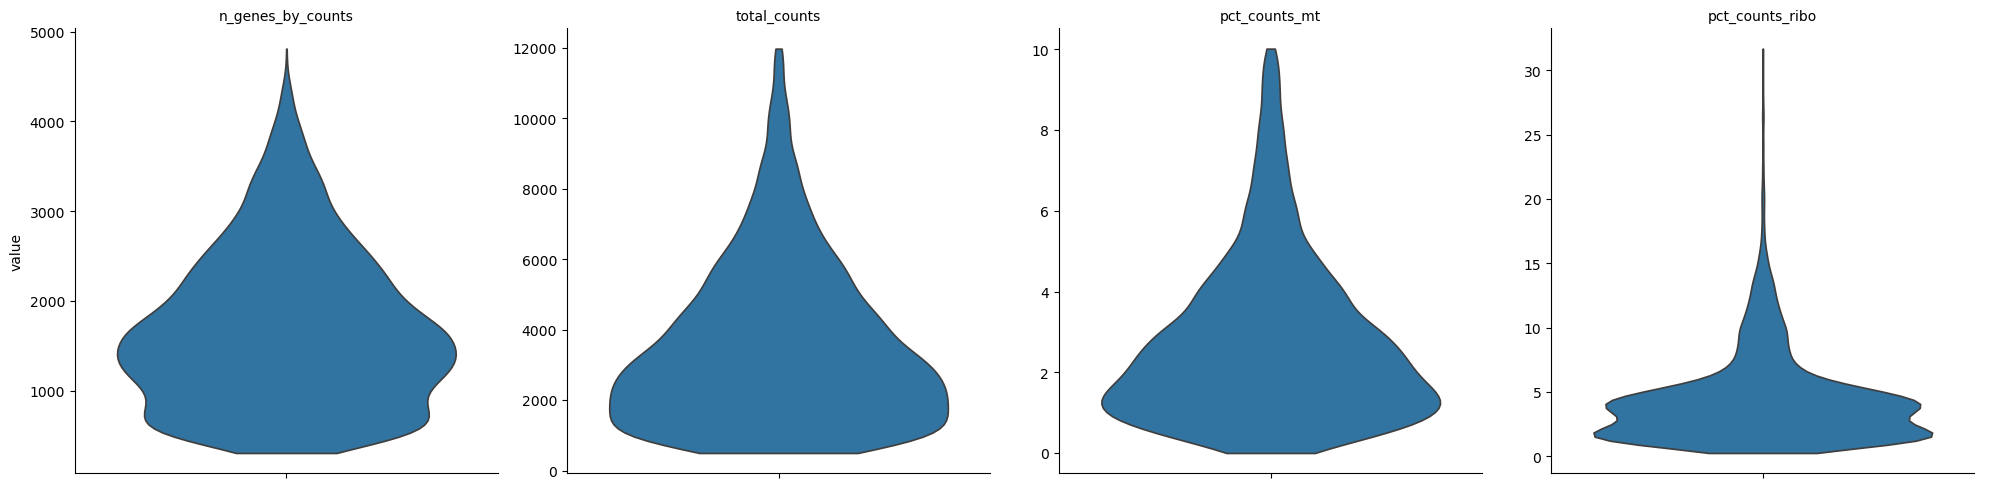

In [285]:
sc.pl.violin(
    adata_batch7,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [286]:
adata_batch7

AnnData object with n_obs × n_vars = 5519 × 18179
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch8

In [287]:
# batch8
batch8_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch8_result/filtered_feature_bc_matrix")
batch8_name = "batch3\8"

adata_batch8 = sc.read_10x_mtx(
    batch8_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch8.obs['batches'] = 'batch8'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [288]:
adata_batch8

AnnData object with n_obs × n_vars = 5745 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [289]:
# add in Hashtag labels into .obs
feature8_path = os.path.join(batch8_path, 'features.tsv.gz')
if not os.path.exists(feature8_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features8 = pd.read_csv(feature8_path, sep='\t', header=None)
features8.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features8['feature_type'].str.contains('Antibody Capture', case=False) | \
           features8['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features8.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch8.var_names]

print(f"Hashtags found in {batch8_name}: {HTO_tags}")

if HTO_tags:
    adata_batch8.obs[HTO_tags] = pd.DataFrame(adata_batch8[:, HTO_tags].X.toarray(), index=adata_batch8.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch8, cell_hashing_columns=HTO_tags)
    adata_batch8 = adata_batch8[:, ~adata_batch8.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch8.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch8.obs["Classification"] = "Unknown"

Hashtags found in batch3\8: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [290]:
adata_batch8

AnnData object with n_obs × n_vars = 5745 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [291]:
adata_batch8.obs['Classification'].value_counts()

Classification
Hashtag_2    2196
Hashtag_4    1886
Doublet       887
Hashtag_1     407
Hashtag_3     369
Name: count, dtype: int64

In [292]:
print(adata_batch8.obs_names.is_unique) 
print(adata_batch8.var_names.is_unique) 

True
True


In [293]:
# count hashtage percentage
classification_a8 = adata_batch8.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a8.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 38.22%
Hashtag_4: 32.83%
Doublet: 15.44%
Hashtag_1: 7.08%
Hashtag_3: 6.42%


In [294]:
# delete doublets
adata_batch8 = adata_batch8[adata_batch8.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch8.shape}")

Cells retained: (4858, 33989)


In [295]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch8.obs[key] = adata_batch8.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [296]:
print(adata_batch8.obs['genotype'].value_counts())
print(adata_batch8.obs['treatment'].value_counts())
print(adata_batch8.obs['gender'].value_counts())
print(adata_batch8.obs['brain_region'].value_counts())

genotype
WT    4858
Name: count, dtype: int64
treatment
Vehicle    4858
Name: count, dtype: int64
gender
Male    4858
Name: count, dtype: int64
brain_region
RSC    4082
HP      776
Name: count, dtype: int64


In [297]:
# create 'geno_treat' column : like WT_LPS
adata_batch8.obs["geno_treat"] = adata_batch8.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch8.obs["geno_treat_sex"] = adata_batch8.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [298]:
adata_batch8.var['ribo'] = adata_batch8.var_names.str.startswith('Rps') | adata_batch8.var_names.str.startswith('Rpl')
adata_batch8.var['mt'] = adata_batch8.var_names.str.startswith('mt-')

In [299]:
sc.pp.calculate_qc_metrics(adata_batch8, qc_vars=['mt', 'ribo'], inplace=True)

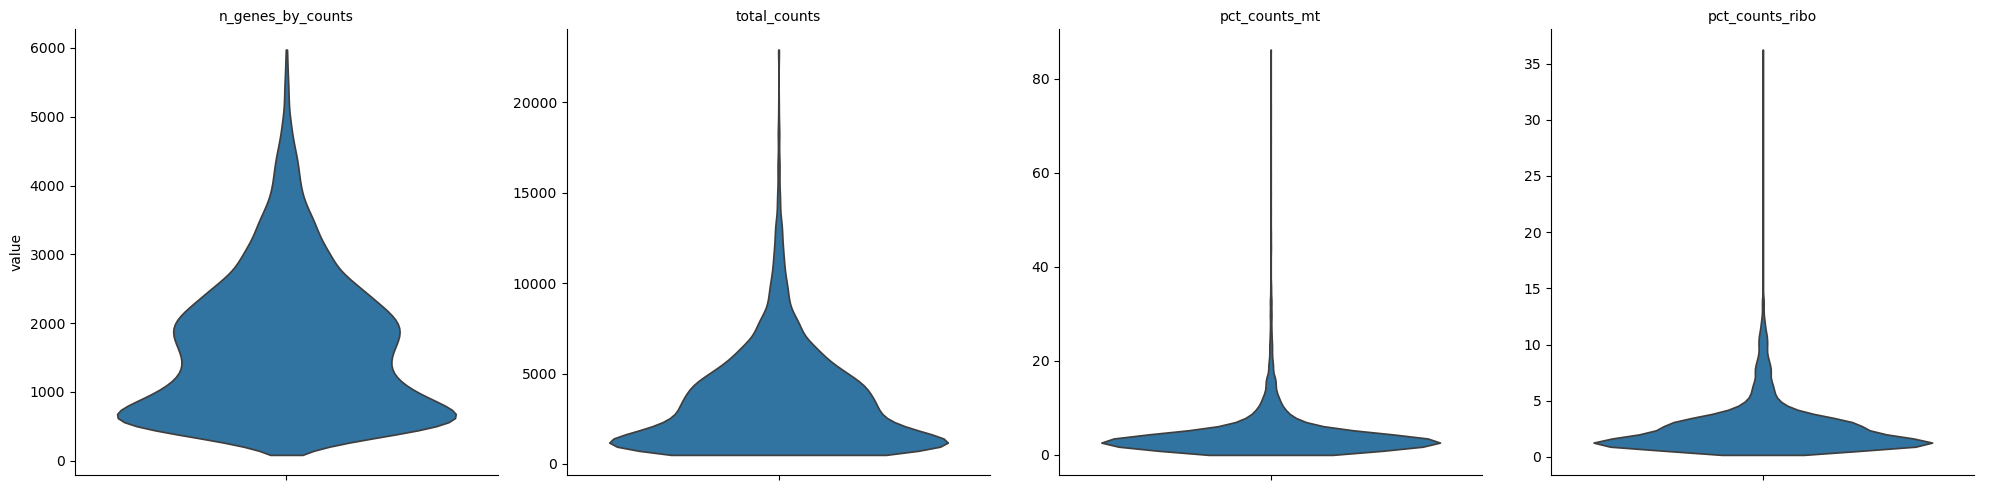

In [300]:
sc.pl.violin(
    adata_batch8,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

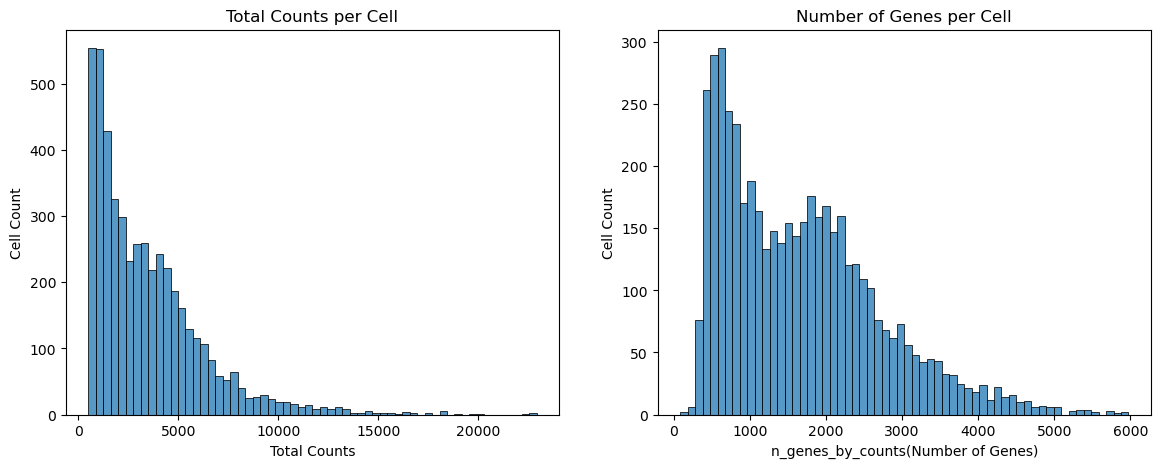

In [301]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch8.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch8.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

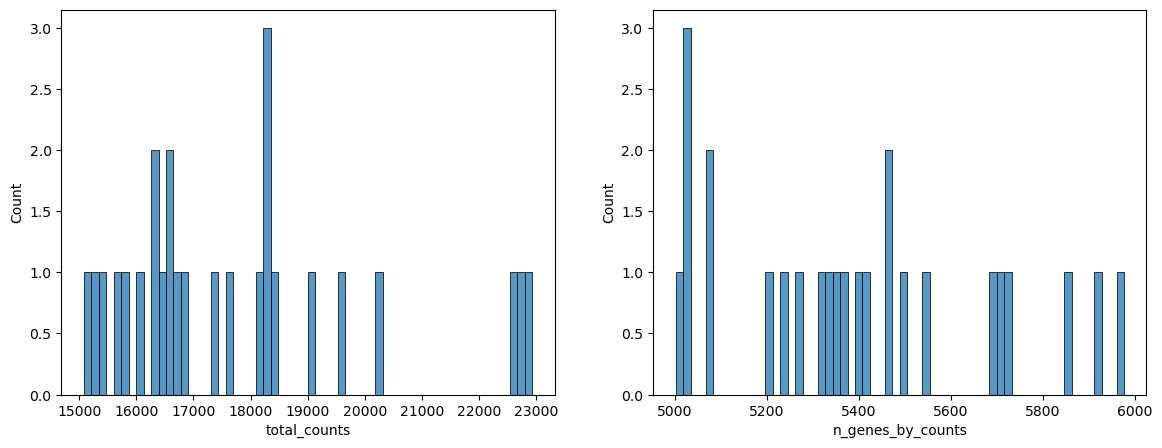

In [302]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch8.obs['total_counts'][adata_batch8.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch8.obs['n_genes_by_counts'][adata_batch8.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

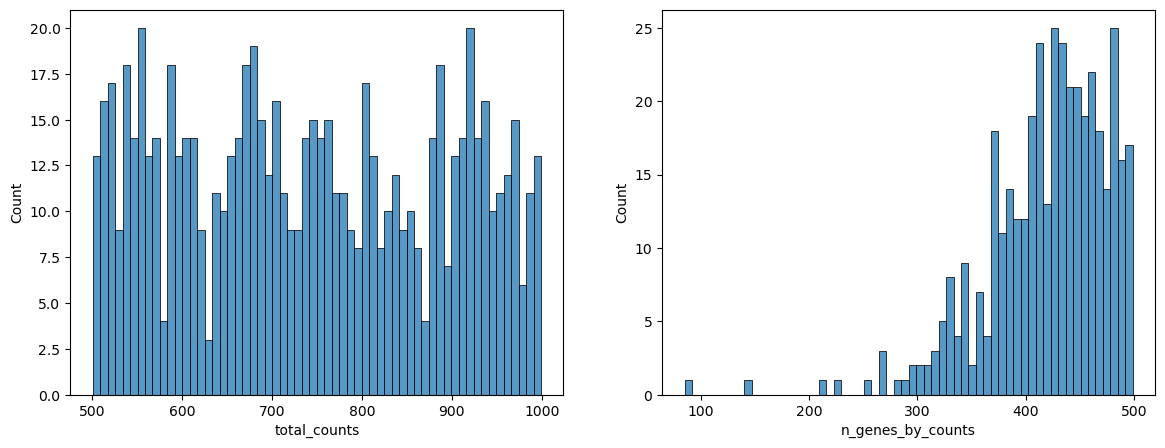

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch8.obs['total_counts'][adata_batch8.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch8.obs['n_genes_by_counts'][adata_batch8.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

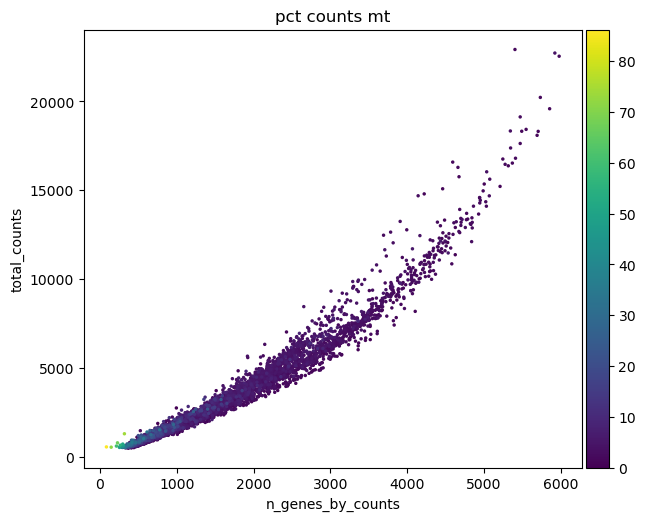

In [304]:
sc.pl.scatter(adata_batch8, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [305]:
print('Total number of cells: {:d}'.format(adata_batch8.n_obs))
# print('')
sc.pp.filter_cells(adata_batch8, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch8.n_obs))
print('')
sc.pp.filter_cells(adata_batch8, max_genes=5000)
sc.pp.filter_cells(adata_batch8, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch8.n_obs))

adata_batch8 = adata_batch8[adata_batch8.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch8.n_obs))

Total number of cells: 4858
filtered out 26 cells that have more than 15000 counts
Number of cells after max count filter: 4832

filtered out 3 cells that have more than 5000 genes expressed
filtered out 46 cells that have less than 350 genes expressed
Number of cells after gene filter: 4783
Number of cells after MT filter: 4464


In [306]:
print('Total number of genes: {:d}'.format(adata_batch8.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch8, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch8.n_vars))

Total number of genes: 33989
filtered out 15532 genes that are detected in less than 5 cells
Number of genes after cell filter: 18457


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [307]:
sc.pp.calculate_qc_metrics(adata_batch8, qc_vars=['mt', 'ribo'], inplace=True)

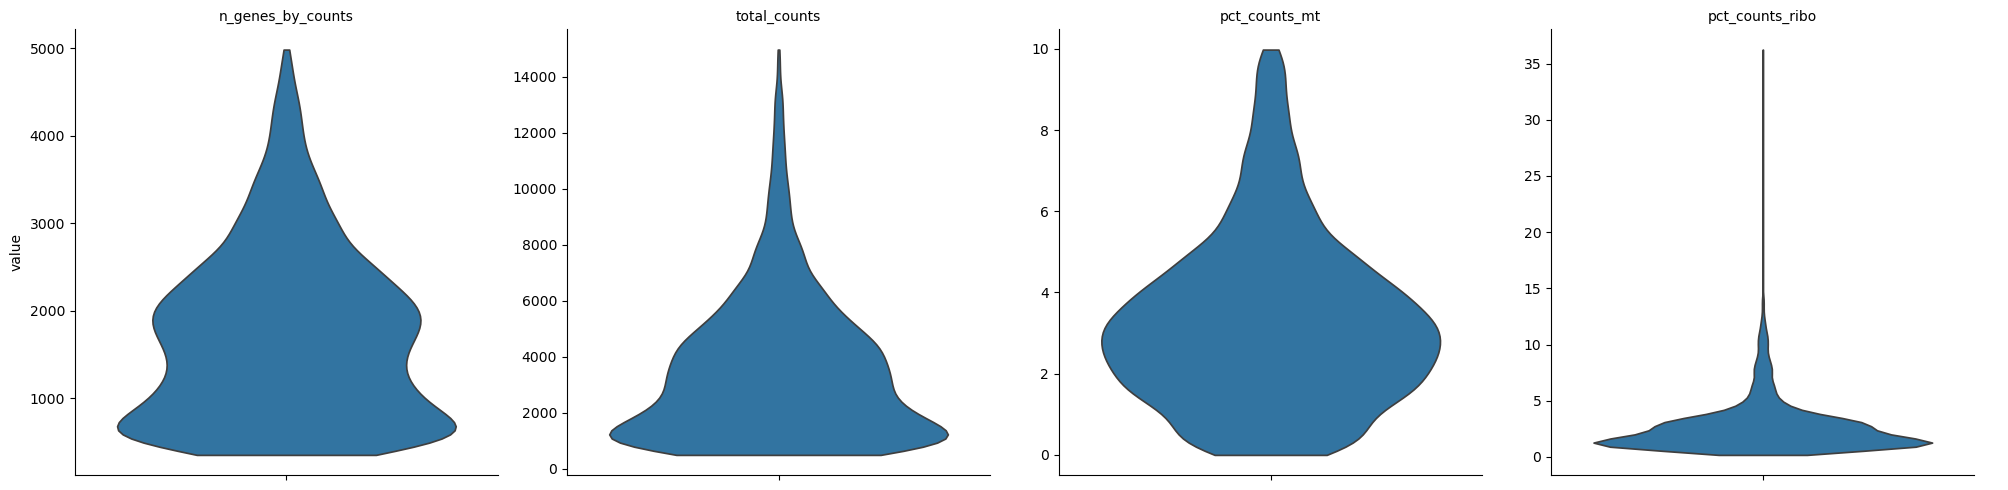

In [308]:
sc.pl.violin(
    adata_batch8,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [309]:
adata_batch8

AnnData object with n_obs × n_vars = 4464 × 18457
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch9

In [310]:
# batch1
batch9_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch9_result/filtered_feature_bc_matrix")
batch9_name = "batch9"

adata_batch9 = sc.read_10x_mtx(
    batch9_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch9.obs['batches'] = 'batch9'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [311]:
adata_batch9

AnnData object with n_obs × n_vars = 5544 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [312]:
# add in Hashtag labels into .obs
feature9_path = os.path.join(batch9_path, 'features.tsv.gz')
if not os.path.exists(feature9_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features9 = pd.read_csv(feature9_path, sep='\t', header=None)
features9.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features9['feature_type'].str.contains('Antibody Capture', case=False) | \
           features9['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features9.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch9.var_names]

print(f"Hashtags found in {batch3_name}: {HTO_tags}")

if HTO_tags:
    adata_batch9.obs[HTO_tags] = pd.DataFrame(adata_batch9[:, HTO_tags].X.toarray(), index=adata_batch9.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch9, cell_hashing_columns=HTO_tags)
    adata_batch9 = adata_batch9[:, ~adata_batch9.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch9.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch9.obs["Classification"] = "Unknown"

Hashtags found in batch3: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [313]:
adata_batch9

AnnData object with n_obs × n_vars = 5544 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [314]:
adata_batch9.obs['Classification'].value_counts()

Classification
Hashtag_2    2730
Hashtag_4    1415
Doublet       917
Hashtag_1     361
Hashtag_3     121
Name: count, dtype: int64

In [315]:
print(adata_batch9.obs_names.is_unique) 
print(adata_batch9.var_names.is_unique) 

True
True


In [316]:
# count hashtage percentage
classification_a9 = adata_batch9.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a9.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 49.24%
Hashtag_4: 25.52%
Doublet: 16.54%
Hashtag_1: 6.51%
Hashtag_3: 2.18%


In [317]:
# delete doublets
adata_batch9 = adata_batch9[adata_batch9.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch9.shape}")

Cells retained: (4627, 33989)


In [318]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch9.obs[key] = adata_batch9.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [319]:
adata_batch9

AnnData object with n_obs × n_vars = 4627 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [320]:
print(adata_batch9.obs['genotype'].value_counts())
print(adata_batch9.obs['treatment'].value_counts())
print(adata_batch9.obs['gender'].value_counts())
print(adata_batch9.obs['brain_region'].value_counts())

genotype
5XFAD    4627
Name: count, dtype: int64
treatment
LPS    4627
Name: count, dtype: int64
gender
Male    4627
Name: count, dtype: int64
brain_region
RSC    4145
HP      482
Name: count, dtype: int64


In [321]:
# create 'geno_treat' column : like WT_LPS
adata_batch9.obs["geno_treat"] = adata_batch9.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch9.obs["geno_treat_sex"] = adata_batch9.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [322]:
adata_batch9.var['ribo'] = adata_batch9.var_names.str.startswith('Rps') | adata_batch9.var_names.str.startswith('Rpl')
adata_batch9.var['mt'] = adata_batch9.var_names.str.startswith('mt-')

In [323]:
sc.pp.calculate_qc_metrics(adata_batch9, qc_vars=['mt', 'ribo'], inplace=True)

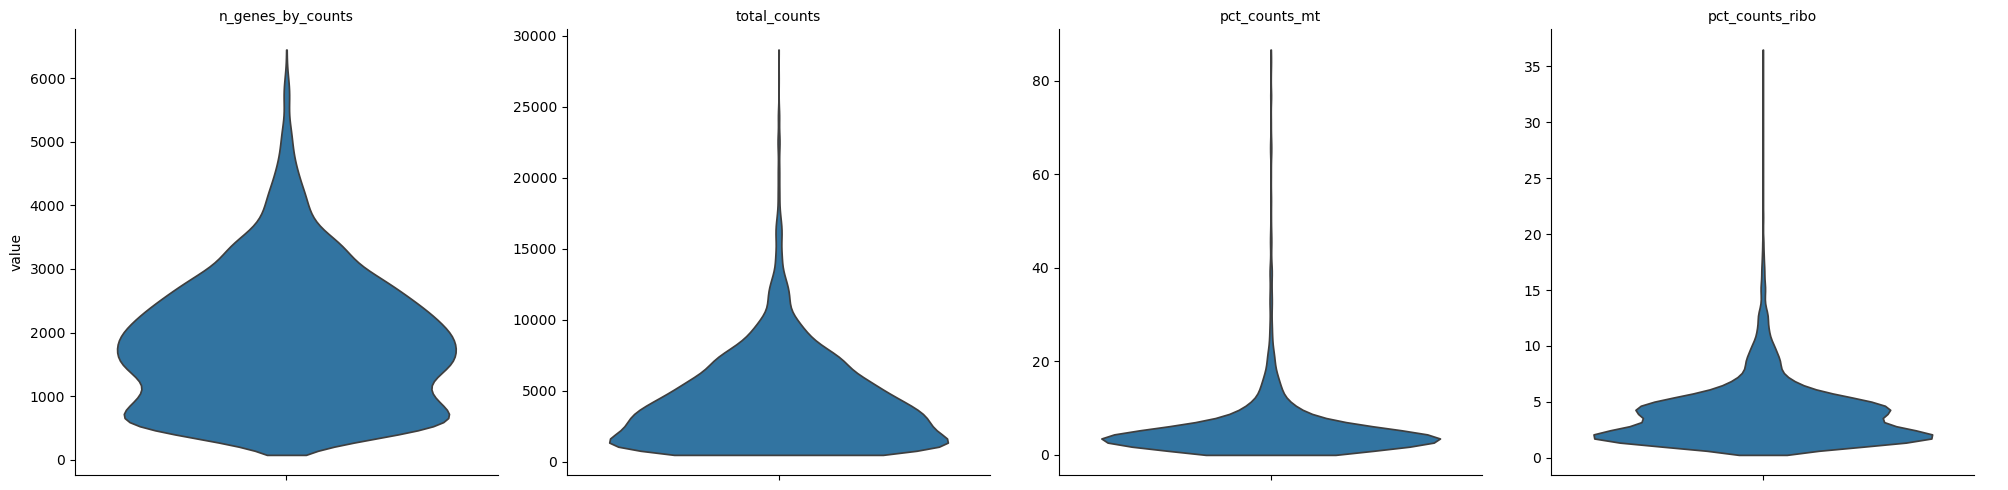

In [324]:
sc.pl.violin(
    adata_batch9,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

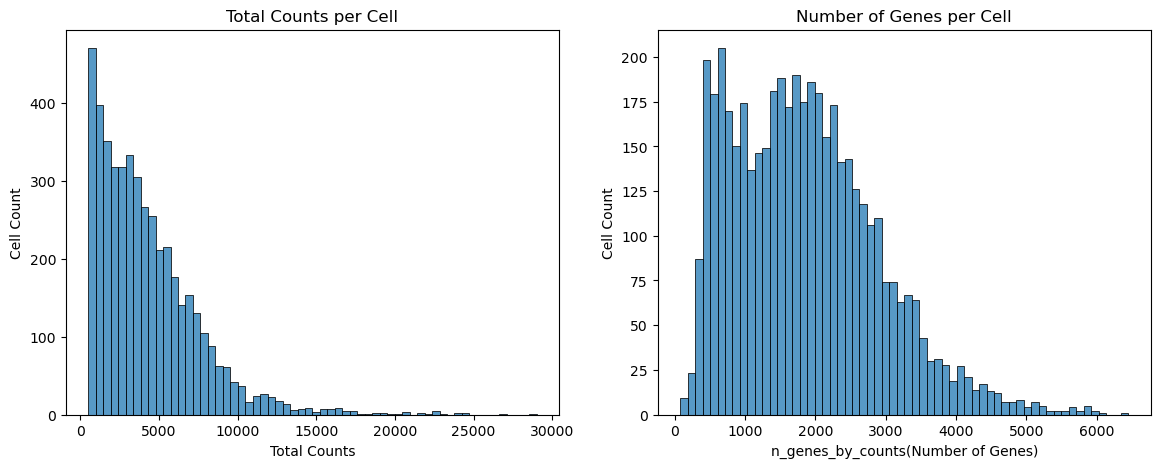

In [325]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch9.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch9.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

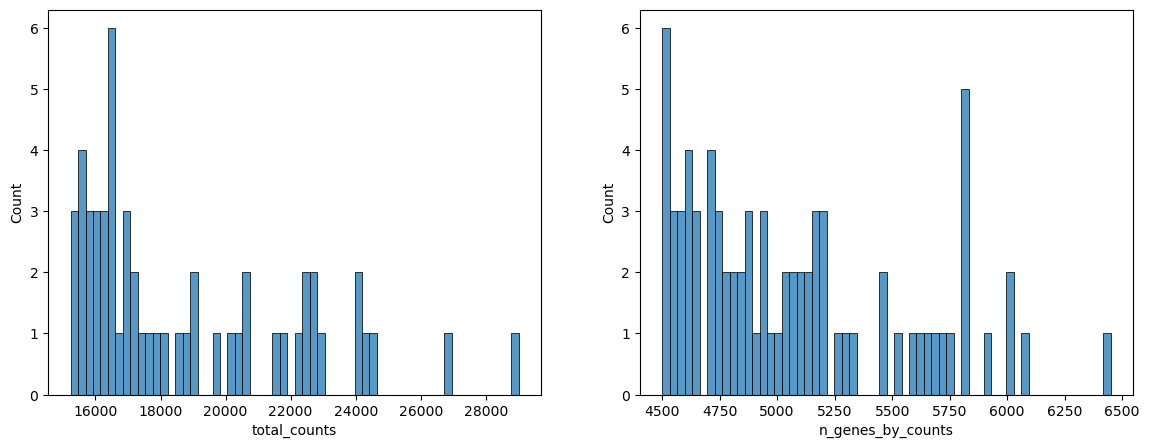

In [326]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch9.obs['total_counts'][adata_batch9.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch9.obs['n_genes_by_counts'][adata_batch9.obs['n_genes_by_counts'] > 4500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

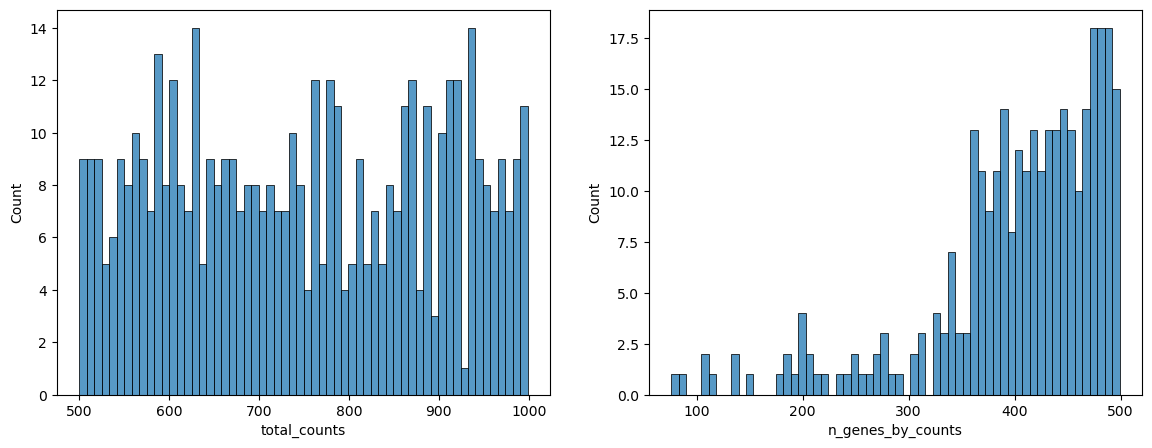

In [327]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch9.obs['total_counts'][adata_batch9.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch9.obs['n_genes_by_counts'][adata_batch9.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

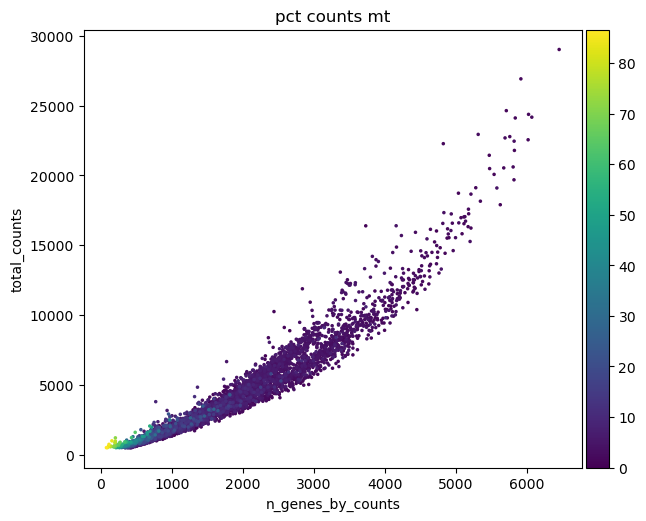

In [328]:
sc.pl.scatter(adata_batch9, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [329]:
print('Total number of cells: {:d}'.format(adata_batch9.n_obs))
# print('')
sc.pp.filter_cells(adata_batch9, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch9.n_obs))
print('')
sc.pp.filter_cells(adata_batch9, max_genes=5000)
sc.pp.filter_cells(adata_batch9, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch9.n_obs))

adata_batch9 = adata_batch9[adata_batch9.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch9.n_obs))

Total number of cells: 4627
filtered out 55 cells that have more than 15000 counts
Number of cells after max count filter: 4572

filtered out 54 cells that have less than 350 genes expressed
Number of cells after gene filter: 4518
Number of cells after MT filter: 4018


In [330]:
print('Total number of genes: {:d}'.format(adata_batch9.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch9, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch9.n_vars))

Total number of genes: 33989
filtered out 15931 genes that are detected in less than 5 cells
Number of genes after cell filter: 18058


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [331]:
sc.pp.calculate_qc_metrics(adata_batch9, qc_vars=['mt', 'ribo'], inplace=True)

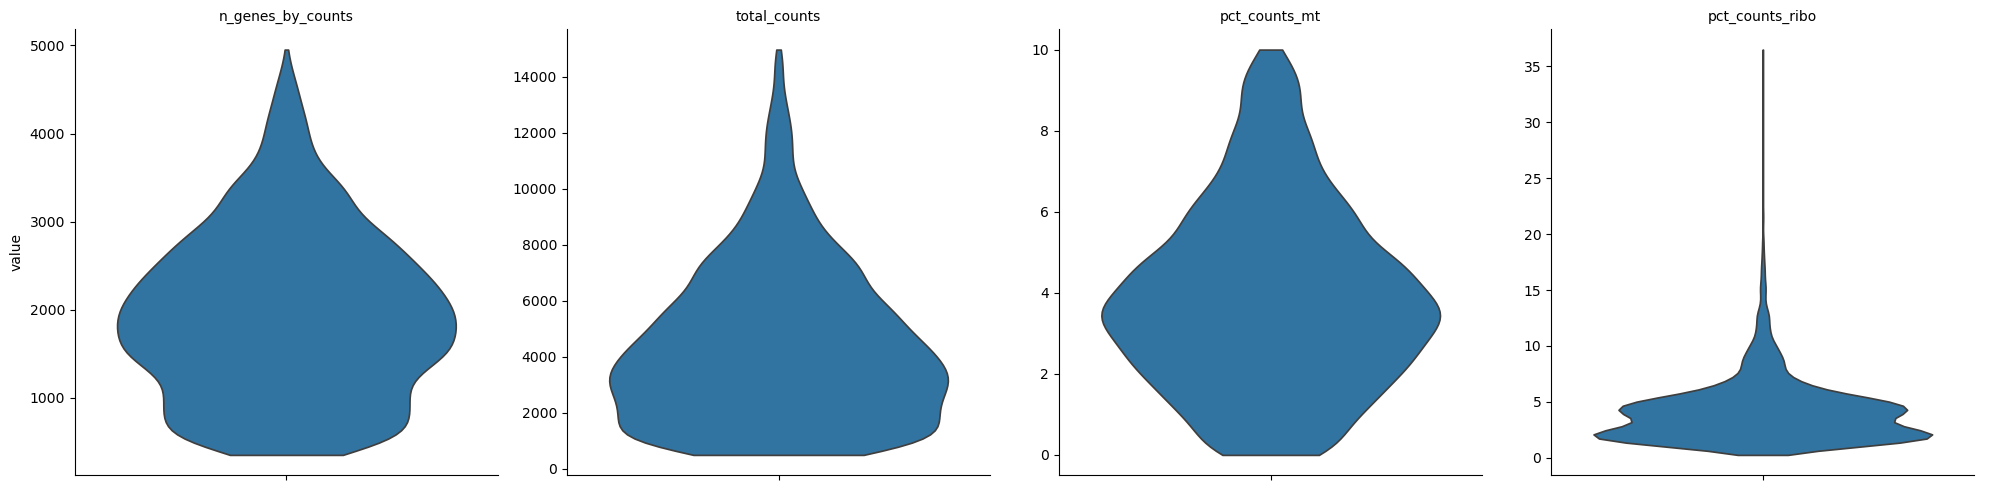

In [332]:
sc.pl.violin(
    adata_batch9,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [333]:
adata_batch9

AnnData object with n_obs × n_vars = 4018 × 18058
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch10

In [334]:
# batch1
batch10_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch10_result/filtered_feature_bc_matrix")
batch10_name = "batch10"

adata_batch10 = sc.read_10x_mtx(
    batch10_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch10.obs['batches'] = 'batch10'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [335]:
adata_batch10

AnnData object with n_obs × n_vars = 5754 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [336]:
# add in Hashtag labels into .obs
feature10_path = os.path.join(batch10_path, 'features.tsv.gz')
if not os.path.exists(feature10_path):
    raise FileNotFoundError(f"Features file not found for {batch3_name}")

features10 = pd.read_csv(feature10_path, sep='\t', header=None)
features10.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features10['feature_type'].str.contains('Antibody Capture', case=False) | \
           features10['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features10.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch10.var_names]

print(f"Hashtags found in {batch10_name}: {HTO_tags}")

if HTO_tags:
    adata_batch10.obs[HTO_tags] = pd.DataFrame(adata_batch10[:, HTO_tags].X.toarray(), index=adata_batch10.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch10, cell_hashing_columns=HTO_tags)
    adata_batch10 = adata_batch10[:, ~adata_batch10.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch10.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch10.obs["Classification"] = "Unknown"

Hashtags found in batch10: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [337]:
adata_batch10

AnnData object with n_obs × n_vars = 5754 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [338]:
adata_batch10.obs['Classification'].value_counts()

Classification
Hashtag_2    3119
Hashtag_1    1028
Hashtag_4     988
Doublet       462
Hashtag_3     157
Name: count, dtype: int64

In [339]:
print(adata_batch10.obs_names.is_unique) 
print(adata_batch10.var_names.is_unique) 

True
True


In [340]:
# count hashtage percentage
classification_a10 = adata_batch10.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a10.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 54.21%
Hashtag_1: 17.87%
Hashtag_4: 17.17%
Doublet: 8.03%
Hashtag_3: 2.73%


In [341]:
# delete doublets
adata_batch10 = adata_batch10[adata_batch10.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch10.shape}")

Cells retained: (5292, 33989)


In [342]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch10.obs[key] = adata_batch10.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [343]:
adata_batch10

AnnData object with n_obs × n_vars = 5292 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [344]:
print(adata_batch10.obs['genotype'].value_counts())
print(adata_batch10.obs['treatment'].value_counts())
print(adata_batch10.obs['gender'].value_counts())
print(adata_batch10.obs['brain_region'].value_counts())

genotype
5XFAD    5292
Name: count, dtype: int64
treatment
LPS    5292
Name: count, dtype: int64
gender
Female    5292
Name: count, dtype: int64
brain_region
RSC    4107
HP     1185
Name: count, dtype: int64


In [345]:
# create 'geno_treat' column : like WT_LPS
adata_batch10.obs["geno_treat"] = adata_batch10.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch10.obs["geno_treat_sex"] = adata_batch10.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [346]:
adata_batch10.var['ribo'] = adata_batch10.var_names.str.startswith('Rps') | adata_batch10.var_names.str.startswith('Rpl')
adata_batch10.var['mt'] = adata_batch10.var_names.str.startswith('mt-')

In [347]:
sc.pp.calculate_qc_metrics(adata_batch10, qc_vars=['mt', 'ribo'], inplace=True)

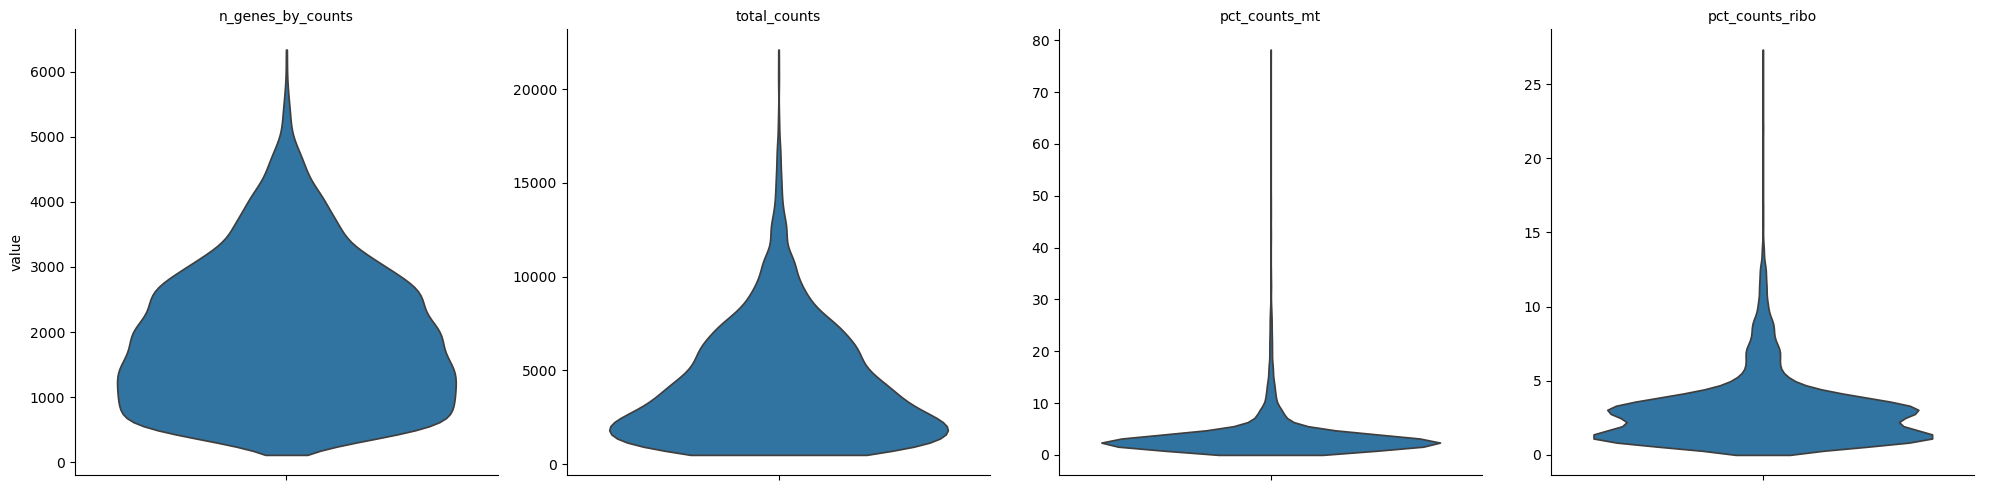

In [348]:
sc.pl.violin(
    adata_batch10,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

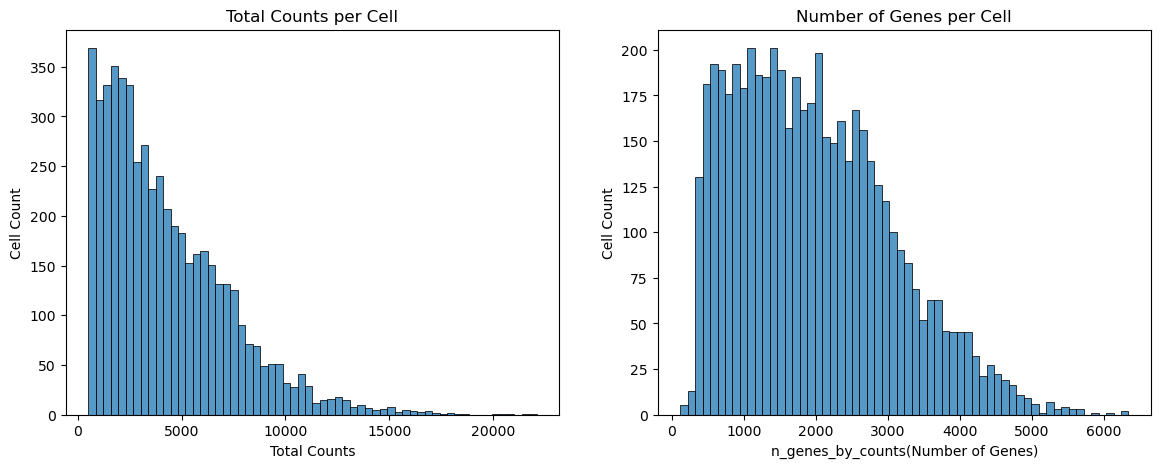

In [349]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch10.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch10.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

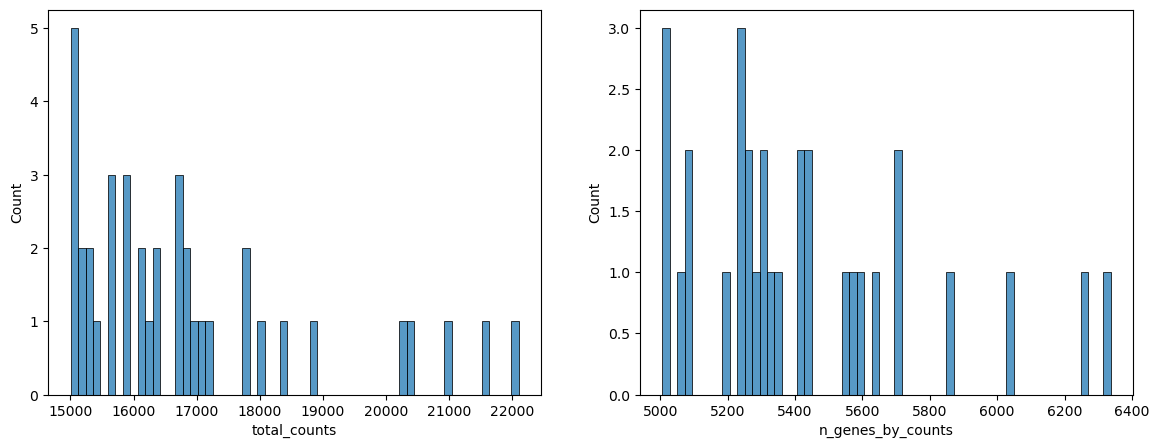

In [350]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch10.obs['total_counts'][adata_batch10.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch10.obs['n_genes_by_counts'][adata_batch10.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

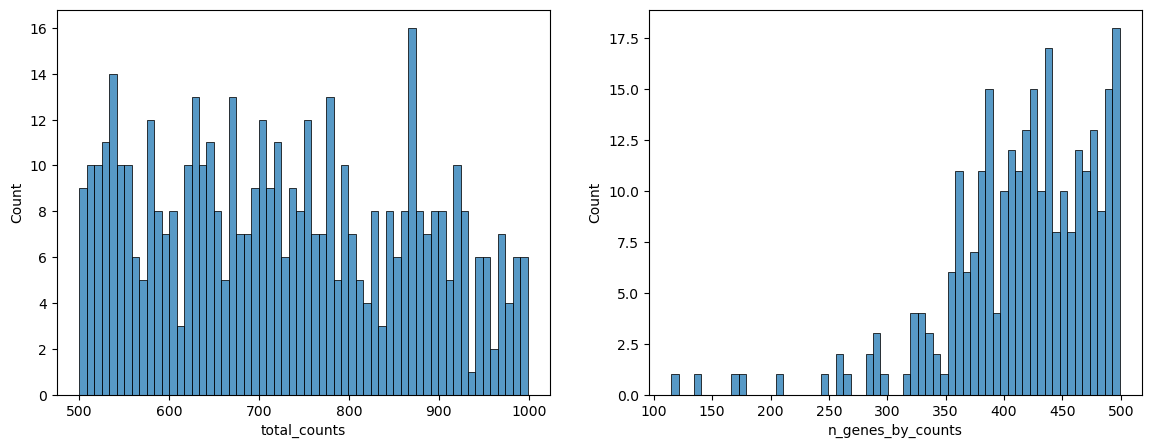

In [351]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch10.obs['total_counts'][adata_batch10.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch10.obs['n_genes_by_counts'][adata_batch10.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

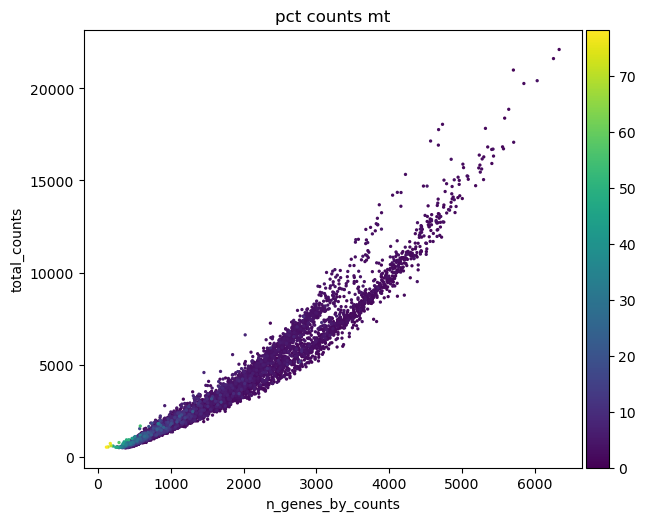

In [352]:
sc.pl.scatter(adata_batch10, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [353]:
print('Total number of cells: {:d}'.format(adata_batch10.n_obs))
# print('')
sc.pp.filter_cells(adata_batch10, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch10.n_obs))
print('')
sc.pp.filter_cells(adata_batch10, max_genes=5000)
sc.pp.filter_cells(adata_batch1, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch10.n_obs))

adata_batch10 = adata_batch10[adata_batch10.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['adata_batch10'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch10.n_obs))

Total number of cells: 5292
filtered out 39 cells that have more than 15000 counts
Number of cells after max count filter: 5253

filtered out 2 cells that have more than 5000 genes expressed
Number of cells after gene filter: 5251
Number of cells after MT filter: 4958


In [354]:
print('Total number of genes: {:d}'.format(adata_batch10.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch10, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch10.n_vars))

Total number of genes: 33989
filtered out 15480 genes that are detected in less than 5 cells
Number of genes after cell filter: 18509


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [355]:
sc.pp.calculate_qc_metrics(adata_batch10, qc_vars=['mt', 'ribo'], inplace=True)

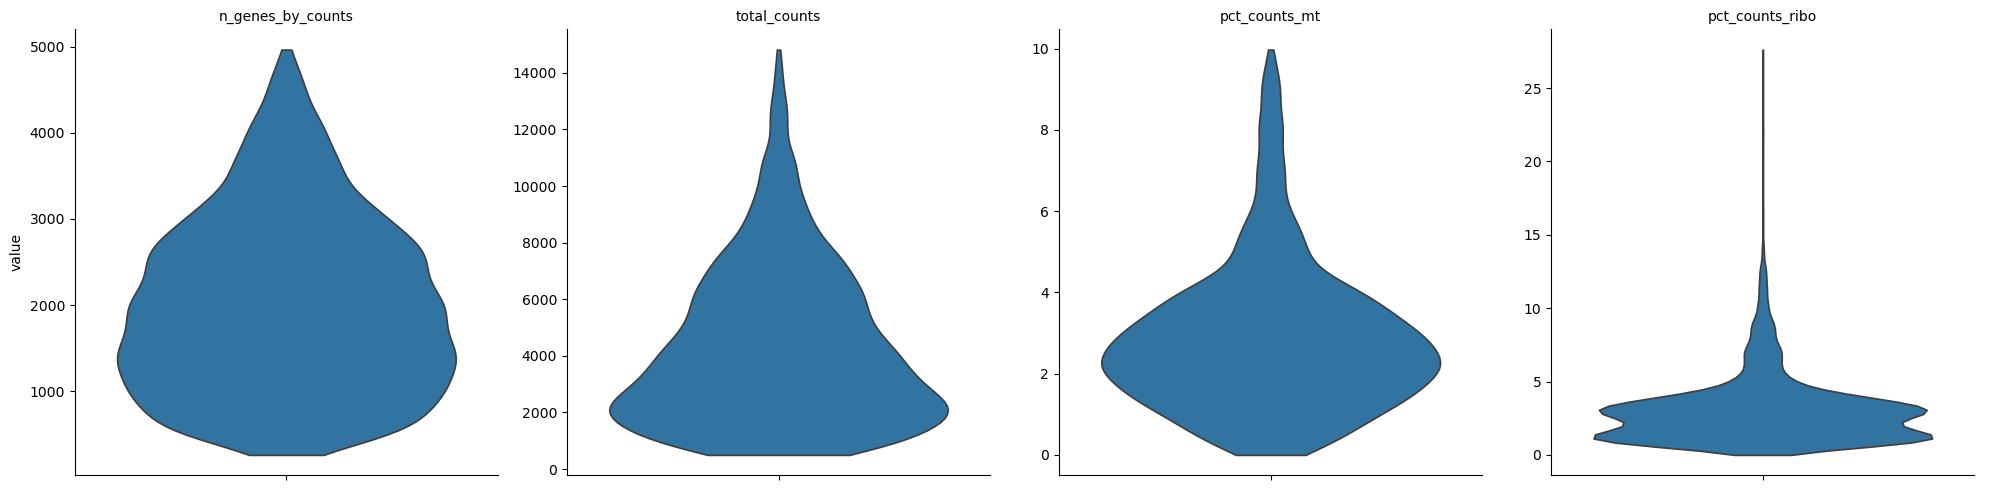

In [356]:
sc.pl.violin(
    adata_batch10,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [357]:
adata_batch10

AnnData object with n_obs × n_vars = 4958 × 18509
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch11

In [364]:
# batch11
batch11_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch11_result/filtered_feature_bc_matrix")
batch11_name = "batch11"

adata_batch11 = sc.read_10x_mtx(
    batch11_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch11.obs['batches'] = 'batch11'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [365]:
adata_batch11

AnnData object with n_obs × n_vars = 5738 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [366]:
# add in Hashtag labels into .obs
feature11_path = os.path.join(batch11_path, 'features.tsv.gz')
if not os.path.exists(feature11_path):
    raise FileNotFoundError(f"Features file not found for {batch11_name}")

features11 = pd.read_csv(feature11_path, sep='\t', header=None)
features11.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features11['feature_type'].str.contains('Antibody Capture', case=False) | \
           features11['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags = features11.loc[hto_mask, 'gene_name'].tolist()
HTO_tags = [gene for gene in HTO_tags if gene in adata_batch11.var_names]

print(f"Hashtags found in {batch11_name}: {HTO_tags}")

if HTO_tags:
    adata_batch11.obs[HTO_tags] = pd.DataFrame(adata_batch11[:, HTO_tags].X.toarray(), index=adata_batch11.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch11, cell_hashing_columns=HTO_tags)
    adata_batch11 = adata_batch11[:, ~adata_batch11.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch11.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch11.obs["Classification"] = "Unknown"

Hashtags found in batch11: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [367]:
adata_batch11

AnnData object with n_obs × n_vars = 5738 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [368]:
adata_batch11.obs['Classification'].value_counts()

Classification
Hashtag_1    3492
Hashtag_2     793
Doublet       585
Hashtag_4     503
Hashtag_3     365
Name: count, dtype: int64

In [369]:
print(adata_batch11.obs_names.is_unique) 
print(adata_batch11.var_names.is_unique) 

True
True


In [370]:
# count hashtage percentage
classification_a11 = adata_batch11.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a11.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_1: 60.86%
Hashtag_2: 13.82%
Doublet: 10.20%
Hashtag_4: 8.77%
Hashtag_3: 6.36%


In [371]:
# delete doublets
adata_batch11 = adata_batch11[adata_batch11.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch11.shape}")

Cells retained: (5153, 33989)


In [372]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch11.obs[key] = adata_batch11.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [373]:
adata_batch11

AnnData object with n_obs × n_vars = 5153 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [374]:
print(adata_batch11.obs['genotype'].value_counts())
print(adata_batch11.obs['treatment'].value_counts())
print(adata_batch11.obs['gender'].value_counts())
print(adata_batch11.obs['brain_region'].value_counts())

genotype
WT    5153
Name: count, dtype: int64
treatment
LPS    5153
Name: count, dtype: int64
gender
Female    5153
Name: count, dtype: int64
brain_region
HP     3857
RSC    1296
Name: count, dtype: int64


In [375]:
# create 'geno_treat' column : like WT_LPS
adata_batch11.obs["geno_treat"] = adata_batch11.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch11.obs["geno_treat_sex"] = adata_batch11.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [376]:
adata_batch11.var['ribo'] = adata_batch11.var_names.str.startswith('Rps') | adata_batch11.var_names.str.startswith('Rpl')
adata_batch11.var['mt'] = adata_batch11.var_names.str.startswith('mt-')

In [377]:
sc.pp.calculate_qc_metrics(adata_batch11, qc_vars=['mt', 'ribo'], inplace=True)

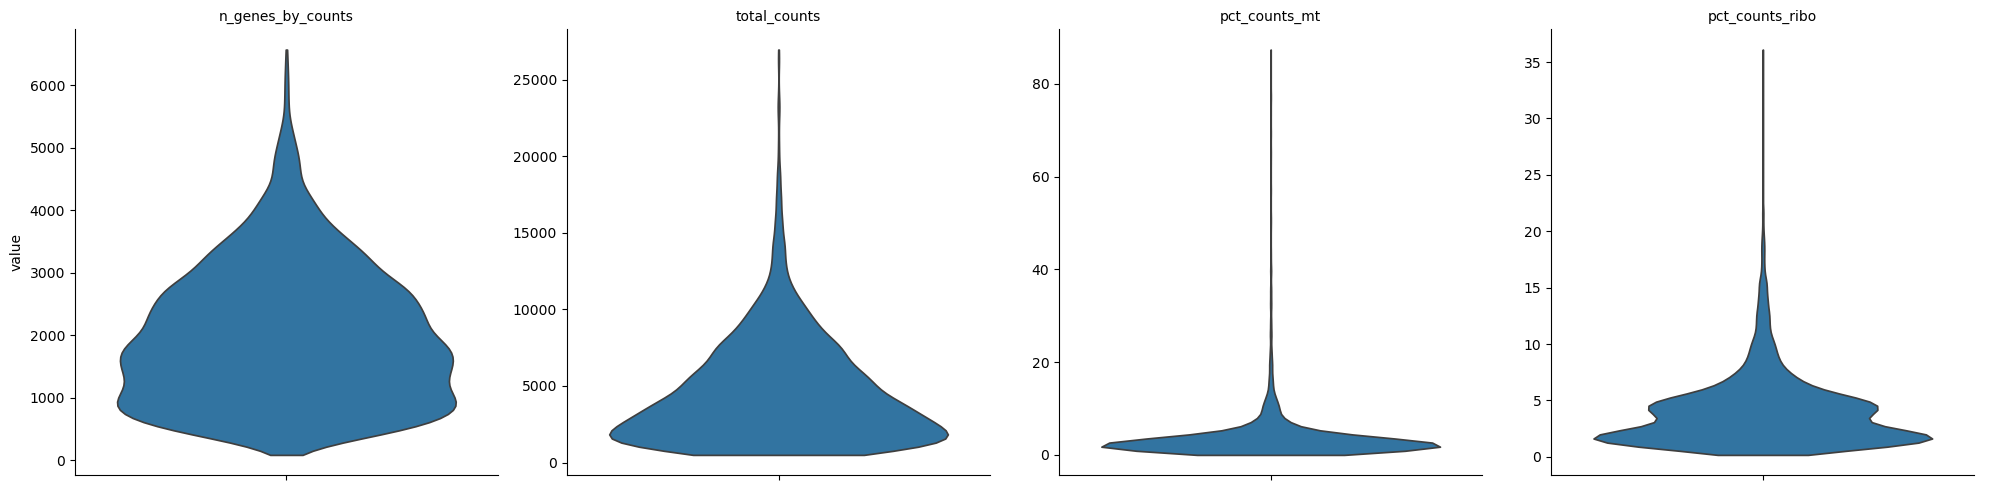

In [378]:
sc.pl.violin(
    adata_batch11,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

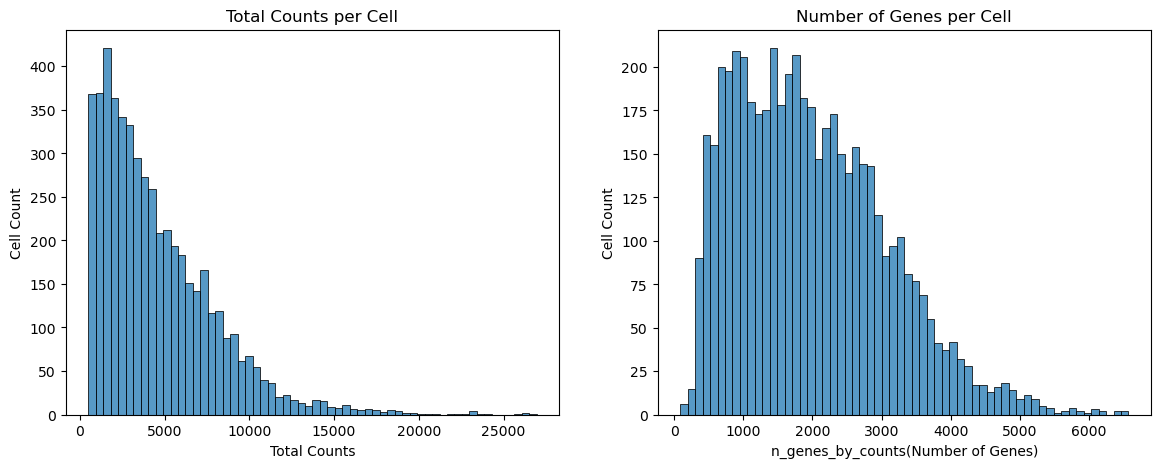

In [379]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch11.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch11.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

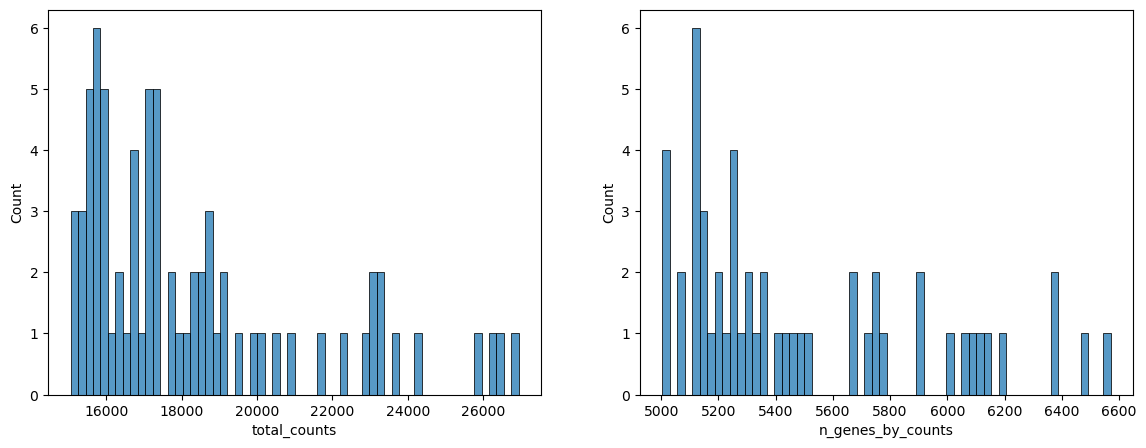

In [380]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch11.obs['total_counts'][adata_batch11.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch11.obs['n_genes_by_counts'][adata_batch11.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

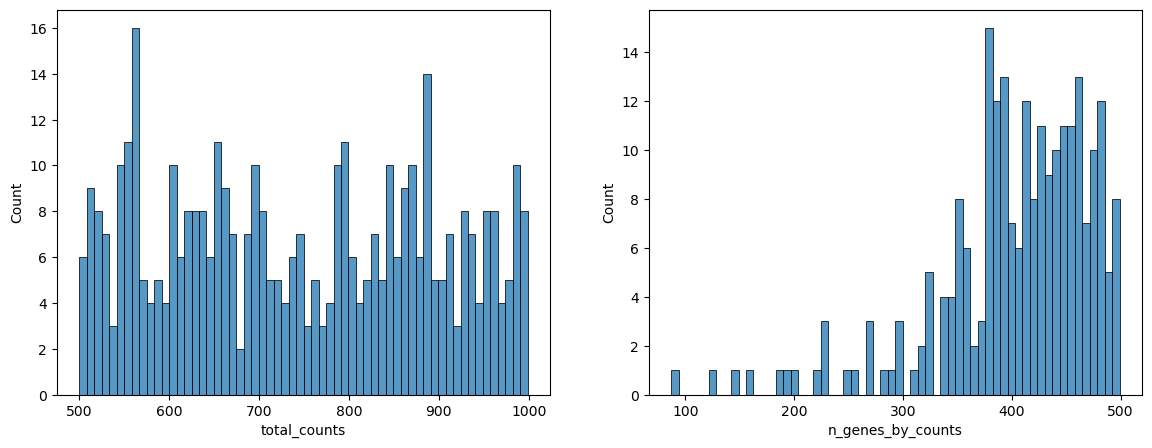

In [381]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch11.obs['total_counts'][adata_batch11.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch11.obs['n_genes_by_counts'][adata_batch11.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

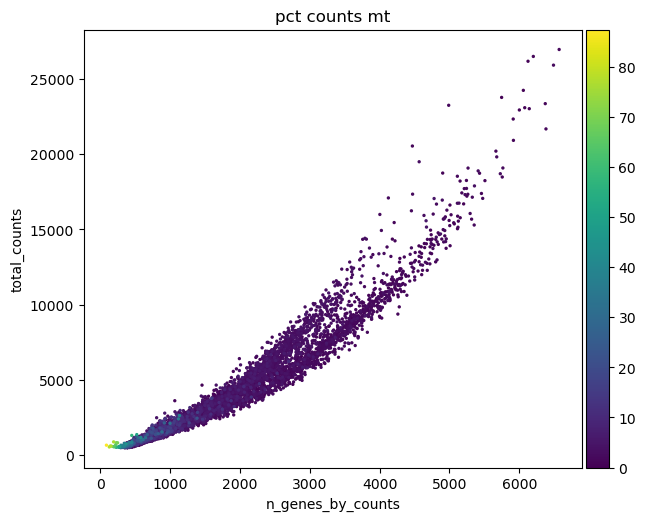

In [382]:
sc.pl.scatter(adata_batch11, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [383]:
print('Total number of cells: {:d}'.format(adata_batch11.n_obs))
# print('')
sc.pp.filter_cells(adata_batch11, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch11.n_obs))
print('')
sc.pp.filter_cells(adata_batch11, max_genes=5000)
sc.pp.filter_cells(adata_batch11, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch11.n_obs))

adata_batch11 = adata_batch11[adata_batch11.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch11.n_obs))

Total number of cells: 5153
filtered out 73 cells that have more than 15000 counts
Number of cells after max count filter: 5080

filtered out 1 cells that have more than 5000 genes expressed
filtered out 100 cells that have less than 400 genes expressed
Number of cells after gene filter: 4979
Number of cells after MT filter: 4739


In [384]:
print('Total number of genes: {:d}'.format(adata_batch11.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch11, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch11.n_vars))

Total number of genes: 33989
filtered out 15805 genes that are detected in less than 5 cells
Number of genes after cell filter: 18184


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [385]:
sc.pp.calculate_qc_metrics(adata_batch11, qc_vars=['mt', 'ribo'], inplace=True)

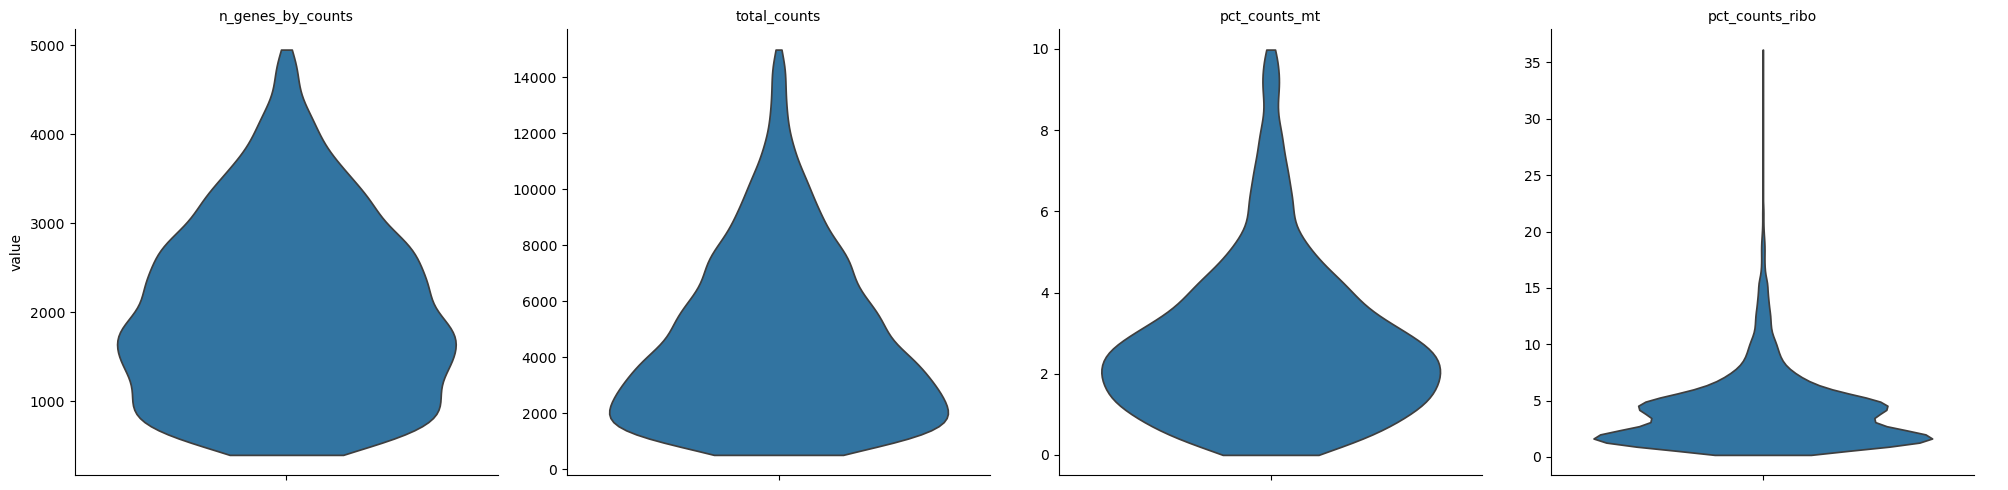

In [386]:
sc.pl.violin(
    adata_batch11,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [387]:
adata_batch11

AnnData object with n_obs × n_vars = 4739 × 18184
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch12

In [358]:
# batch11
batch12_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch12_result/filtered_feature_bc_matrix")
batch12_name = "batch11"

adata_batch12 = sc.read_10x_mtx(
    batch12_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch12.obs['batches'] = 'batch12'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [359]:
adata_batch12

AnnData object with n_obs × n_vars = 5327 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [360]:
# add in Hashtag labels into .obs
feature12_path = os.path.join(batch12_path, 'features.tsv.gz')
if not os.path.exists(feature12_path):
    raise FileNotFoundError(f"Features file not found for {batch12_name}")

features12 = pd.read_csv(feature12_path, sep='\t', header=None)
features12.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask = features12['feature_type'].str.contains('Antibody Capture', case=False) | \
           features12['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags12 = features12.loc[hto_mask, 'gene_name'].tolist()
HTO_tags12 = [gene for gene in HTO_tags12 if gene in adata_batch12.var_names]

print(f"Hashtags found in {batch12_name}: {HTO_tags}")

if HTO_tags12:
    adata_batch12.obs[HTO_tags12] = pd.DataFrame(adata_batch12[:, HTO_tags].X.toarray(), index=adata_batch12.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch12, cell_hashing_columns=HTO_tags12)
    adata_batch12 = adata_batch12[:, ~adata_batch12.var_names.isin(HTO_tags12)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch12.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch12.obs["Classification"] = "Unknown"

Hashtags found in batch11: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [361]:
adata_batch12

AnnData object with n_obs × n_vars = 5327 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [362]:
adata_batch12.obs['Classification'].value_counts()

Classification
Hashtag_1    2118
Hashtag_2    1634
Hashtag_4     790
Hashtag_3     539
Doublet       246
Name: count, dtype: int64

In [388]:
print(adata_batch12.obs_names.is_unique) 
print(adata_batch12.var_names.is_unique) 

True
True


In [389]:
# count hashtage percentage
classification_a12 = adata_batch12.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a12.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_1: 39.76%
Hashtag_2: 30.67%
Hashtag_4: 14.83%
Hashtag_3: 10.12%
Doublet: 4.62%


In [391]:
# delete doublets
adata_batch12 = adata_batch12[adata_batch12.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch12.shape}")

Cells retained: (5081, 33989)


In [392]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch12.obs[key] = adata_batch12.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [393]:
adata_batch12

AnnData object with n_obs × n_vars = 5081 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [394]:
print(adata_batch12.obs['genotype'].value_counts())
print(adata_batch12.obs['treatment'].value_counts())
print(adata_batch12.obs['gender'].value_counts())
print(adata_batch12.obs['brain_region'].value_counts())
print(adata_batch12.obs['sample'].value_counts())

genotype
5XFAD    5081
Name: count, dtype: int64
treatment
Vehicle    5081
Name: count, dtype: int64
gender
Female    3752
Male      1329
Name: count, dtype: int64
brain_region
HP     2657
RSC    2424
Name: count, dtype: int64
sample
M23    3752
M24    1329
Name: count, dtype: int64


In [395]:
# create 'geno_treat' column : like WT_LPS
adata_batch12.obs["geno_treat"] = adata_batch12.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch12.obs["geno_treat_sex"] = adata_batch12.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [396]:
adata_batch12.var['ribo'] = adata_batch12.var_names.str.startswith('Rps') | adata_batch12.var_names.str.startswith('Rpl')
adata_batch12.var['mt'] = adata_batch12.var_names.str.startswith('mt-')

In [397]:
sc.pp.calculate_qc_metrics(adata_batch12, qc_vars=['mt', 'ribo'], inplace=True)

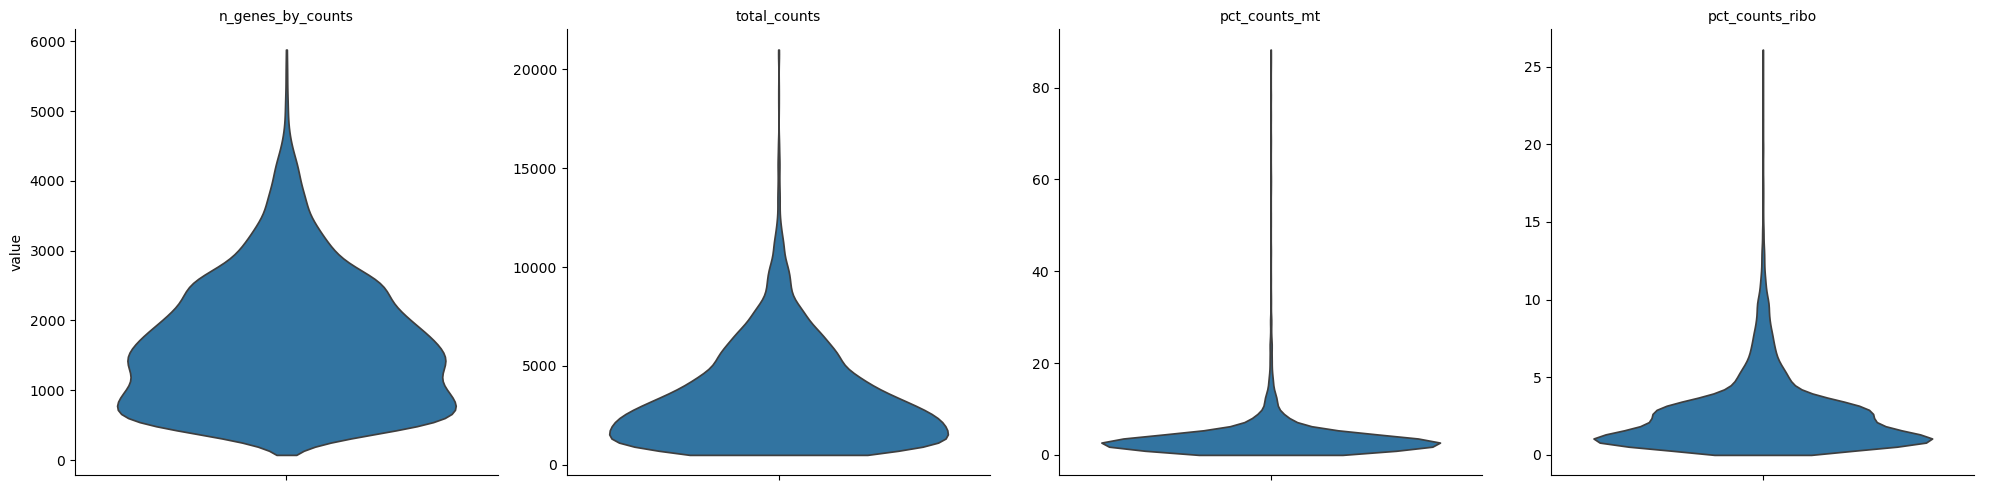

In [398]:
sc.pl.violin(
    adata_batch12,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

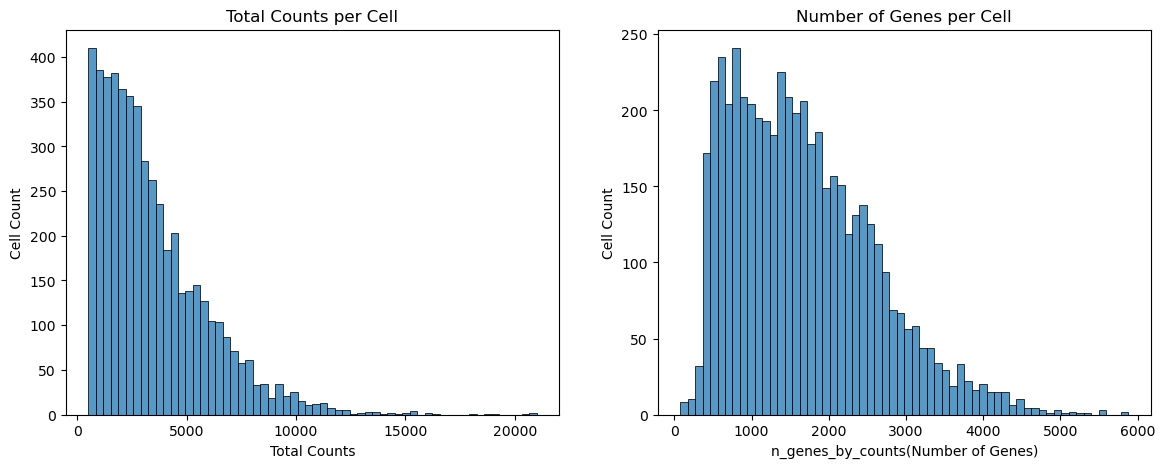

In [399]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch12.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch12.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

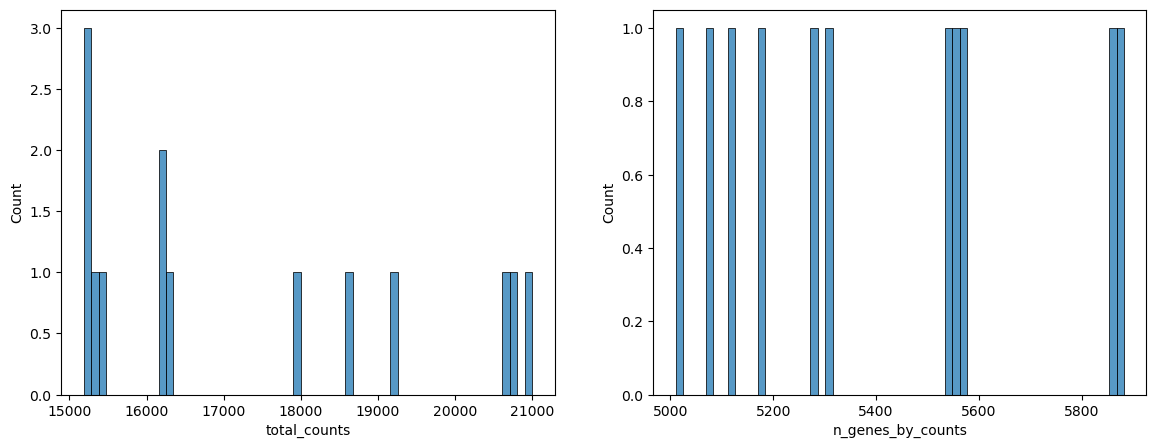

In [400]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch12.obs['total_counts'][adata_batch12.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch12.obs['n_genes_by_counts'][adata_batch12.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch12.obs['total_counts'][adata_batch12.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch12.obs['n_genes_by_counts'][adata_batch12.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

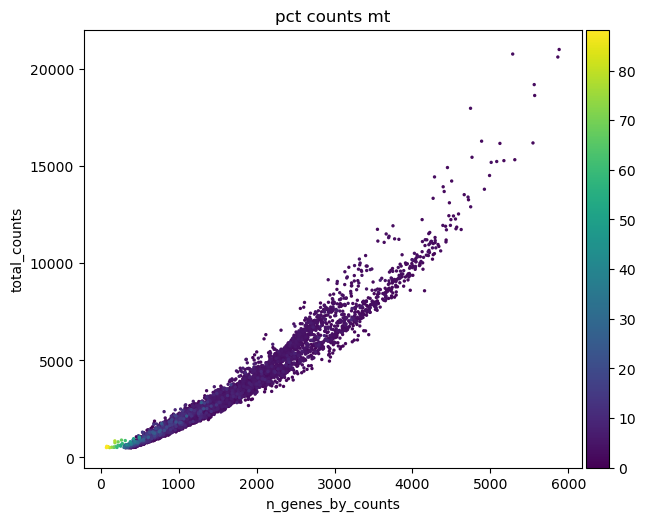

In [401]:
sc.pl.scatter(adata_batch12, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [402]:
print('Total number of cells: {:d}'.format(adata_batch12.n_obs))
# print('')
sc.pp.filter_cells(adata_batch12, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch12.n_obs))
print('')
sc.pp.filter_cells(adata_batch12, max_genes=5000)
sc.pp.filter_cells(adata_batch12, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch12.n_obs))

adata_batch12 = adata_batch12[adata_batch12.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch12.n_obs))

Total number of cells: 5081
filtered out 14 cells that have more than 15000 counts
Number of cells after max count filter: 5067

filtered out 93 cells that have less than 400 genes expressed
Number of cells after gene filter: 4974
Number of cells after MT filter: 4766


In [403]:
print('Total number of genes: {:d}'.format(adata_batch12.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch12, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch12.n_vars))

Total number of genes: 33989
filtered out 15799 genes that are detected in less than 5 cells
Number of genes after cell filter: 18190


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [404]:
sc.pp.calculate_qc_metrics(adata_batch12, qc_vars=['mt', 'ribo'], inplace=True)

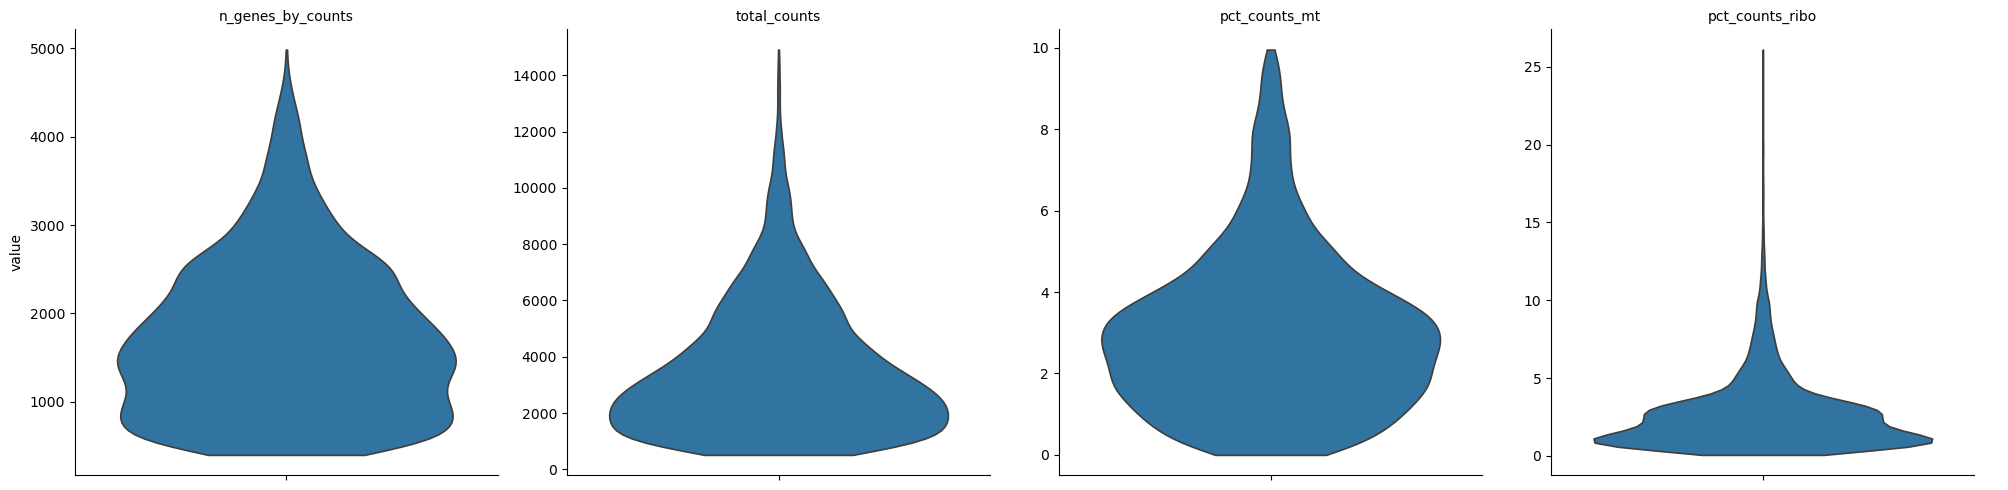

In [405]:
sc.pl.violin(
    adata_batch12,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [406]:
adata_batch12

AnnData object with n_obs × n_vars = 4766 × 18190
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch13

In [525]:
# batch1
batch13_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch13_result/filtered_feature_bc_matrix")
batch13_name = "batch13"

adata_batch13 = sc.read_10x_mtx(
    batch13_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch13.obs['batches'] = 'batch13'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [526]:
adata_batch13

AnnData object with n_obs × n_vars = 5116 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [527]:
# add in Hashtag labels into .obs
feature13_path = os.path.join(batch13_path, 'features.tsv.gz')
if not os.path.exists(feature13_path):
    raise FileNotFoundError(f"Features file not found for {batch13_name}")

features13 = pd.read_csv(feature13_path, sep='\t', header=None)
features13.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask13 = features13['feature_type'].str.contains('Antibody Capture', case=False) | \
           features13['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags13 = features13.loc[hto_mask13, 'gene_name'].tolist()
HTO_tags13 = [gene for gene in HTO_tags13 if gene in adata_batch13.var_names]

print(f"Hashtags found in {batch13_name}: {HTO_tags13}")

if HTO_tags:
    adata_batch13.obs[HTO_tags] = pd.DataFrame(adata_batch13[:, HTO_tags13].X.toarray(), index=adata_batch13.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch13, cell_hashing_columns=HTO_tags13)
    adata_batch13 = adata_batch13[:, ~adata_batch13.var_names.isin(HTO_tags13)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch13.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch13.obs["Classification"] = "Unknown"

Hashtags found in batch13: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [528]:
adata_batch13

AnnData object with n_obs × n_vars = 5116 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [529]:
adata_batch13.obs['Classification'].value_counts()

Classification
Hashtag_2    2278
Hashtag_1    1629
Hashtag_4     778
Doublet       226
Hashtag_3     205
Name: count, dtype: int64

In [530]:
print(adata_batch13.obs_names.is_unique) 
print(adata_batch13.var_names.is_unique) 

True
True


In [531]:
# count hashtage percentage
classification_a13 = adata_batch13.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a13.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 44.53%
Hashtag_1: 31.84%
Hashtag_4: 15.21%
Doublet: 4.42%
Hashtag_3: 4.01%


In [532]:
# delete doublets
adata_batch13 = adata_batch13[adata_batch13.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'Unknown'])].copy()
print(f"Cells retained: {adata_batch13.shape}")

Cells retained: (4890, 33989)


In [533]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch13.obs[key] = adata_batch13.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [534]:
adata_batch13

AnnData object with n_obs × n_vars = 4890 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [535]:
print(adata_batch13.obs['genotype'].value_counts())
print(adata_batch13.obs['treatment'].value_counts())
print(adata_batch13.obs['gender'].value_counts())
print(adata_batch13.obs['brain_region'].value_counts())
print(adata_batch13.obs['sample'].value_counts())

genotype
WT    4890
Name: count, dtype: int64
treatment
Vehicle    4890
Name: count, dtype: int64
gender
Female    4890
Name: count, dtype: int64
brain_region
RSC    3056
HP     1834
Name: count, dtype: int64
sample
M25    3907
M26     983
Name: count, dtype: int64


In [536]:
# create 'geno_treat' column : like WT_LPS
adata_batch13.obs["geno_treat"] = adata_batch13.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch13.obs["geno_treat_sex"] = adata_batch13.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [537]:
adata_batch13.var['ribo'] = adata_batch13.var_names.str.startswith('Rps') | adata_batch13.var_names.str.startswith('Rpl')
adata_batch13.var['mt'] = adata_batch13.var_names.str.startswith('mt-')

In [538]:
sc.pp.calculate_qc_metrics(adata_batch13, qc_vars=['mt', 'ribo'], inplace=True)

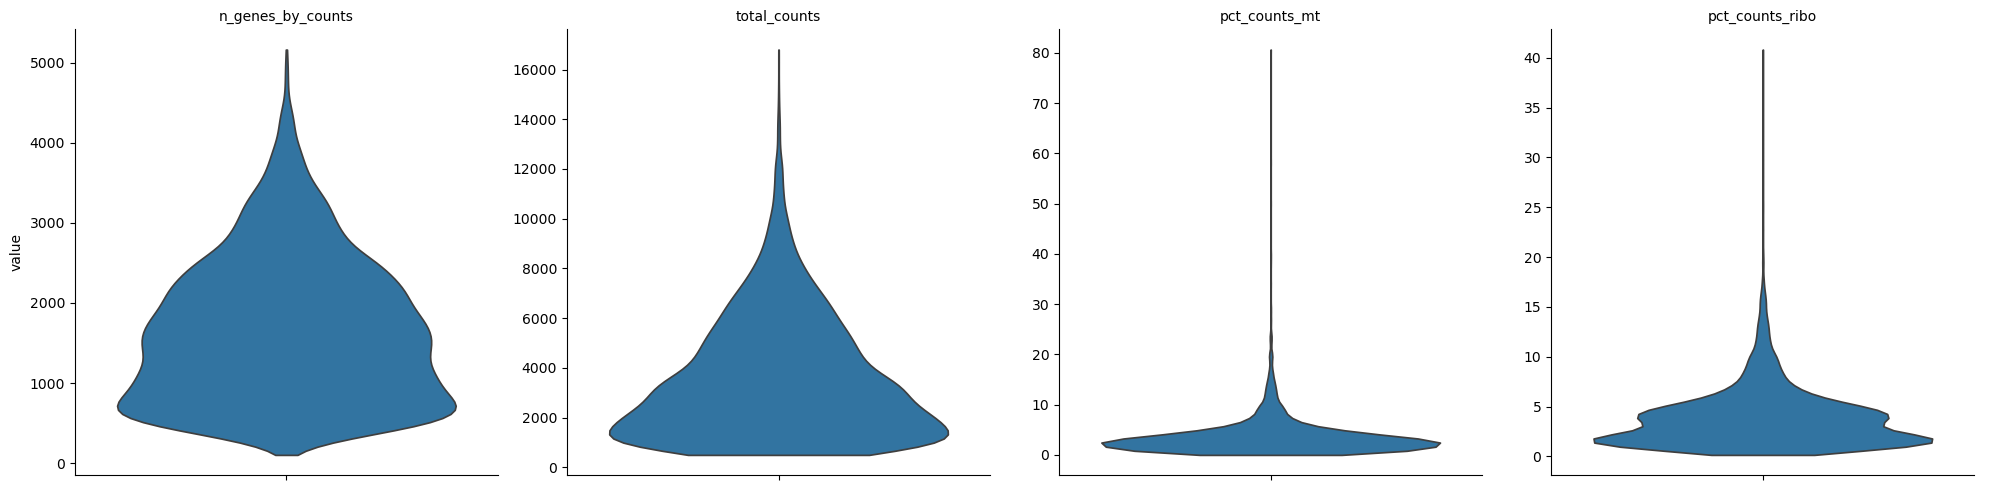

In [539]:
sc.pl.violin(
    adata_batch13,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

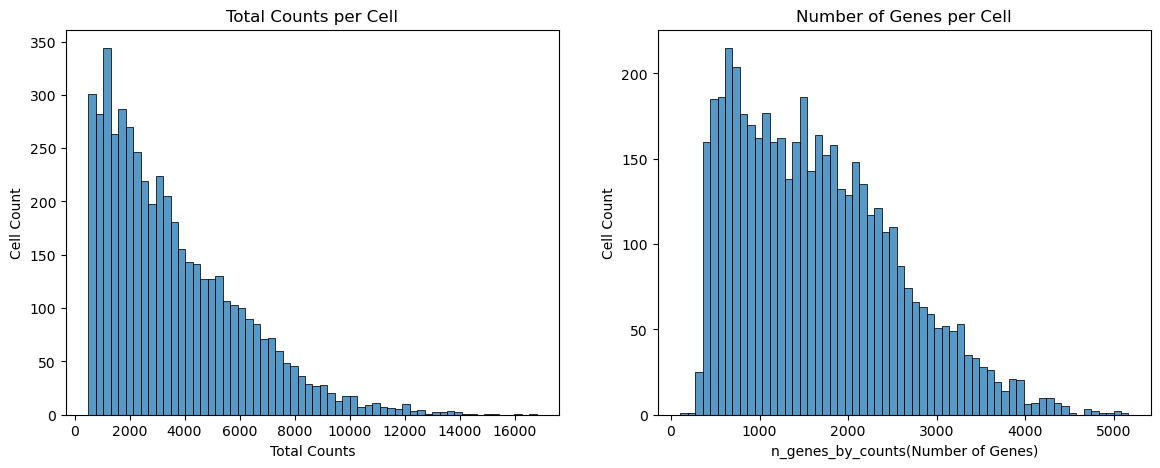

In [540]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch13.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch13.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

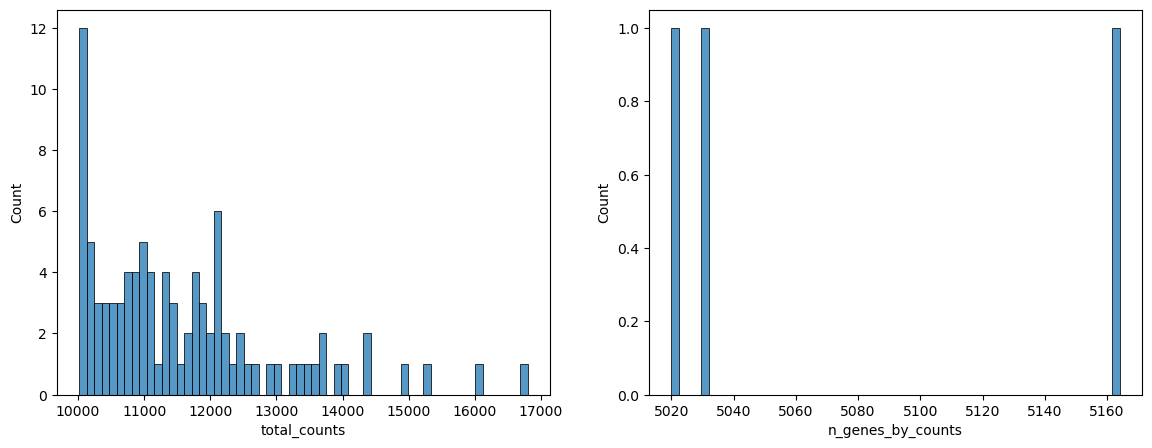

In [541]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch13.obs['total_counts'][adata_batch13.obs['total_counts'] > 10000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch13.obs['n_genes_by_counts'][adata_batch13.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

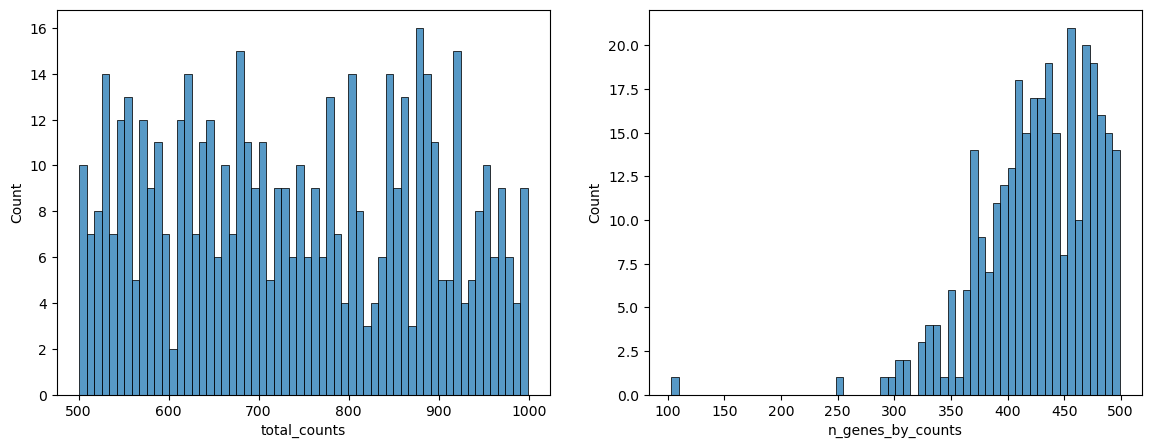

In [542]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch13.obs['total_counts'][adata_batch13.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch13.obs['n_genes_by_counts'][adata_batch13.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

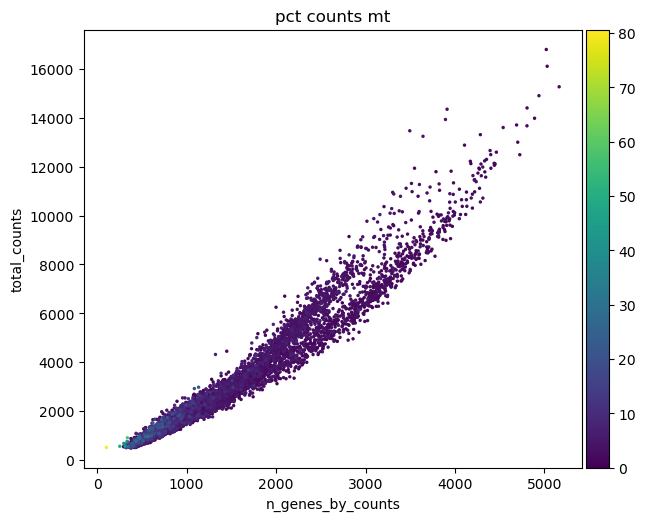

In [543]:
sc.pl.scatter(adata_batch13, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [544]:
print('Total number of cells: {:d}'.format(adata_batch13.n_obs))
# print('')
sc.pp.filter_cells(adata_batch13, max_counts=12500)
print('Number of cells after max count filter: {:d}'.format(adata_batch13.n_obs))
print('')
sc.pp.filter_cells(adata_batch13, max_genes=5000)
sc.pp.filter_cells(adata_batch13, min_genes=350)
print('Number of cells after gene filter: {:d}'.format(adata_batch13.n_obs))

adata_batch13 = adata_batch13[adata_batch13.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch13.n_obs))

Total number of cells: 4890
filtered out 18 cells that have more than 12500 counts
Number of cells after max count filter: 4872

filtered out 24 cells that have less than 350 genes expressed
Number of cells after gene filter: 4848
Number of cells after MT filter: 4617


In [545]:
print('Total number of genes: {:d}'.format(adata_batch13.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch13, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch13.n_vars))

Total number of genes: 33989
filtered out 16339 genes that are detected in less than 5 cells
Number of genes after cell filter: 17650


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [546]:
sc.pp.calculate_qc_metrics(adata_batch13, qc_vars=['mt', 'ribo'], inplace=True)

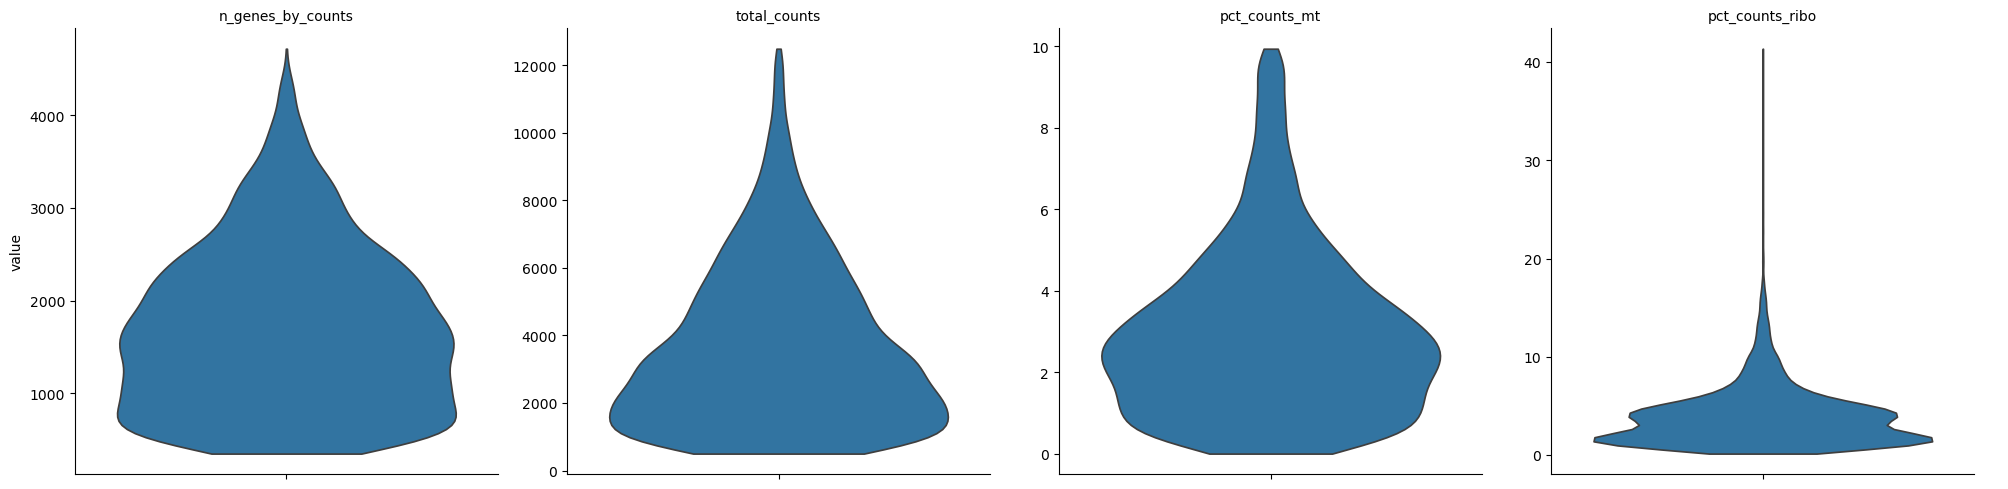

In [547]:
sc.pl.violin(
    adata_batch13,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [548]:
adata_batch13

AnnData object with n_obs × n_vars = 4617 × 17650
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch14

In [469]:
# batch11
batch14_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch14_result/filtered_feature_bc_matrix")
batch14_name = "batch11"

adata_batch14 = sc.read_10x_mtx(
    batch14_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch14.obs['batches'] = 'batch14'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [470]:
adata_batch14

AnnData object with n_obs × n_vars = 4385 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [471]:
# add in Hashtag labels into .obs
feature14_path = os.path.join(batch14_path, 'features.tsv.gz')
if not os.path.exists(feature14_path):
    raise FileNotFoundError(f"Features file not found for {batch14_name}")

features14 = pd.read_csv(feature14_path, sep='\t', header=None)
features14.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask14 = features14['feature_type'].str.contains('Antibody Capture', case=False) | \
           features14['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags14 = features14.loc[hto_mask14, 'gene_name'].tolist()
HTO_tags14 = [gene for gene in HTO_tags14 if gene in adata_batch14.var_names]

print(f"Hashtags found in {batch14_name}: {HTO_tags14}")

if HTO_tags14:
    adata_batch14.obs[HTO_tags14] = pd.DataFrame(adata_batch14[:, HTO_tags].X.toarray(), index=adata_batch14.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch14, cell_hashing_columns=HTO_tags14)
    adata_batch14 = adata_batch14[:, ~adata_batch14.var_names.isin(HTO_tags14)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch14.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch14.obs["Classification"] = "Unknown"

Hashtags found in batch11: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [472]:
adata_batch14

AnnData object with n_obs × n_vars = 4385 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [473]:
adata_batch14.obs['Classification'].value_counts()

Classification
Hashtag_1    2842
Hashtag_3     609
Hashtag_2     520
Hashtag_4     312
Doublet       101
Negative        1
Name: count, dtype: int64

In [474]:
print(adata_batch14.obs_names.is_unique) 
print(adata_batch14.var_names.is_unique) 

True
True


In [475]:
# count hashtage percentage
classification_a14 = adata_batch14.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a14.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_1: 64.81%
Hashtag_3: 13.89%
Hashtag_2: 11.86%
Hashtag_4: 7.12%
Doublet: 2.30%
Negative: 0.02%


In [476]:
# delete doublets
adata_batch14 = adata_batch14[adata_batch14.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4'])].copy()
print(f"Cells retained: {adata_batch14.shape}")

Cells retained: (4283, 33989)


In [477]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch14.obs[key] = adata_batch14.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [478]:
adata_batch14

AnnData object with n_obs × n_vars = 4283 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [479]:
print(adata_batch14.obs['genotype'].value_counts())
print(adata_batch14.obs['treatment'].value_counts())
print(adata_batch14.obs['gender'].value_counts())
print(adata_batch14.obs['brain_region'].value_counts())
print(adata_batch14.obs['sample'].value_counts())

genotype
5XFAD    4283
Name: count, dtype: int64
treatment
LPS    4283
Name: count, dtype: int64
gender
Female    3362
Male       921
Name: count, dtype: int64
brain_region
HP     3451
RSC     832
Name: count, dtype: int64
sample
M27    3362
M28     921
Name: count, dtype: int64


In [480]:
# create 'geno_treat' column : like WT_LPS
adata_batch14.obs["geno_treat"] = adata_batch14.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch14.obs["geno_treat_sex"] = adata_batch14.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [481]:
adata_batch14.var['ribo'] = adata_batch14.var_names.str.startswith('Rps') | adata_batch14.var_names.str.startswith('Rpl')
adata_batch14.var['mt'] = adata_batch14.var_names.str.startswith('mt-')

In [482]:
sc.pp.calculate_qc_metrics(adata_batch14, qc_vars=['mt', 'ribo'], inplace=True)

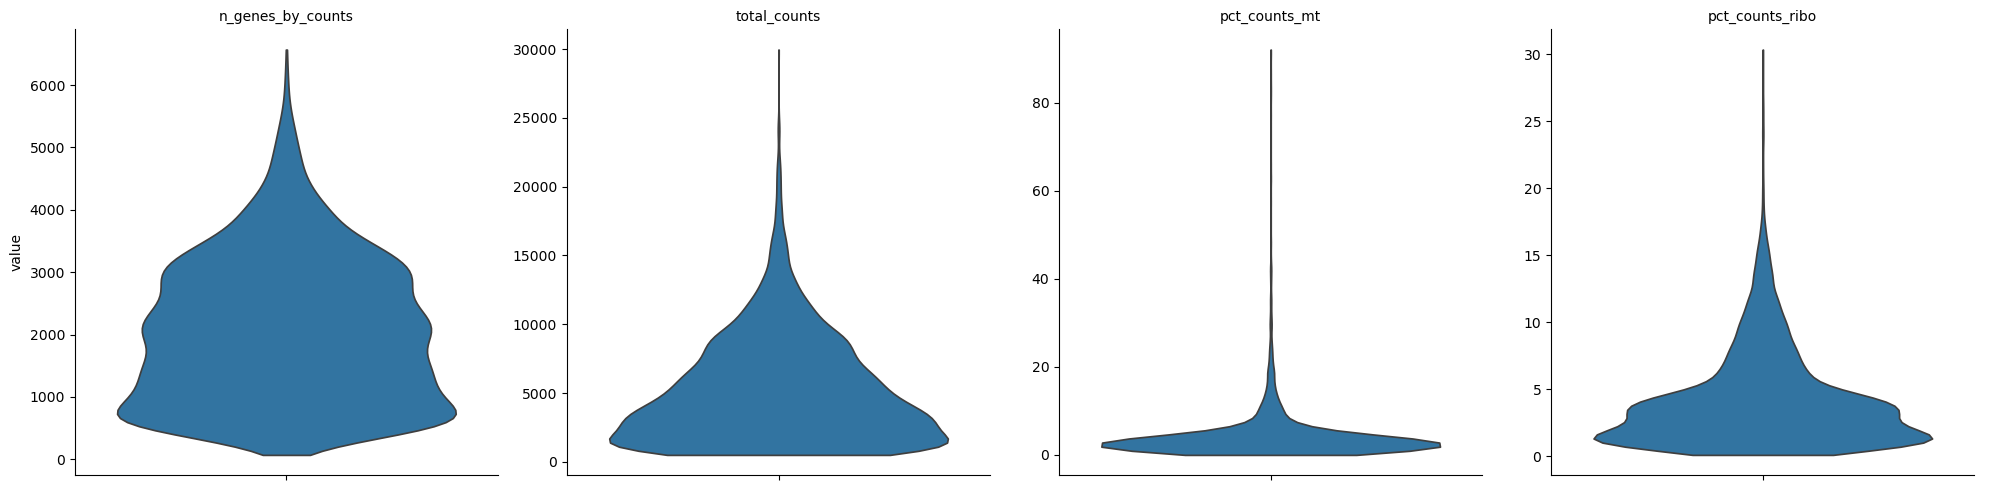

In [483]:
sc.pl.violin(
    adata_batch14,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

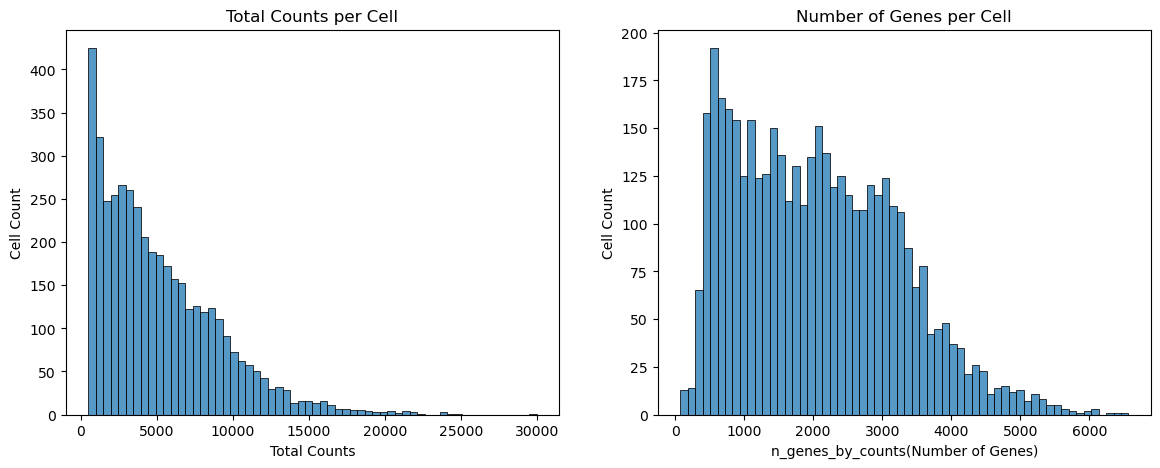

In [484]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch14.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch14.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

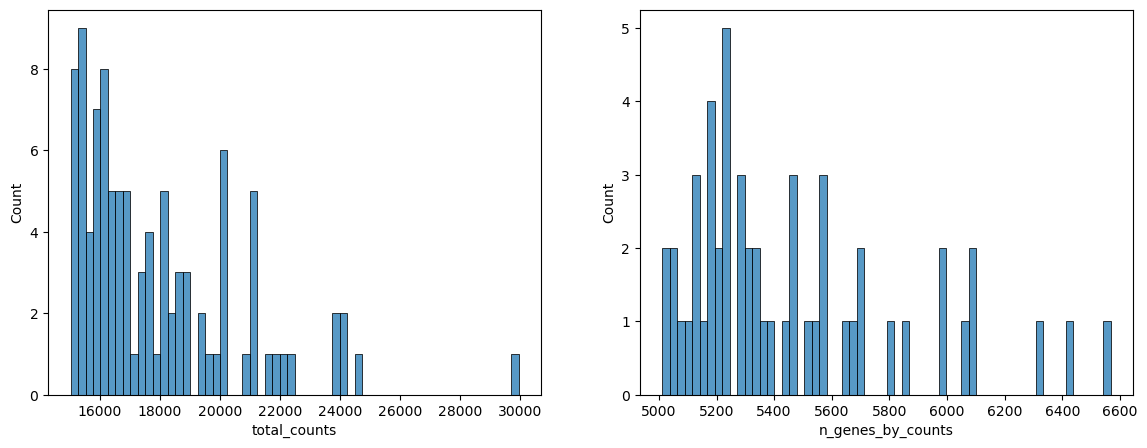

In [485]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch14.obs['total_counts'][adata_batch14.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch14.obs['n_genes_by_counts'][adata_batch14.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

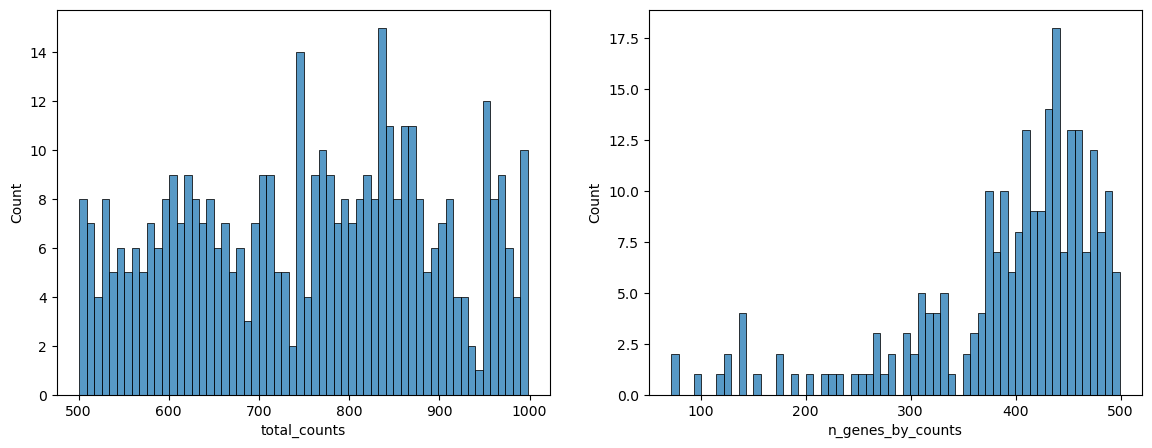

In [486]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch14.obs['total_counts'][adata_batch14.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch14.obs['n_genes_by_counts'][adata_batch14.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

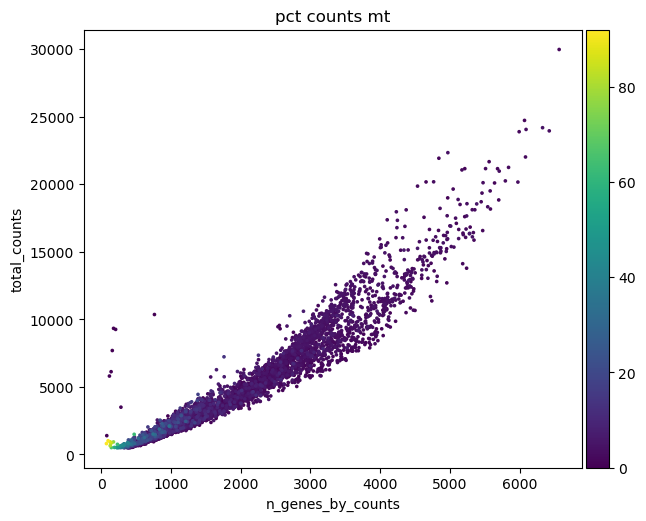

In [487]:
sc.pl.scatter(adata_batch14, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [488]:
print('Total number of cells: {:d}'.format(adata_batch12.n_obs))
# print('')
sc.pp.filter_cells(adata_batch14, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch14.n_obs))
print('')
sc.pp.filter_cells(adata_batch14, max_genes=5000)
sc.pp.filter_cells(adata_batch14, min_genes=400)
print('Number of cells after gene filter: {:d}'.format(adata_batch14.n_obs))

adata_batch14 = adata_batch14[adata_batch14.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch14.n_obs))

Total number of cells: 4766
filtered out 99 cells that have more than 15000 counts
Number of cells after max count filter: 4184

filtered out 2 cells that have more than 5000 genes expressed
filtered out 93 cells that have less than 400 genes expressed
Number of cells after gene filter: 4089
Number of cells after MT filter: 3802


In [489]:
print('Total number of genes: {:d}'.format(adata_batch14.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch14, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch14.n_vars))

Total number of genes: 33989
filtered out 15511 genes that are detected in less than 5 cells
Number of genes after cell filter: 18478


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [490]:
sc.pp.calculate_qc_metrics(adata_batch14, qc_vars=['mt', 'ribo'], inplace=True)

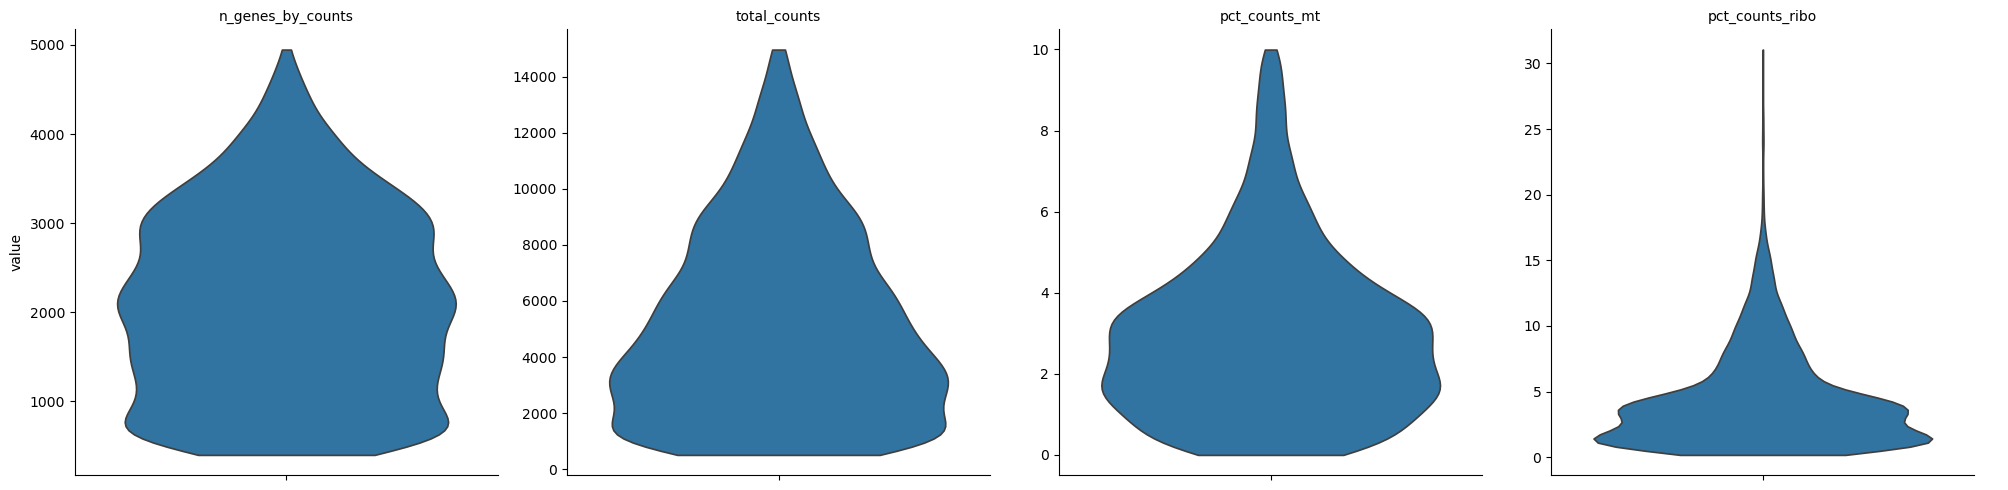

In [491]:
sc.pl.violin(
    adata_batch14,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [492]:
adata_batch14

AnnData object with n_obs × n_vars = 3802 × 18478
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# batch15

In [560]:
# batch1
batch15_path = Path("/Users/tianmi/Desktop/Thesis/outs/batch15_result/filtered_feature_bc_matrix")
batch15_name = "batch3"

adata_batch15 = sc.read_10x_mtx(
    batch15_path, # automatically read in matrix, barcodes and features 3 filtes
    var_names='gene_symbols',  
    make_unique=True,          # avoid  repetitive gene names
    gex_only=False             # keep hashtag / antibody capture
)

adata_batch15.obs['batches'] = 'batch15'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [561]:
adata_batch15

AnnData object with n_obs × n_vars = 5504 × 33993
    obs: 'batches'
    var: 'gene_ids', 'feature_types'

In [562]:
# add in Hashtag labels into .obs
feature15_path = os.path.join(batch15_path, 'features.tsv.gz')
if not os.path.exists(feature15_path):
    raise FileNotFoundError(f"Features file not found for {batch15_name}")

features15 = pd.read_csv(feature15_path, sep='\t', header=None)
features15.columns = ['gene_id', 'gene_name', 'feature_type'] # manually add columns names

# read in feature files containing hahtags
# recognize HTO tags    
hto_mask15 = features15['feature_type'].str.contains('Antibody Capture', case=False) | \
           features15['gene_id'].str.contains('HTO|Hashtag', case=False)

HTO_tags15 = features15.loc[hto_mask15, 'gene_name'].tolist()
HTO_tags15 = [gene for gene in HTO_tags15 if gene in adata_batch15.var_names]

print(f"Hashtags found in {batch15_name}: {HTO_tags15}")

if HTO_tags15:
    adata_batch15.obs[HTO_tags] = pd.DataFrame(adata_batch15[:, HTO_tags].X.toarray(), index=adata_batch15.obs_names)
    print("Running HashSolo...")
    sce.pp.hashsolo(adata_batch15, cell_hashing_columns=HTO_tags)
    adata_batch15 = adata_batch15[:, ~adata_batch15.var_names.isin(HTO_tags)].copy()
    print(f"HTOs removed. Remaining genes: {adata_batch15.shape[1]}")
else:
    print(f"No HTO found. Skipping HashSolo.")
    adata_batch15.obs["Classification"] = "Unknown"

Hashtags found in batch3: ['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4']
Running HashSolo...
Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2
HTOs removed. Remaining genes: 33989


In [563]:
adata_batch15

AnnData object with n_obs × n_vars = 5504 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types'

In [564]:
print(adata_batch15.obs_names.is_unique) 
print(adata_batch15.var_names.is_unique) 

True
True


In [565]:
# count hashtage percentage
classification_a15 = adata_batch15.obs['Classification'].value_counts(normalize=True) * 100  # normalize=True : convert into pct

for classification, percentage in classification_a15.items():
    print(f"{classification}: {percentage:.2f}%")

Hashtag_2: 48.00%
Hashtag_1: 37.57%
Hashtag_4: 7.43%
Hashtag_3: 5.25%
Doublet: 1.74%


In [566]:
# delete doublets
adata_batch15 = adata_batch15[adata_batch15.obs['Classification'].isin(['Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4'])].copy()
print(f"Cells retained: {adata_batch15.shape}")

Cells retained: (5408, 33989)


In [567]:
for key in ['genotype', 'treatment', 'brain_region', 'gender', 'sample']:
    adata_batch15.obs[key] = adata_batch15.obs.apply(
        lambda row: metadata_info[row['batches']].get(row['Classification'], {}).get(key, 'Unknown'),
        axis=1
    )

In [568]:
adata_batch15

AnnData object with n_obs × n_vars = 5408 × 33989
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [569]:
print(adata_batch15.obs['genotype'].value_counts())
print(adata_batch15.obs['treatment'].value_counts())
print(adata_batch15.obs['gender'].value_counts())
print(adata_batch15.obs['brain_region'].value_counts())
print(adata_batch15.obs['sample'].value_counts())

genotype
5XFAD    5408
Name: count, dtype: int64
treatment
Vehicle    5408
Name: count, dtype: int64
gender
Female    5408
Name: count, dtype: int64
brain_region
RSC    3051
HP     2357
Name: count, dtype: int64
sample
M29    4710
M30     698
Name: count, dtype: int64


In [570]:
# create 'geno_treat' column : like WT_LPS
adata_batch15.obs["geno_treat"] = adata_batch15.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}", axis=1
)
# create 'geno_treat_sex' column : like WT_LPS_M
adata_batch15.obs["geno_treat_sex"] = adata_batch15.obs.apply(
    lambda row: f"{row['genotype']}_{row['treatment'][:3]}_{row['gender'][:1]}", axis=1
)

In [571]:
adata_batch15.var['ribo'] = adata_batch15.var_names.str.startswith('Rps') | adata_batch15.var_names.str.startswith('Rpl')
adata_batch15.var['mt'] = adata_batch15.var_names.str.startswith('mt-')

In [572]:
sc.pp.calculate_qc_metrics(adata_batch15, qc_vars=['mt', 'ribo'], inplace=True)

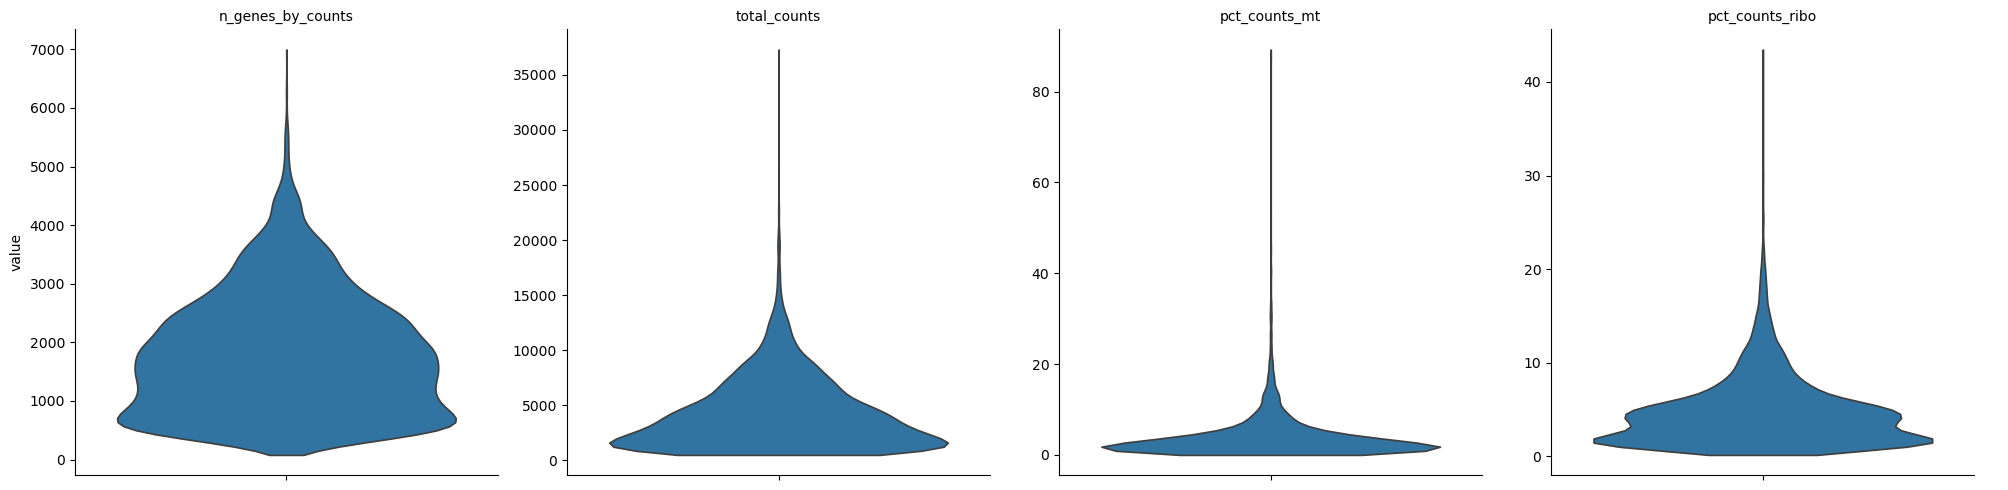

In [573]:
sc.pl.violin(
    adata_batch15,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

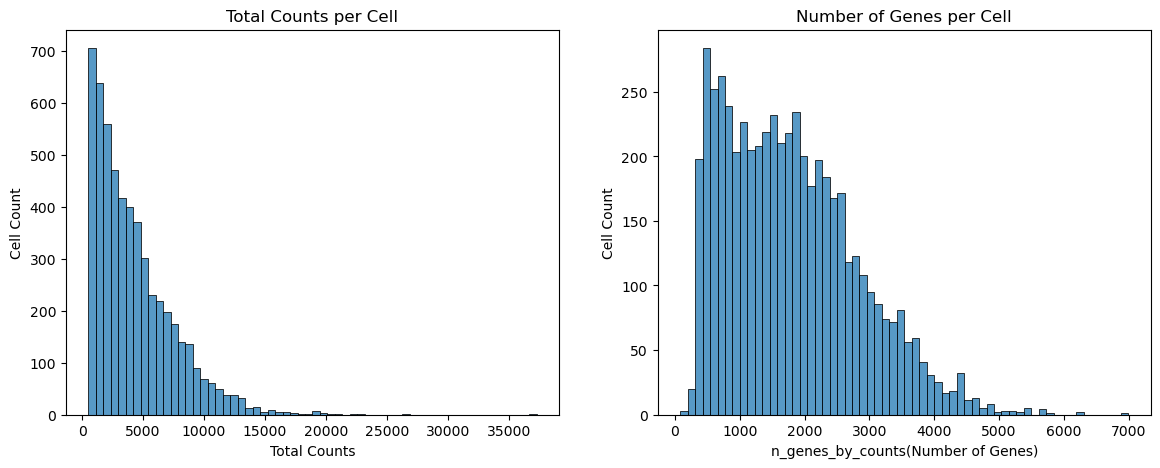

In [574]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch15.obs['total_counts'], kde=False, bins=60, ax=axes[0]) # kde: line
axes[0].set_title('Total Counts per Cell')
axes[0].set_xlabel('Total Counts')
axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch15.obs['n_genes_by_counts'], bins=60, ax=axes[1], kde=False)
axes[1].set_title('Number of Genes per Cell')
axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
axes[1].set_ylabel('Cell Count')
plt.show()

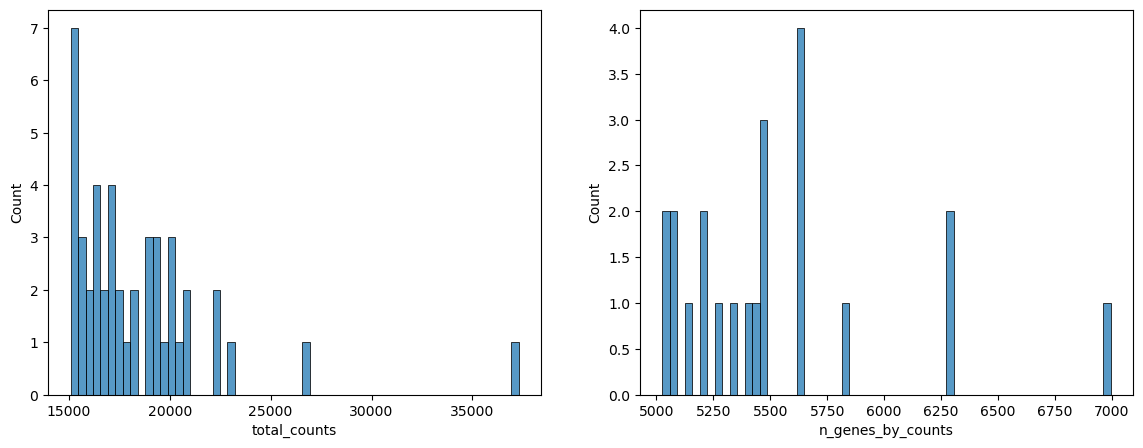

In [575]:
# Thresholding decision: counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch15.obs['total_counts'][adata_batch15.obs['total_counts'] > 15000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch15.obs['n_genes_by_counts'][adata_batch15.obs['n_genes_by_counts'] > 5000], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

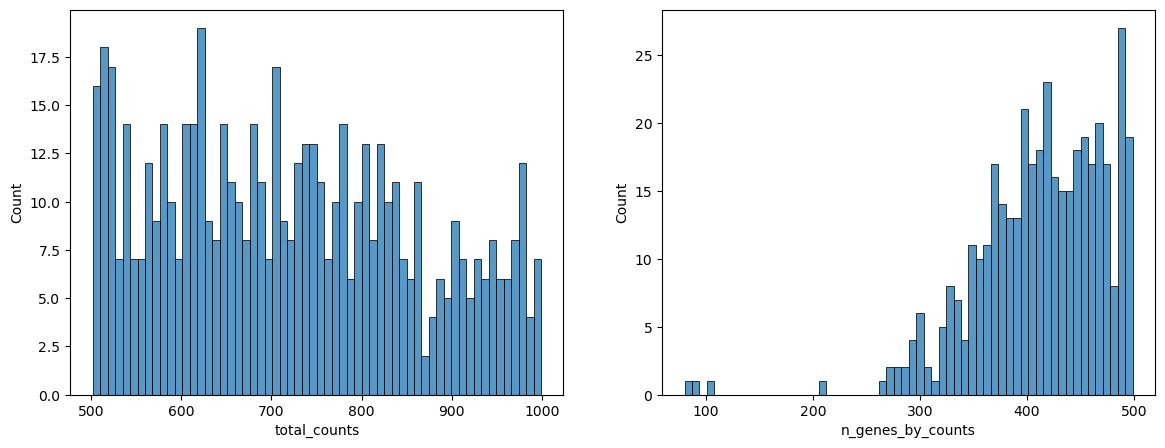

In [576]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

sns.histplot(adata_batch15.obs['total_counts'][adata_batch15.obs['total_counts'] < 1000], kde=False, bins=60, ax=axes[0]) # kde: line
# axes[0].set_title('Total Counts per Cell')
# axes[0].set_xlabel('Total Counts')
# axes[0].set_ylabel('Cell Count')

sns.histplot(adata_batch15.obs['n_genes_by_counts'][adata_batch15.obs['n_genes_by_counts'] < 500], bins=60, ax=axes[1], kde=False)
# axes[1].set_title('Number of Genes per Cell')
# axes[1].set_xlabel('n_genes_by_counts(Number of Genes)')
# axes[1].set_ylabel('Cell Count')
plt.show()

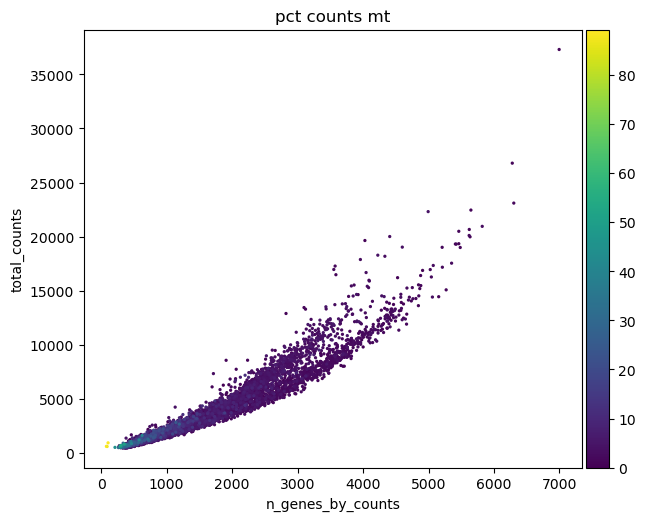

In [577]:
sc.pl.scatter(adata_batch15, "n_genes_by_counts", "total_counts", color="pct_counts_mt")

In [578]:
print('Total number of cells: {:d}'.format(adata_batch15.n_obs))
# print('')
sc.pp.filter_cells(adata_batch15, max_counts=15000)
print('Number of cells after max count filter: {:d}'.format(adata_batch15.n_obs))
print('')
sc.pp.filter_cells(adata_batch15, max_genes=5000)
sc.pp.filter_cells(adata_batch1, min_genes=300)
print('Number of cells after gene filter: {:d}'.format(adata_batch15.n_obs))

adata_batch15 = adata_batch15[adata_batch15.obs['pct_counts_mt'] < 10] # 30
# # adata = adata[adata.obs['pct_counts_ribo'] < 10] # 30
print('Number of cells after MT filter: {:d}'.format(adata_batch15.n_obs))

Total number of cells: 5408
filtered out 45 cells that have more than 15000 counts
Number of cells after max count filter: 5363

filtered out 2 cells that have more than 5000 genes expressed
Number of cells after gene filter: 5361
Number of cells after MT filter: 4957


In [579]:
print('Total number of genes: {:d}'.format(adata_batch15.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_batch15, min_cells=5)
print('Number of genes after cell filter: {:d}'.format(adata_batch15.n_vars))

Total number of genes: 33989
filtered out 15721 genes that are detected in less than 5 cells
Number of genes after cell filter: 18268


/Users/tianmi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [580]:
sc.pp.calculate_qc_metrics(adata_batch15, qc_vars=['mt', 'ribo'], inplace=True)

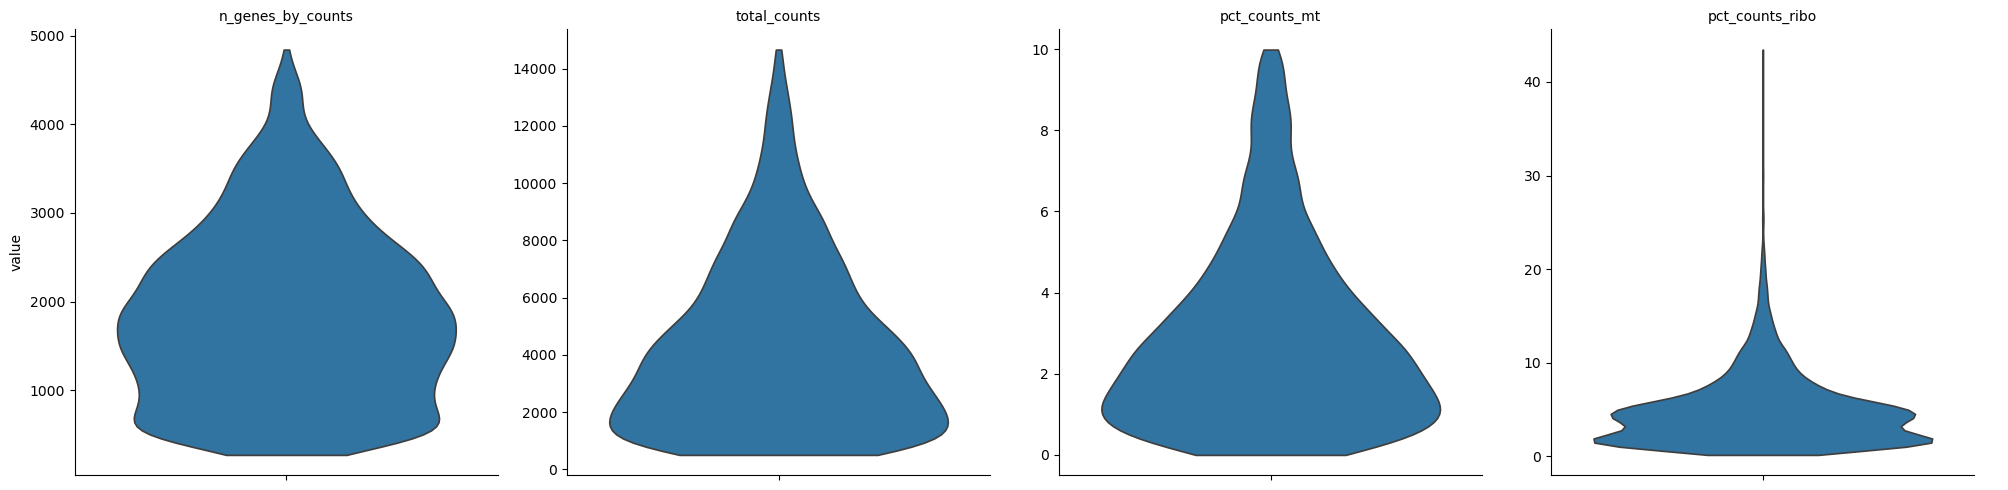

In [581]:
sc.pl.violin(
    adata_batch15,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True
)

In [582]:
adata_batch15

AnnData object with n_obs × n_vars = 4957 × 18268
    obs: 'batches', 'Hashtag_1', 'Hashtag_2', 'Hashtag_3', 'Hashtag_4', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'genotype', 'treatment', 'brain_region', 'gender', 'sample', 'geno_treat', 'geno_treat_sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

# Merge

In [583]:
adatas_list = [
    adata_batch1,
    adata_batch2,
    adata_batch3,
    adata_batch4,
    adata_batch5,
    adata_batch6,
    adata_batch7,
    adata_batch8,
    adata_batch9,
    adata_batch10,
    adata_batch11,
    adata_batch12,
    adata_batch13,
    adata_batch14,
    adata_batch15
    ]


In [584]:
for adata in adatas_list:
    batch_name = adata.obs['batches'].iloc[0]
    print(f"{batch_name} : {adata.shape[0]} cells {adata.shape[1]} genes ")

batch1 : 4799 cells 18965 genes 
batch2 : 5848 cells 18877 genes 
batch3 : 5416 cells 18766 genes 
batch4 : 4761 cells 18309 genes 
batch5 : 5220 cells 18912 genes 
batch6 : 3131 cells 18016 genes 
batch7 : 5519 cells 18179 genes 
batch8 : 4464 cells 18457 genes 
batch9 : 4018 cells 18058 genes 
batch10 : 4958 cells 18509 genes 
batch11 : 4739 cells 18184 genes 
batch12 : 4766 cells 18190 genes 
batch13 : 4617 cells 17650 genes 
batch14 : 3802 cells 18478 genes 
batch15 : 4957 cells 18268 genes 


In [585]:
for adata in adatas_list:
    print(adata.var.columns)

Index(['gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells'],
      dtype='object')
Index(['gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells'],
      dtype='object')
Index(['gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells'],
      dtype='object')
Index(['gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells'],
      dtype='object')
Index(['gene_ids', 'feature_types', 'ribo', 'mt', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_b

In [554]:
adata_batch1.var.feature_types

Pcmtd1                Gene Expression
Gm26901               Gene Expression
Cdh7                  Gene Expression
Exo1                  Gene Expression
Uxs1                  Gene Expression
                           ...       
mt-Nd6                Gene Expression
mt-Cytb               Gene Expression
ENSMUSG00000096808    Gene Expression
ENSMUSG00000095041    Gene Expression
ENSMUSG00000095742    Gene Expression
Name: feature_types, Length: 18965, dtype: category
Categories (1, object): ['Gene Expression']

In [586]:
# concatenation
print("Merging all batches...")          
adatas = anndata.concat(adatas_list, 
                        join='outer', # keep all genes, cells without genes would have 0 value
                        # label='batches', # create a new obs column 'batches'
                        # keys=[adata.obs['batches'].iloc[0] for adata in adatas_list],
                        index_unique="-", # add a -batch1 to each repetitive cell id
                        merge='unique') # make sure all cell id is unique 
# cuz for next hashsolo, cant have duplicate cell id names
print("Data preprocessing complete!")

Merging all batches...
Data preprocessing complete!


In [ ]:
print(adatas.var.feature_types)

In [587]:
print(adatas.obs_names.is_unique)
print(adatas.var_names.is_unique)

True
True


In [588]:
# print(adatas.obs['batches'].value_counts())
# print(adatas.obs['genotype'].value_counts())
# print(adatas.obs['genotype'].value_counts())
# print(adatas.obs['gender'].value_counts())
# print(adatas.obs['geno_treat'].value_counts())
# print(adatas.obs['geno_treat_sex'].value_counts())
print(adatas.obs['sample'].value_counts().sort_index())


sample
M1     3923
M2      876
M3     2121
M4     3727
M5     4452
M6      964
M7     4063
M8      698
M9     4476
M10     744
M11    2705
M12     426
M13    3540
M14    1979
M15    2386
M16    2078
M17    2680
M18    1338
M19    3859
M20    1099
M21    3931
M22     808
M23    3490
M24    1276
M25    3652
M26     965
M27    2939
M28     863
M29    4285
M30     672
Name: count, dtype: int64


In [242]:
print(adatas.obs_names[:10])

Index(['AAACCCACAAATAGCA-1-0', 'AAACCCACACTACCGG-1-0', 'AAACCCACACTGGACC-1-0',
       'AAACCCACAGATACCT-1-0', 'AAACCCATCGTTAGAC-1-0', 'AAACCCATCTGTCCGT-1-0',
       'AAACGAAAGACAGCGT-1-0', 'AAACGAACACGGTGCT-1-0', 'AAACGAACAGAGGACT-1-0',
       'AAACGAAGTTCAGTAC-1-0'],
      dtype='object')


In [589]:
print(len(adatas.obs['batches'].unique())) # count how many batches in 'batches' column
print(len(adatas.obs['geno_treat_sex'].unique())) # count how many batches in 'batches' column

15
8


In [590]:
adatas.shape

(71015, 20701)

In [591]:
print(adatas.X[:10, :10])

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 7 stored elements and shape (10, 10)>
  Coords	Values
  (1, 2)	1.0
  (1, 4)	1.0
  (4, 6)	1.0
  (5, 3)	1.0
  (6, 1)	2.0
  (6, 9)	1.0
  (8, 2)	2.0


In [592]:
# adata_filtered.write("/Users/tianmi/Desktop/Datas/Thesis_data/adata_filtered.h5ad")
adatas.write("/Users/tianmi/Desktop/Datas/Thesis_data/all_raw_adata.h5ad")

print(f"Filtered dataset saved as 'all_raw_adata.h5ad'")
print("Filtered adata X shape:", adatas.X.shape)

Filtered dataset saved as 'all_raw_adata.h5ad'
Filtered adata X shape: (71015, 20701)


In [597]:
adatas.obs.batches.value_counts()

batches
batch2     5848
batch7     5519
batch3     5416
batch5     5220
batch10    4958
batch15    4957
batch1     4799
batch12    4766
batch4     4761
batch11    4739
batch13    4617
batch8     4464
batch9     4018
batch14    3802
batch6     3131
Name: count, dtype: int64